## Task 3- Lunar Lander With Deep Deterministic Policy Gradient (DDPG)

Our enivronemnt is based on OpenAi Gym Lunar Lander environment. See
https://gym.openai.com/envs/LunarLander-v2/

Our aim is to land the a spaseship on the landing spot between the two flags without crashing .

In [8]:
import gym
from luna_lander import DDPG_Agent
from luna_lander import experiment_luna_lander, run_episodes,plot_all_experiments,plot_episodes,save_to_pickle, load_from_pickle
import numpy as np
from torch.utils.tensorboard import SummaryWriter
import os
import torch
import datetime
import luna_lander
import pandas as pd
import random
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Please make sure these folder exists
SAVED_DIR='./luna_lander/saved'
RUNS_DIR='./luna_lander/experiments'

In [ ]:
#Create Lunar lader Gym environment

In [3]:
import gym
env = gym.make('LunarLanderContinuous-v2')#)
env.reset()
for _ in range(1000):
    #env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

###  DDPG Agent

#### The DDPG model
#### Lillicrap, Timothy P., et al. "Continuous control with deep reinforcement learning." arXiv preprint arXiv:1509.02971 (2015).02971.


![title](images/ddpg-image.jpg)  

### Please change if need cuda

In [4]:
device = torch.device('cpu')
if (torch.cuda.is_available()):
    device = torch.device('cuda:1')

print(device)



cuda:1


### Seed for Repsroducible results

In [5]:
#Repsroducible results
SEED=42

np.random.seed(SEED)
torch.manual_seed(SEED)
random.seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

## Search hyperparams

Will explore 4 different configurations. 2 sets of number of unit(400-300, 600-300) and 2 sets of learning rates.
We will run for 1000 episodes. Each configuration will be run in 2 experiments.

In [6]:
NUM_EPISODES=1000

#configuration inspired from ddpg paper(400-300)- See appendix
#Lillicrap, Timothy P., et al. "Continuous control with deep reinforcement learning." arXiv preprint arXiv:1509.02971 (2015).02971.

CONFIGS_LUNA_LANDER=[{'run_name':"critic:400-300_actor:400-300_lr_actor:5e-5_lr_critic:5e-4", 'batch_size':64, "critic_linear_sizes":[400,300], "actor_linear_sizes":[400,300],  "config_optim_actor":{'lr':0.00005},\
                        "config_optim_critic":{"lr":0.0005}, "memory_capacity":1000000, "tau": 0.001, "gamma": 0.99, "checkpoint":None},
                     {'run_name':"critic:600-300_actor:600-300_lr_actor:5e-5_lr_critic:5e-4", 'batch_size':64, "critic_linear_sizes":[600,300], "actor_linear_sizes":[600,300],  "config_optim_actor":{'lr':0.00005},\
                        "config_optim_critic":{"lr":0.0005}, "memory_capacity":1000000, "tau": 0.001, "gamma": 0.99, "checkpoint":None},
                     {'run_name':"critic:400-300_actor:400-300_lr_actor:3e-5_lr_critic:3e-4", 'batch_size':64, "critic_linear_sizes":[400,300], "actor_linear_sizes":[400,300],  "config_optim_actor":{'lr':0.00003},\
                        "config_optim_critic":{"lr":0.0003}, "memory_capacity":1000000, "tau": 0.001, "gamma": 0.99, "checkpoint":None},
                     {'run_name':"critic:600-300_actor:600-300_lr_actor:3e-5_lr_critic:3e-4", 'batch_size':64, "critic_linear_sizes":[600,300], "actor_linear_sizes":[600,300],  "config_optim_actor":{'lr':0.00003},\
                        "config_optim_critic":{"lr":0.0003}, "memory_capacity":1000000, "tau": 0.001, "gamma": 0.99, "checkpoint":None}]


NUM_EXPERIMENTS=1
BATCH_SIZE=64

#Running avarages
NUM_EPISODES_AVG=20

*********Start Running config: critic:400-300_actor:400-300_lr_actor:5e-5_lr_critic:5e-4*************
Episode 0/1000 Total Reward: -227.46 Num Timesteps: 78.00 Avg Reward: -227.46 Avg Timesteps: 78.00
Episode 1/1000 Total Reward: -375.53 Num Timesteps: 100.00 Avg Reward: -301.50 Avg Timesteps: 89.00
Episode 2/1000 Total Reward: -313.53 Num Timesteps: 114.00 Avg Reward: -305.51 Avg Timesteps: 97.33
Episode 3/1000 Total Reward: -565.37 Num Timesteps: 73.00 Avg Reward: -370.47 Avg Timesteps: 91.25
Episode 4/1000 Total Reward: -514.28 Num Timesteps: 90.00 Avg Reward: -399.23 Avg Timesteps: 91.00
Episode 5/1000 Total Reward: -650.79 Num Timesteps: 105.00 Avg Reward: -441.16 Avg Timesteps: 93.33
Episode 6/1000 Total Reward: -618.75 Num Timesteps: 75.00 Avg Reward: -466.53 Avg Timesteps: 90.71
Episode 7/1000 Total Reward: -552.94 Num Timesteps: 60.00 Avg Reward: -477.33 Avg Timesteps: 86.88
Episode 8/1000 Total Reward: -684.25 Num Timesteps: 81.00 Avg Reward: -500.32 Avg Timesteps: 86.22
Epis

Episode 80/1000 Total Reward: -255.81 Num Timesteps: 253.00 Avg Reward: -328.10 Avg Timesteps: 220.40
Episode 81/1000 Total Reward: -264.97 Num Timesteps: 95.00 Avg Reward: -328.78 Avg Timesteps: 210.15
Episode 82/1000 Total Reward: -201.48 Num Timesteps: 296.00 Avg Reward: -313.04 Avg Timesteps: 219.65
Episode 83/1000 Total Reward: -298.70 Num Timesteps: 709.00 Avg Reward: -307.92 Avg Timesteps: 241.75
Episode 84/1000 Total Reward: -234.31 Num Timesteps: 298.00 Avg Reward: -292.07 Avg Timesteps: 251.25
Episode 85/1000 Total Reward: -331.92 Num Timesteps: 164.00 Avg Reward: -292.04 Avg Timesteps: 246.50
Episode 86/1000 Total Reward: -312.46 Num Timesteps: 162.00 Avg Reward: -276.45 Avg Timesteps: 249.25
Episode 87/1000 Total Reward: -236.12 Num Timesteps: 287.00 Avg Reward: -255.31 Avg Timesteps: 258.30
Episode 88/1000 Total Reward: -226.00 Num Timesteps: 225.00 Avg Reward: -256.97 Avg Timesteps: 258.00
Episode 89/1000 Total Reward: -160.75 Num Timesteps: 207.00 Avg Reward: -246.91 Avg

Episode 160/1000 Total Reward: -253.15 Num Timesteps: 300.00 Avg Reward: -210.18 Avg Timesteps: 266.35
Episode 161/1000 Total Reward: -217.66 Num Timesteps: 166.00 Avg Reward: -211.48 Avg Timesteps: 261.25
Episode 162/1000 Total Reward: -198.84 Num Timesteps: 196.00 Avg Reward: -212.32 Avg Timesteps: 258.50
Episode 163/1000 Total Reward: -205.53 Num Timesteps: 192.00 Avg Reward: -211.93 Avg Timesteps: 254.75
Episode 164/1000 Total Reward: -62.49 Num Timesteps: 223.00 Avg Reward: -204.78 Avg Timesteps: 245.30
Episode 165/1000 Total Reward: -210.14 Num Timesteps: 322.00 Avg Reward: -206.67 Avg Timesteps: 242.45
Episode 166/1000 Total Reward: -238.57 Num Timesteps: 524.00 Avg Reward: -206.17 Avg Timesteps: 247.15
Episode 167/1000 Total Reward: -466.72 Num Timesteps: 187.00 Avg Reward: -222.82 Avg Timesteps: 245.05
Episode 168/1000 Total Reward: -174.09 Num Timesteps: 137.00 Avg Reward: -213.34 Avg Timesteps: 242.65
Episode 169/1000 Total Reward: -221.36 Num Timesteps: 233.00 Avg Reward: -

Episode 240/1000 Total Reward: -186.13 Num Timesteps: 773.00 Avg Reward: -216.53 Avg Timesteps: 381.40
Episode 241/1000 Total Reward: -64.49 Num Timesteps: 254.00 Avg Reward: -209.98 Avg Timesteps: 375.15
Episode 242/1000 Total Reward: -74.53 Num Timesteps: 208.00 Avg Reward: -209.19 Avg Timesteps: 354.80
Episode 243/1000 Total Reward: -60.42 Num Timesteps: 265.00 Avg Reward: -199.17 Avg Timesteps: 357.55
Episode 244/1000 Total Reward: -119.61 Num Timesteps: 1000.00 Avg Reward: -196.42 Avg Timesteps: 391.95
Episode 245/1000 Total Reward: -118.42 Num Timesteps: 1000.00 Avg Reward: -188.22 Avg Timesteps: 421.05
Episode 246/1000 Total Reward: -255.98 Num Timesteps: 788.00 Avg Reward: -192.18 Avg Timesteps: 445.95
Episode 247/1000 Total Reward: -58.65 Num Timesteps: 1000.00 Avg Reward: -186.76 Avg Timesteps: 481.70
Episode 248/1000 Total Reward: -169.88 Num Timesteps: 362.00 Avg Reward: -183.28 Avg Timesteps: 485.00
Episode 249/1000 Total Reward: -212.52 Num Timesteps: 629.00 Avg Reward: -

Episode 321/1000 Total Reward: -13.59 Num Timesteps: 109.00 Avg Reward: -54.14 Avg Timesteps: 798.95
Episode 322/1000 Total Reward: -30.83 Num Timesteps: 144.00 Avg Reward: -51.56 Avg Timesteps: 756.15
Episode 323/1000 Total Reward: -15.12 Num Timesteps: 86.00 Avg Reward: -50.24 Avg Timesteps: 710.45
Episode 324/1000 Total Reward: -58.30 Num Timesteps: 151.00 Avg Reward: -42.75 Avg Timesteps: 688.95
Episode 325/1000 Total Reward: -256.56 Num Timesteps: 137.00 Avg Reward: -51.37 Avg Timesteps: 669.40
Episode 326/1000 Total Reward: -52.94 Num Timesteps: 112.00 Avg Reward: -52.40 Avg Timesteps: 625.00
Episode 327/1000 Total Reward: -105.55 Num Timesteps: 170.00 Avg Reward: -53.37 Avg Timesteps: 583.50
Episode 328/1000 Total Reward: -69.95 Num Timesteps: 87.00 Avg Reward: -48.53 Avg Timesteps: 574.95
Episode 329/1000 Total Reward: -130.93 Num Timesteps: 346.00 Avg Reward: -50.58 Avg Timesteps: 542.25
Episode 330/1000 Total Reward: -54.85 Num Timesteps: 1000.00 Avg Reward: -51.86 Avg Timest

Episode 402/1000 Total Reward: -325.02 Num Timesteps: 554.00 Avg Reward: 14.67 Avg Timesteps: 445.00
Episode 403/1000 Total Reward: -224.48 Num Timesteps: 117.00 Avg Reward: 15.03 Avg Timesteps: 444.65
Episode 404/1000 Total Reward: -12.52 Num Timesteps: 1000.00 Avg Reward: 6.29 Avg Timesteps: 455.65
Episode 405/1000 Total Reward: -108.02 Num Timesteps: 742.00 Avg Reward: -4.67 Avg Timesteps: 466.40
Episode 406/1000 Total Reward: -72.78 Num Timesteps: 1000.00 Avg Reward: -15.76 Avg Timesteps: 485.45
Episode 407/1000 Total Reward: 194.31 Num Timesteps: 272.00 Avg Reward: 1.05 Avg Timesteps: 487.05
Episode 408/1000 Total Reward: -206.58 Num Timesteps: 97.00 Avg Reward: -7.65 Avg Timesteps: 485.65
Episode 409/1000 Total Reward: -221.54 Num Timesteps: 98.00 Avg Reward: -16.10 Avg Timesteps: 478.65
Episode 410/1000 Total Reward: -178.73 Num Timesteps: 82.00 Avg Reward: -24.35 Avg Timesteps: 477.30
Episode 411/1000 Total Reward: 283.62 Num Timesteps: 260.00 Avg Reward: -19.18 Avg Timesteps: 

Episode 484/1000 Total Reward: -64.36 Num Timesteps: 1000.00 Avg Reward: -4.46 Avg Timesteps: 429.75
Episode 485/1000 Total Reward: 187.63 Num Timesteps: 642.00 Avg Reward: 7.07 Avg Timesteps: 456.30
Episode 486/1000 Total Reward: 156.23 Num Timesteps: 748.00 Avg Reward: 14.07 Avg Timesteps: 486.65
Episode 487/1000 Total Reward: 124.46 Num Timesteps: 517.00 Avg Reward: 21.18 Avg Timesteps: 506.20
Episode 488/1000 Total Reward: -140.56 Num Timesteps: 697.00 Avg Reward: 14.41 Avg Timesteps: 536.70
Episode 489/1000 Total Reward: -92.15 Num Timesteps: 146.00 Avg Reward: 0.31 Avg Timesteps: 533.75
Episode 490/1000 Total Reward: 173.07 Num Timesteps: 208.00 Avg Reward: 10.01 Avg Timesteps: 540.80
Episode 491/1000 Total Reward: -158.54 Num Timesteps: 88.00 Avg Reward: 4.44 Avg Timesteps: 538.65
Episode 492/1000 Total Reward: -73.55 Num Timesteps: 133.00 Avg Reward: -4.92 Avg Timesteps: 513.00
Episode 493/1000 Total Reward: -181.76 Num Timesteps: 232.00 Avg Reward: -6.12 Avg Timesteps: 488.80


Episode 566/1000 Total Reward: -32.79 Num Timesteps: 1000.00 Avg Reward: -38.28 Avg Timesteps: 703.65
Episode 567/1000 Total Reward: -259.80 Num Timesteps: 534.00 Avg Reward: -50.16 Avg Timesteps: 727.00
Episode 568/1000 Total Reward: -179.18 Num Timesteps: 192.00 Avg Reward: -57.04 Avg Timesteps: 722.30
Episode 569/1000 Total Reward: -258.07 Num Timesteps: 99.00 Avg Reward: -61.56 Avg Timesteps: 677.25
Episode 570/1000 Total Reward: -239.05 Num Timesteps: 218.00 Avg Reward: -67.26 Avg Timesteps: 638.15
Episode 571/1000 Total Reward: -278.94 Num Timesteps: 97.00 Avg Reward: -90.78 Avg Timesteps: 599.85
Episode 572/1000 Total Reward: -231.09 Num Timesteps: 109.00 Avg Reward: -101.96 Avg Timesteps: 600.10
Episode 573/1000 Total Reward: 206.76 Num Timesteps: 195.00 Avg Reward: -88.23 Avg Timesteps: 559.85
Episode 574/1000 Total Reward: 48.04 Num Timesteps: 1000.00 Avg Reward: -81.48 Avg Timesteps: 559.85
Episode 575/1000 Total Reward: 103.88 Num Timesteps: 751.00 Avg Reward: -74.97 Avg Ti

Episode 647/1000 Total Reward: -39.97 Num Timesteps: 1000.00 Avg Reward: -90.74 Avg Timesteps: 568.50
Episode 648/1000 Total Reward: 9.12 Num Timesteps: 1000.00 Avg Reward: -98.28 Avg Timesteps: 572.50
Episode 649/1000 Total Reward: -33.63 Num Timesteps: 1000.00 Avg Reward: -91.34 Avg Timesteps: 582.35
Episode 650/1000 Total Reward: 9.28 Num Timesteps: 1000.00 Avg Reward: -97.57 Avg Timesteps: 593.85
Episode 651/1000 Total Reward: -24.66 Num Timesteps: 1000.00 Avg Reward: -96.65 Avg Timesteps: 593.85
Episode 652/1000 Total Reward: -0.53 Num Timesteps: 1000.00 Avg Reward: -94.68 Avg Timesteps: 593.85
Episode 653/1000 Total Reward: -64.90 Num Timesteps: 1000.00 Avg Reward: -83.12 Avg Timesteps: 599.30
Episode 654/1000 Total Reward: -30.51 Num Timesteps: 1000.00 Avg Reward: -70.16 Avg Timesteps: 644.15
Episode 655/1000 Total Reward: -176.28 Num Timesteps: 126.00 Avg Reward: -66.09 Avg Timesteps: 645.60
Episode 656/1000 Total Reward: -140.34 Num Timesteps: 112.00 Avg Reward: -58.82 Avg Tim

Episode 729/1000 Total Reward: -167.29 Num Timesteps: 105.00 Avg Reward: -80.71 Avg Timesteps: 395.65
Episode 730/1000 Total Reward: -215.21 Num Timesteps: 833.00 Avg Reward: -92.93 Avg Timesteps: 432.45
Episode 731/1000 Total Reward: -254.89 Num Timesteps: 824.00 Avg Reward: -115.32 Avg Timesteps: 458.80
Episode 732/1000 Total Reward: -118.46 Num Timesteps: 261.00 Avg Reward: -116.03 Avg Timesteps: 465.55
Episode 733/1000 Total Reward: 5.25 Num Timesteps: 1000.00 Avg Reward: -116.56 Avg Timesteps: 465.55
Episode 734/1000 Total Reward: -245.12 Num Timesteps: 653.00 Avg Reward: -129.05 Avg Timesteps: 492.85
Episode 735/1000 Total Reward: -256.04 Num Timesteps: 120.00 Avg Reward: -143.44 Avg Timesteps: 491.40
Episode 736/1000 Total Reward: -199.34 Num Timesteps: 142.00 Avg Reward: -146.55 Avg Timesteps: 493.45
Episode 737/1000 Total Reward: -142.48 Num Timesteps: 113.00 Avg Reward: -150.20 Avg Timesteps: 494.00
Episode 738/1000 Total Reward: -202.93 Num Timesteps: 96.00 Avg Reward: -164.

Episode 810/1000 Total Reward: 9.13 Num Timesteps: 83.00 Avg Reward: -63.52 Avg Timesteps: 462.40
Episode 811/1000 Total Reward: 133.66 Num Timesteps: 911.00 Avg Reward: -49.43 Avg Timesteps: 493.30
Episode 812/1000 Total Reward: 48.20 Num Timesteps: 77.00 Avg Reward: -40.13 Avg Timesteps: 488.50
Episode 813/1000 Total Reward: 7.73 Num Timesteps: 89.00 Avg Reward: -33.17 Avg Timesteps: 474.30
Episode 814/1000 Total Reward: 190.96 Num Timesteps: 328.00 Avg Reward: -16.20 Avg Timesteps: 481.10
Episode 815/1000 Total Reward: 9.55 Num Timesteps: 1000.00 Avg Reward: -12.44 Avg Timesteps: 523.90
Episode 816/1000 Total Reward: -5.41 Num Timesteps: 1000.00 Avg Reward: -21.14 Avg Timesteps: 540.10
Episode 817/1000 Total Reward: -59.47 Num Timesteps: 1000.00 Avg Reward: -25.18 Avg Timesteps: 540.10
Episode 818/1000 Total Reward: -43.43 Num Timesteps: 1000.00 Avg Reward: -27.05 Avg Timesteps: 540.10
Episode 819/1000 Total Reward: -48.48 Num Timesteps: 1000.00 Avg Reward: -29.27 Avg Timesteps: 540

Episode 892/1000 Total Reward: -172.60 Num Timesteps: 533.00 Avg Reward: 60.56 Avg Timesteps: 525.00
Episode 893/1000 Total Reward: -163.89 Num Timesteps: 590.00 Avg Reward: 44.58 Avg Timesteps: 538.60
Episode 894/1000 Total Reward: 40.49 Num Timesteps: 959.00 Avg Reward: 35.07 Avg Timesteps: 556.40
Episode 895/1000 Total Reward: 8.36 Num Timesteps: 1000.00 Avg Reward: 37.18 Avg Timesteps: 572.60
Episode 896/1000 Total Reward: -54.50 Num Timesteps: 1000.00 Avg Reward: 33.33 Avg Timesteps: 616.95
Episode 897/1000 Total Reward: -19.87 Num Timesteps: 1000.00 Avg Reward: 20.67 Avg Timesteps: 657.30
Episode 898/1000 Total Reward: -11.13 Num Timesteps: 1000.00 Avg Reward: 19.23 Avg Timesteps: 657.30
Episode 899/1000 Total Reward: 17.99 Num Timesteps: 1000.00 Avg Reward: 11.62 Avg Timesteps: 677.15
Episode 900/1000 Total Reward: -343.56 Num Timesteps: 947.00 Avg Reward: -11.65 Avg Timesteps: 691.30
Episode 901/1000 Total Reward: -211.39 Num Timesteps: 96.00 Avg Reward: -35.27 Avg Timesteps: 6

Episode 974/1000 Total Reward: 4.93 Num Timesteps: 115.00 Avg Reward: 37.02 Avg Timesteps: 296.10
Episode 975/1000 Total Reward: -62.47 Num Timesteps: 115.00 Avg Reward: 35.05 Avg Timesteps: 298.60
Episode 976/1000 Total Reward: 226.16 Num Timesteps: 338.00 Avg Reward: 47.81 Avg Timesteps: 311.25
Episode 977/1000 Total Reward: 0.31 Num Timesteps: 145.00 Avg Reward: 38.21 Avg Timesteps: 303.75
Episode 978/1000 Total Reward: -23.24 Num Timesteps: 91.00 Avg Reward: 37.19 Avg Timesteps: 303.85
Episode 979/1000 Total Reward: 212.96 Num Timesteps: 431.00 Avg Reward: 47.64 Avg Timesteps: 320.45
Episode 980/1000 Total Reward: -3.10 Num Timesteps: 116.00 Avg Reward: 48.71 Avg Timesteps: 321.60
Episode 981/1000 Total Reward: 175.25 Num Timesteps: 971.00 Avg Reward: 57.03 Avg Timesteps: 364.65
Episode 982/1000 Total Reward: -39.87 Num Timesteps: 306.00 Avg Reward: 43.35 Avg Timesteps: 351.20
Episode 983/1000 Total Reward: -49.94 Num Timesteps: 270.00 Avg Reward: 30.31 Avg Timesteps: 324.35
Episod

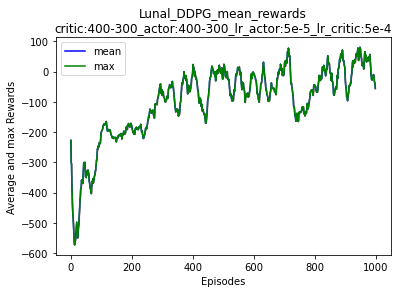

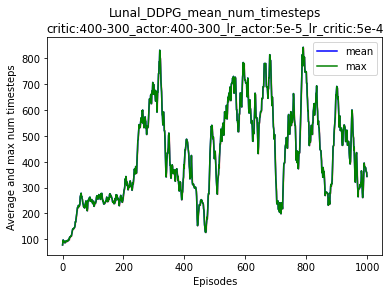

*********Start Running config: critic:600-300_actor:600-300_lr_actor:5e-5_lr_critic:5e-4*************
Episode 0/1000 Total Reward: -264.58 Num Timesteps: 94.00 Avg Reward: -264.58 Avg Timesteps: 94.00
Episode 1/1000 Total Reward: -323.36 Num Timesteps: 89.00 Avg Reward: -293.97 Avg Timesteps: 91.50
Episode 2/1000 Total Reward: -178.38 Num Timesteps: 82.00 Avg Reward: -255.44 Avg Timesteps: 88.33
Episode 3/1000 Total Reward: -158.16 Num Timesteps: 80.00 Avg Reward: -231.12 Avg Timesteps: 86.25
Episode 4/1000 Total Reward: -125.36 Num Timesteps: 61.00 Avg Reward: -209.97 Avg Timesteps: 81.20
Episode 5/1000 Total Reward: -161.56 Num Timesteps: 84.00 Avg Reward: -201.90 Avg Timesteps: 81.67
Episode 6/1000 Total Reward: -141.75 Num Timesteps: 63.00 Avg Reward: -193.31 Avg Timesteps: 79.00
Episode 7/1000 Total Reward: -115.11 Num Timesteps: 51.00 Avg Reward: -183.53 Avg Timesteps: 75.50
Episode 8/1000 Total Reward: -125.89 Num Timesteps: 61.00 Avg Reward: -177.13 Avg Timesteps: 73.89
Episode

Episode 81/1000 Total Reward: -155.76 Num Timesteps: 101.00 Avg Reward: -154.21 Avg Timesteps: 123.40
Episode 82/1000 Total Reward: -181.61 Num Timesteps: 117.00 Avg Reward: -154.92 Avg Timesteps: 124.15
Episode 83/1000 Total Reward: -165.02 Num Timesteps: 156.00 Avg Reward: -154.80 Avg Timesteps: 127.00
Episode 84/1000 Total Reward: -139.86 Num Timesteps: 100.00 Avg Reward: -154.01 Avg Timesteps: 126.35
Episode 85/1000 Total Reward: -1862.26 Num Timesteps: 425.00 Avg Reward: -241.83 Avg Timesteps: 143.00
Episode 86/1000 Total Reward: -174.02 Num Timesteps: 104.00 Avg Reward: -243.78 Avg Timesteps: 140.75
Episode 87/1000 Total Reward: -407.50 Num Timesteps: 122.00 Avg Reward: -257.19 Avg Timesteps: 139.05
Episode 88/1000 Total Reward: -175.22 Num Timesteps: 85.00 Avg Reward: -259.37 Avg Timesteps: 134.95
Episode 89/1000 Total Reward: -224.61 Num Timesteps: 116.00 Avg Reward: -262.33 Avg Timesteps: 134.15
Episode 90/1000 Total Reward: 4.76 Num Timesteps: 71.00 Avg Reward: -254.12 Avg Ti

Episode 161/1000 Total Reward: -238.26 Num Timesteps: 110.00 Avg Reward: -270.97 Avg Timesteps: 158.00
Episode 162/1000 Total Reward: -162.97 Num Timesteps: 272.00 Avg Reward: -266.23 Avg Timesteps: 153.20
Episode 163/1000 Total Reward: -172.36 Num Timesteps: 338.00 Avg Reward: -263.20 Avg Timesteps: 149.55
Episode 164/1000 Total Reward: -218.46 Num Timesteps: 270.00 Avg Reward: -267.00 Avg Timesteps: 159.25
Episode 165/1000 Total Reward: -178.52 Num Timesteps: 196.00 Avg Reward: -258.52 Avg Timesteps: 140.40
Episode 166/1000 Total Reward: -184.07 Num Timesteps: 313.00 Avg Reward: -245.18 Avg Timesteps: 150.10
Episode 167/1000 Total Reward: -186.49 Num Timesteps: 341.00 Avg Reward: -241.38 Avg Timesteps: 162.65
Episode 168/1000 Total Reward: -188.88 Num Timesteps: 412.00 Avg Reward: -242.35 Avg Timesteps: 177.25
Episode 169/1000 Total Reward: -202.49 Num Timesteps: 239.00 Avg Reward: -233.63 Avg Timesteps: 183.25
Episode 170/1000 Total Reward: -212.46 Num Timesteps: 256.00 Avg Reward: 

Episode 241/1000 Total Reward: -98.49 Num Timesteps: 209.00 Avg Reward: -100.22 Avg Timesteps: 282.15
Episode 242/1000 Total Reward: -131.99 Num Timesteps: 387.00 Avg Reward: -101.52 Avg Timesteps: 288.25
Episode 243/1000 Total Reward: -109.85 Num Timesteps: 240.00 Avg Reward: -101.09 Avg Timesteps: 282.80
Episode 244/1000 Total Reward: -108.63 Num Timesteps: 420.00 Avg Reward: -97.50 Avg Timesteps: 274.80
Episode 245/1000 Total Reward: -160.38 Num Timesteps: 397.00 Avg Reward: -98.02 Avg Timesteps: 278.85
Episode 246/1000 Total Reward: -159.21 Num Timesteps: 505.00 Avg Reward: -97.44 Avg Timesteps: 284.40
Episode 247/1000 Total Reward: -165.75 Num Timesteps: 597.00 Avg Reward: -100.44 Avg Timesteps: 301.20
Episode 248/1000 Total Reward: -116.37 Num Timesteps: 313.00 Avg Reward: -99.00 Avg Timesteps: 293.30
Episode 249/1000 Total Reward: -333.40 Num Timesteps: 450.00 Avg Reward: -108.22 Avg Timesteps: 300.15
Episode 250/1000 Total Reward: -116.56 Num Timesteps: 61.00 Avg Reward: -108.6

Episode 322/1000 Total Reward: -161.66 Num Timesteps: 867.00 Avg Reward: -98.93 Avg Timesteps: 666.00
Episode 323/1000 Total Reward: -84.53 Num Timesteps: 1000.00 Avg Reward: -103.80 Avg Timesteps: 666.00
Episode 324/1000 Total Reward: -145.93 Num Timesteps: 620.00 Avg Reward: -105.56 Avg Timesteps: 662.90
Episode 325/1000 Total Reward: -115.04 Num Timesteps: 87.00 Avg Reward: -109.20 Avg Timesteps: 650.25
Episode 326/1000 Total Reward: -133.46 Num Timesteps: 54.00 Avg Reward: -105.77 Avg Timesteps: 603.10
Episode 327/1000 Total Reward: -92.23 Num Timesteps: 114.00 Avg Reward: -114.97 Avg Timesteps: 569.90
Episode 328/1000 Total Reward: -15.86 Num Timesteps: 1000.00 Avg Reward: -101.17 Avg Timesteps: 580.35
Episode 329/1000 Total Reward: -131.95 Num Timesteps: 257.00 Avg Reward: -102.60 Avg Timesteps: 579.50
Episode 330/1000 Total Reward: -313.04 Num Timesteps: 120.00 Avg Reward: -126.18 Avg Timesteps: 537.60
Episode 331/1000 Total Reward: -52.70 Num Timesteps: 1000.00 Avg Reward: -113

Episode 403/1000 Total Reward: -188.48 Num Timesteps: 413.00 Avg Reward: -32.96 Avg Timesteps: 561.50
Episode 404/1000 Total Reward: -179.13 Num Timesteps: 415.00 Avg Reward: -33.54 Avg Timesteps: 556.15
Episode 405/1000 Total Reward: -120.48 Num Timesteps: 848.00 Avg Reward: -46.31 Avg Timesteps: 566.65
Episode 406/1000 Total Reward: 72.56 Num Timesteps: 1000.00 Avg Reward: -50.84 Avg Timesteps: 586.70
Episode 407/1000 Total Reward: -23.58 Num Timesteps: 151.00 Avg Reward: -59.70 Avg Timesteps: 554.60
Episode 408/1000 Total Reward: 7.81 Num Timesteps: 274.00 Avg Reward: -65.11 Avg Timesteps: 532.75
Episode 409/1000 Total Reward: -153.26 Num Timesteps: 105.00 Avg Reward: -65.04 Avg Timesteps: 509.05
Episode 410/1000 Total Reward: 208.34 Num Timesteps: 370.00 Avg Reward: -55.39 Avg Timesteps: 510.60
Episode 411/1000 Total Reward: 153.07 Num Timesteps: 535.00 Avg Reward: -58.61 Avg Timesteps: 520.65
Episode 412/1000 Total Reward: 215.59 Num Timesteps: 473.00 Avg Reward: -50.03 Avg Timest

Episode 485/1000 Total Reward: -401.86 Num Timesteps: 171.00 Avg Reward: -121.78 Avg Timesteps: 515.50
Episode 486/1000 Total Reward: 156.80 Num Timesteps: 460.00 Avg Reward: -100.60 Avg Timesteps: 530.05
Episode 487/1000 Total Reward: -23.45 Num Timesteps: 1000.00 Avg Reward: -94.77 Avg Timesteps: 574.10
Episode 488/1000 Total Reward: -165.31 Num Timesteps: 945.00 Avg Reward: -104.85 Avg Timesteps: 571.35
Episode 489/1000 Total Reward: -72.02 Num Timesteps: 188.00 Avg Reward: -95.59 Avg Timesteps: 573.10
Episode 490/1000 Total Reward: -187.29 Num Timesteps: 109.00 Avg Reward: -101.43 Avg Timesteps: 574.10
Episode 491/1000 Total Reward: 70.99 Num Timesteps: 1000.00 Avg Reward: -87.09 Avg Timesteps: 606.20
Episode 492/1000 Total Reward: -92.71 Num Timesteps: 1000.00 Avg Reward: -86.59 Avg Timesteps: 643.15
Episode 493/1000 Total Reward: -0.03 Num Timesteps: 1000.00 Avg Reward: -75.75 Avg Timesteps: 685.90
Episode 494/1000 Total Reward: 221.07 Num Timesteps: 266.00 Avg Reward: -53.45 Avg

Episode 566/1000 Total Reward: -48.64 Num Timesteps: 1000.00 Avg Reward: -23.36 Avg Timesteps: 774.50
Episode 567/1000 Total Reward: -97.78 Num Timesteps: 1000.00 Avg Reward: -22.32 Avg Timesteps: 774.50
Episode 568/1000 Total Reward: -30.87 Num Timesteps: 1000.00 Avg Reward: -32.16 Avg Timesteps: 795.00
Episode 569/1000 Total Reward: -86.26 Num Timesteps: 1000.00 Avg Reward: -29.28 Avg Timesteps: 795.00
Episode 570/1000 Total Reward: -88.66 Num Timesteps: 1000.00 Avg Reward: -25.77 Avg Timesteps: 795.00
Episode 571/1000 Total Reward: 165.95 Num Timesteps: 521.00 Avg Reward: -25.01 Avg Timesteps: 782.95
Episode 572/1000 Total Reward: -71.08 Num Timesteps: 384.00 Avg Reward: -37.27 Avg Timesteps: 758.80
Episode 573/1000 Total Reward: -179.73 Num Timesteps: 899.00 Avg Reward: -45.71 Avg Timesteps: 753.75
Episode 574/1000 Total Reward: -74.94 Num Timesteps: 222.00 Avg Reward: -44.14 Avg Timesteps: 714.85
Episode 575/1000 Total Reward: -270.88 Num Timesteps: 127.00 Avg Reward: -52.17 Avg T

Episode 646/1000 Total Reward: -116.98 Num Timesteps: 1000.00 Avg Reward: -120.33 Avg Timesteps: 692.90
Episode 647/1000 Total Reward: -129.44 Num Timesteps: 1000.00 Avg Reward: -121.52 Avg Timesteps: 692.90
Episode 648/1000 Total Reward: -141.63 Num Timesteps: 270.00 Avg Reward: -123.09 Avg Timesteps: 656.40
Episode 649/1000 Total Reward: -213.54 Num Timesteps: 109.00 Avg Reward: -128.28 Avg Timesteps: 655.25
Episode 650/1000 Total Reward: -89.81 Num Timesteps: 140.00 Avg Reward: -127.76 Avg Timesteps: 653.85
Episode 651/1000 Total Reward: -194.03 Num Timesteps: 107.00 Avg Reward: -125.18 Avg Timesteps: 643.10
Episode 652/1000 Total Reward: -159.67 Num Timesteps: 160.00 Avg Reward: -128.12 Avg Timesteps: 601.10
Episode 653/1000 Total Reward: -107.30 Num Timesteps: 154.00 Avg Reward: -128.88 Avg Timesteps: 558.80
Episode 654/1000 Total Reward: -126.44 Num Timesteps: 1000.00 Avg Reward: -131.00 Avg Timesteps: 558.80
Episode 655/1000 Total Reward: -106.36 Num Timesteps: 1000.00 Avg Rewar

Episode 726/1000 Total Reward: -66.53 Num Timesteps: 1000.00 Avg Reward: -153.17 Avg Timesteps: 701.70
Episode 727/1000 Total Reward: -219.96 Num Timesteps: 438.00 Avg Reward: -153.66 Avg Timesteps: 695.85
Episode 728/1000 Total Reward: -75.51 Num Timesteps: 1000.00 Avg Reward: -148.67 Avg Timesteps: 695.85
Episode 729/1000 Total Reward: -251.84 Num Timesteps: 141.00 Avg Reward: -151.09 Avg Timesteps: 680.00
Episode 730/1000 Total Reward: -224.22 Num Timesteps: 731.00 Avg Reward: -159.02 Avg Timesteps: 666.55
Episode 731/1000 Total Reward: -239.69 Num Timesteps: 207.00 Avg Reward: -166.91 Avg Timesteps: 626.90
Episode 732/1000 Total Reward: -229.50 Num Timesteps: 139.00 Avg Reward: -167.61 Avg Timesteps: 616.05
Episode 733/1000 Total Reward: -308.48 Num Timesteps: 817.00 Avg Reward: -176.30 Avg Timesteps: 646.65
Episode 734/1000 Total Reward: -256.75 Num Timesteps: 148.00 Avg Reward: -172.59 Avg Timesteps: 646.80
Episode 735/1000 Total Reward: -548.92 Num Timesteps: 165.00 Avg Reward: 

Episode 806/1000 Total Reward: -244.53 Num Timesteps: 111.00 Avg Reward: -112.43 Avg Timesteps: 699.60
Episode 807/1000 Total Reward: -209.60 Num Timesteps: 122.00 Avg Reward: -116.28 Avg Timesteps: 702.75
Episode 808/1000 Total Reward: -175.54 Num Timesteps: 302.00 Avg Reward: -122.51 Avg Timesteps: 712.75
Episode 809/1000 Total Reward: -106.27 Num Timesteps: 1000.00 Avg Reward: -129.59 Avg Timesteps: 757.40
Episode 810/1000 Total Reward: -153.09 Num Timesteps: 776.00 Avg Reward: -133.59 Avg Timesteps: 746.20
Episode 811/1000 Total Reward: -87.69 Num Timesteps: 265.00 Avg Reward: -133.29 Avg Timesteps: 709.45
Episode 812/1000 Total Reward: 230.42 Num Timesteps: 257.00 Avg Reward: -122.02 Avg Timesteps: 672.30
Episode 813/1000 Total Reward: -125.28 Num Timesteps: 142.00 Avg Reward: -125.52 Avg Timesteps: 629.40
Episode 814/1000 Total Reward: -53.94 Num Timesteps: 1000.00 Avg Reward: -118.39 Avg Timesteps: 649.45
Episode 815/1000 Total Reward: -51.11 Num Timesteps: 1000.00 Avg Reward: -

Episode 887/1000 Total Reward: -69.53 Num Timesteps: 1000.00 Avg Reward: -131.93 Avg Timesteps: 690.00
Episode 888/1000 Total Reward: -19.95 Num Timesteps: 1000.00 Avg Reward: -129.99 Avg Timesteps: 690.00
Episode 889/1000 Total Reward: -103.25 Num Timesteps: 1000.00 Avg Reward: -131.23 Avg Timesteps: 690.00
Episode 890/1000 Total Reward: -109.35 Num Timesteps: 1000.00 Avg Reward: -134.59 Avg Timesteps: 690.00
Episode 891/1000 Total Reward: -56.31 Num Timesteps: 1000.00 Avg Reward: -132.95 Avg Timesteps: 690.00
Episode 892/1000 Total Reward: -84.88 Num Timesteps: 1000.00 Avg Reward: -140.11 Avg Timesteps: 690.00
Episode 893/1000 Total Reward: -123.60 Num Timesteps: 83.00 Avg Reward: -133.62 Avg Timesteps: 651.05
Episode 894/1000 Total Reward: -78.41 Num Timesteps: 107.00 Avg Reward: -125.59 Avg Timesteps: 625.60
Episode 895/1000 Total Reward: -160.10 Num Timesteps: 60.00 Avg Reward: -128.86 Avg Timesteps: 578.60
Episode 896/1000 Total Reward: -130.41 Num Timesteps: 64.00 Avg Reward: -1

Episode 967/1000 Total Reward: -69.23 Num Timesteps: 1000.00 Avg Reward: -73.17 Avg Timesteps: 779.45
Episode 968/1000 Total Reward: -231.81 Num Timesteps: 818.00 Avg Reward: -80.72 Avg Timesteps: 770.35
Episode 969/1000 Total Reward: -121.31 Num Timesteps: 114.00 Avg Reward: -82.43 Avg Timesteps: 726.05
Episode 970/1000 Total Reward: -31.52 Num Timesteps: 1000.00 Avg Reward: -81.02 Avg Timesteps: 726.05
Episode 971/1000 Total Reward: 243.04 Num Timesteps: 207.00 Avg Reward: -49.86 Avg Timesteps: 697.75
Episode 972/1000 Total Reward: -97.17 Num Timesteps: 1000.00 Avg Reward: -41.57 Avg Timesteps: 739.20
Episode 973/1000 Total Reward: 246.35 Num Timesteps: 299.00 Avg Reward: -24.46 Avg Timesteps: 748.15
Episode 974/1000 Total Reward: -222.24 Num Timesteps: 800.00 Avg Reward: -26.05 Avg Timesteps: 783.15
Episode 975/1000 Total Reward: -190.45 Num Timesteps: 153.00 Avg Reward: -29.54 Avg Timesteps: 740.80
Episode 976/1000 Total Reward: 191.38 Num Timesteps: 599.00 Avg Reward: -20.56 Avg T

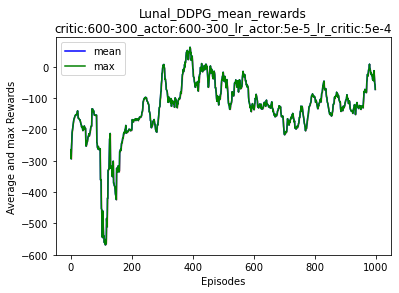

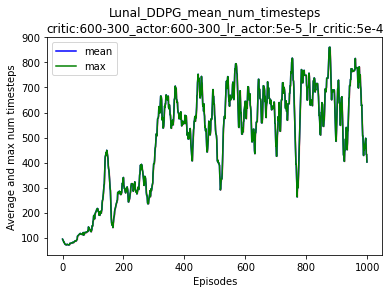

*********Start Running config: critic:400-300_actor:400-300_lr_actor:3e-5_lr_critic:3e-4*************
Episode 0/1000 Total Reward: -266.56 Num Timesteps: 197.00 Avg Reward: -266.56 Avg Timesteps: 197.00
Episode 1/1000 Total Reward: -244.37 Num Timesteps: 62.00 Avg Reward: -255.47 Avg Timesteps: 129.50
Episode 2/1000 Total Reward: -165.15 Num Timesteps: 67.00 Avg Reward: -225.36 Avg Timesteps: 108.67
Episode 3/1000 Total Reward: -154.13 Num Timesteps: 71.00 Avg Reward: -207.55 Avg Timesteps: 99.25
Episode 4/1000 Total Reward: -159.80 Num Timesteps: 63.00 Avg Reward: -198.00 Avg Timesteps: 92.00
Episode 5/1000 Total Reward: -122.24 Num Timesteps: 74.00 Avg Reward: -185.38 Avg Timesteps: 89.00
Episode 6/1000 Total Reward: -234.91 Num Timesteps: 136.00 Avg Reward: -192.45 Avg Timesteps: 95.71
Episode 7/1000 Total Reward: -121.83 Num Timesteps: 78.00 Avg Reward: -183.62 Avg Timesteps: 93.50
Episode 8/1000 Total Reward: -104.69 Num Timesteps: 54.00 Avg Reward: -174.85 Avg Timesteps: 89.11
Ep

Episode 81/1000 Total Reward: -264.11 Num Timesteps: 109.00 Avg Reward: -305.38 Avg Timesteps: 149.95
Episode 82/1000 Total Reward: -619.92 Num Timesteps: 177.00 Avg Reward: -328.37 Avg Timesteps: 153.65
Episode 83/1000 Total Reward: -201.40 Num Timesteps: 101.00 Avg Reward: -325.27 Avg Timesteps: 154.80
Episode 84/1000 Total Reward: -210.17 Num Timesteps: 149.00 Avg Reward: -309.32 Avg Timesteps: 150.40
Episode 85/1000 Total Reward: -733.35 Num Timesteps: 254.00 Avg Reward: -314.17 Avg Timesteps: 153.95
Episode 86/1000 Total Reward: -315.14 Num Timesteps: 123.00 Avg Reward: -319.75 Avg Timesteps: 153.75
Episode 87/1000 Total Reward: -180.31 Num Timesteps: 133.00 Avg Reward: -313.59 Avg Timesteps: 155.45
Episode 88/1000 Total Reward: -313.37 Num Timesteps: 120.00 Avg Reward: -311.24 Avg Timesteps: 157.55
Episode 89/1000 Total Reward: -1510.88 Num Timesteps: 440.00 Avg Reward: -369.48 Avg Timesteps: 167.55
Episode 90/1000 Total Reward: -111.09 Num Timesteps: 125.00 Avg Reward: -358.13 A

Episode 161/1000 Total Reward: -142.29 Num Timesteps: 346.00 Avg Reward: -190.36 Avg Timesteps: 244.35
Episode 162/1000 Total Reward: -186.66 Num Timesteps: 243.00 Avg Reward: -192.89 Avg Timesteps: 246.20
Episode 163/1000 Total Reward: -102.17 Num Timesteps: 214.00 Avg Reward: -187.98 Avg Timesteps: 246.40
Episode 164/1000 Total Reward: -144.27 Num Timesteps: 356.00 Avg Reward: -188.02 Avg Timesteps: 257.35
Episode 165/1000 Total Reward: -198.64 Num Timesteps: 304.00 Avg Reward: -185.28 Avg Timesteps: 254.90
Episode 166/1000 Total Reward: -125.39 Num Timesteps: 186.00 Avg Reward: -172.44 Avg Timesteps: 242.25
Episode 167/1000 Total Reward: -131.26 Num Timesteps: 229.00 Avg Reward: -170.37 Avg Timesteps: 248.55
Episode 168/1000 Total Reward: -426.60 Num Timesteps: 142.00 Avg Reward: -182.57 Avg Timesteps: 245.15
Episode 169/1000 Total Reward: -296.42 Num Timesteps: 102.00 Avg Reward: -183.80 Avg Timesteps: 233.00
Episode 170/1000 Total Reward: -126.07 Num Timesteps: 465.00 Avg Reward: 

Episode 241/1000 Total Reward: -154.40 Num Timesteps: 439.00 Avg Reward: -136.86 Avg Timesteps: 196.85
Episode 242/1000 Total Reward: -231.61 Num Timesteps: 304.00 Avg Reward: -138.89 Avg Timesteps: 205.80
Episode 243/1000 Total Reward: -169.95 Num Timesteps: 489.00 Avg Reward: -140.00 Avg Timesteps: 226.40
Episode 244/1000 Total Reward: -158.64 Num Timesteps: 478.00 Avg Reward: -147.36 Avg Timesteps: 244.80
Episode 245/1000 Total Reward: -167.20 Num Timesteps: 281.00 Avg Reward: -147.35 Avg Timesteps: 254.75
Episode 246/1000 Total Reward: -100.25 Num Timesteps: 195.00 Avg Reward: -143.48 Avg Timesteps: 256.40
Episode 247/1000 Total Reward: -137.30 Num Timesteps: 113.00 Avg Reward: -150.37 Avg Timesteps: 253.60
Episode 248/1000 Total Reward: -237.65 Num Timesteps: 130.00 Avg Reward: -154.69 Avg Timesteps: 255.25
Episode 249/1000 Total Reward: -148.90 Num Timesteps: 398.00 Avg Reward: -152.85 Avg Timesteps: 265.80
Episode 250/1000 Total Reward: -160.53 Num Timesteps: 353.00 Avg Reward: 

Episode 321/1000 Total Reward: -153.37 Num Timesteps: 397.00 Avg Reward: -201.07 Avg Timesteps: 455.20
Episode 322/1000 Total Reward: -121.02 Num Timesteps: 387.00 Avg Reward: -199.27 Avg Timesteps: 463.65
Episode 323/1000 Total Reward: -187.45 Num Timesteps: 659.00 Avg Reward: -200.00 Avg Timesteps: 478.15
Episode 324/1000 Total Reward: -139.19 Num Timesteps: 202.00 Avg Reward: -201.63 Avg Timesteps: 476.35
Episode 325/1000 Total Reward: -140.40 Num Timesteps: 478.00 Avg Reward: -194.78 Avg Timesteps: 465.30
Episode 326/1000 Total Reward: -331.36 Num Timesteps: 770.00 Avg Reward: -198.54 Avg Timesteps: 465.30
Episode 327/1000 Total Reward: -181.96 Num Timesteps: 756.00 Avg Reward: -197.36 Avg Timesteps: 471.60
Episode 328/1000 Total Reward: -54.81 Num Timesteps: 1000.00 Avg Reward: -192.23 Avg Timesteps: 493.35
Episode 329/1000 Total Reward: -102.03 Num Timesteps: 232.00 Avg Reward: -189.58 Avg Timesteps: 492.40
Episode 330/1000 Total Reward: -115.58 Num Timesteps: 1000.00 Avg Reward:

Episode 401/1000 Total Reward: -115.18 Num Timesteps: 561.00 Avg Reward: -146.24 Avg Timesteps: 667.45
Episode 402/1000 Total Reward: -272.55 Num Timesteps: 651.00 Avg Reward: -157.25 Avg Timesteps: 650.00
Episode 403/1000 Total Reward: -241.41 Num Timesteps: 126.00 Avg Reward: -168.79 Avg Timesteps: 606.30
Episode 404/1000 Total Reward: -81.94 Num Timesteps: 1000.00 Avg Reward: -163.22 Avg Timesteps: 624.70
Episode 405/1000 Total Reward: -51.56 Num Timesteps: 1000.00 Avg Reward: -158.31 Avg Timesteps: 659.20
Episode 406/1000 Total Reward: -47.73 Num Timesteps: 1000.00 Avg Reward: -152.88 Avg Timesteps: 659.20
Episode 407/1000 Total Reward: -141.09 Num Timesteps: 386.00 Avg Reward: -157.82 Avg Timesteps: 628.50
Episode 408/1000 Total Reward: -41.61 Num Timesteps: 1000.00 Avg Reward: -149.38 Avg Timesteps: 656.25
Episode 409/1000 Total Reward: -49.79 Num Timesteps: 1000.00 Avg Reward: -145.05 Avg Timesteps: 699.20
Episode 410/1000 Total Reward: -108.30 Num Timesteps: 1000.00 Avg Reward:

Episode 481/1000 Total Reward: 41.18 Num Timesteps: 1000.00 Avg Reward: -150.83 Avg Timesteps: 459.85
Episode 482/1000 Total Reward: -109.69 Num Timesteps: 1000.00 Avg Reward: -147.02 Avg Timesteps: 502.55
Episode 483/1000 Total Reward: -96.17 Num Timesteps: 1000.00 Avg Reward: -144.19 Avg Timesteps: 543.35
Episode 484/1000 Total Reward: -242.57 Num Timesteps: 964.00 Avg Reward: -142.58 Avg Timesteps: 582.85
Episode 485/1000 Total Reward: -397.10 Num Timesteps: 151.00 Avg Reward: -152.11 Avg Timesteps: 583.95
Episode 486/1000 Total Reward: -32.41 Num Timesteps: 1000.00 Avg Reward: -149.53 Avg Timesteps: 583.95
Episode 487/1000 Total Reward: -125.23 Num Timesteps: 1000.00 Avg Reward: -146.43 Avg Timesteps: 629.45
Episode 488/1000 Total Reward: -183.22 Num Timesteps: 796.00 Avg Reward: -144.28 Avg Timesteps: 662.20
Episode 489/1000 Total Reward: -191.69 Num Timesteps: 189.00 Avg Reward: -145.18 Avg Timesteps: 646.60
Episode 490/1000 Total Reward: -247.67 Num Timesteps: 188.00 Avg Reward:

Episode 561/1000 Total Reward: -244.69 Num Timesteps: 364.00 Avg Reward: -23.54 Avg Timesteps: 843.55
Episode 562/1000 Total Reward: -177.83 Num Timesteps: 216.00 Avg Reward: -30.44 Avg Timesteps: 804.35
Episode 563/1000 Total Reward: -238.60 Num Timesteps: 125.00 Avg Reward: -36.79 Avg Timesteps: 760.60
Episode 564/1000 Total Reward: -73.33 Num Timesteps: 203.00 Avg Reward: -40.78 Avg Timesteps: 720.75
Episode 565/1000 Total Reward: -108.01 Num Timesteps: 345.00 Avg Reward: -44.41 Avg Timesteps: 709.10
Episode 566/1000 Total Reward: -199.05 Num Timesteps: 85.00 Avg Reward: -61.74 Avg Timesteps: 673.30
Episode 567/1000 Total Reward: -290.82 Num Timesteps: 167.00 Avg Reward: -70.32 Avg Timesteps: 631.65
Episode 568/1000 Total Reward: -332.42 Num Timesteps: 658.00 Avg Reward: -82.93 Avg Timesteps: 614.55
Episode 569/1000 Total Reward: -295.57 Num Timesteps: 892.00 Avg Reward: -107.82 Avg Timesteps: 626.95
Episode 570/1000 Total Reward: -22.03 Num Timesteps: 1000.00 Avg Reward: -115.46 Av

Episode 641/1000 Total Reward: -108.92 Num Timesteps: 72.00 Avg Reward: -151.38 Avg Timesteps: 595.15
Episode 642/1000 Total Reward: -66.32 Num Timesteps: 107.00 Avg Reward: -148.09 Avg Timesteps: 550.50
Episode 643/1000 Total Reward: -14.58 Num Timesteps: 92.00 Avg Reward: -138.97 Avg Timesteps: 549.85
Episode 644/1000 Total Reward: 249.31 Num Timesteps: 228.00 Avg Reward: -112.33 Avg Timesteps: 540.10
Episode 645/1000 Total Reward: -178.01 Num Timesteps: 1000.00 Avg Reward: -118.22 Avg Timesteps: 540.10
Episode 646/1000 Total Reward: -122.26 Num Timesteps: 1000.00 Avg Reward: -117.34 Avg Timesteps: 540.10
Episode 647/1000 Total Reward: -90.02 Num Timesteps: 1000.00 Avg Reward: -116.27 Avg Timesteps: 540.10
Episode 648/1000 Total Reward: -193.73 Num Timesteps: 1000.00 Avg Reward: -124.12 Avg Timesteps: 540.10
Episode 649/1000 Total Reward: -133.37 Num Timesteps: 1000.00 Avg Reward: -124.38 Avg Timesteps: 540.10
Episode 650/1000 Total Reward: -145.10 Num Timesteps: 1000.00 Avg Reward: 

Episode 721/1000 Total Reward: -88.97 Num Timesteps: 1000.00 Avg Reward: -120.59 Avg Timesteps: 555.15
Episode 722/1000 Total Reward: 104.25 Num Timesteps: 844.00 Avg Reward: -109.20 Avg Timesteps: 577.75
Episode 723/1000 Total Reward: 181.76 Num Timesteps: 256.00 Avg Reward: -93.04 Avg Timesteps: 540.55
Episode 724/1000 Total Reward: -57.40 Num Timesteps: 1000.00 Avg Reward: -91.60 Avg Timesteps: 540.55
Episode 725/1000 Total Reward: -266.77 Num Timesteps: 864.00 Avg Reward: -98.79 Avg Timesteps: 533.75
Episode 726/1000 Total Reward: -294.56 Num Timesteps: 604.00 Avg Reward: -106.48 Avg Timesteps: 513.95
Episode 727/1000 Total Reward: -75.78 Num Timesteps: 1000.00 Avg Reward: -105.80 Avg Timesteps: 547.95
Episode 728/1000 Total Reward: -122.09 Num Timesteps: 1000.00 Avg Reward: -94.80 Avg Timesteps: 590.85
Episode 729/1000 Total Reward: -115.58 Num Timesteps: 1000.00 Avg Reward: -89.80 Avg Timesteps: 626.45
Episode 730/1000 Total Reward: 107.42 Num Timesteps: 824.00 Avg Reward: -79.49

Episode 802/1000 Total Reward: 127.28 Num Timesteps: 923.00 Avg Reward: 2.32 Avg Timesteps: 594.45
Episode 803/1000 Total Reward: -86.84 Num Timesteps: 221.00 Avg Reward: 2.75 Avg Timesteps: 576.20
Episode 804/1000 Total Reward: -269.31 Num Timesteps: 80.00 Avg Reward: -20.86 Avg Timesteps: 544.35
Episode 805/1000 Total Reward: -351.33 Num Timesteps: 128.00 Avg Reward: -49.84 Avg Timesteps: 516.80
Episode 806/1000 Total Reward: -37.43 Num Timesteps: 1000.00 Avg Reward: -48.47 Avg Timesteps: 516.80
Episode 807/1000 Total Reward: -13.84 Num Timesteps: 1000.00 Avg Reward: -44.35 Avg Timesteps: 547.55
Episode 808/1000 Total Reward: -93.59 Num Timesteps: 414.00 Avg Reward: -58.80 Avg Timesteps: 531.45
Episode 809/1000 Total Reward: 253.84 Num Timesteps: 364.00 Avg Reward: -56.23 Avg Timesteps: 525.85
Episode 810/1000 Total Reward: -50.33 Num Timesteps: 1000.00 Avg Reward: -57.10 Avg Timesteps: 525.85
Episode 811/1000 Total Reward: 165.78 Num Timesteps: 700.00 Avg Reward: -38.26 Avg Timestep

Episode 884/1000 Total Reward: -152.62 Num Timesteps: 274.00 Avg Reward: -97.31 Avg Timesteps: 600.35
Episode 885/1000 Total Reward: -262.17 Num Timesteps: 136.00 Avg Reward: -100.79 Avg Timesteps: 592.25
Episode 886/1000 Total Reward: -250.36 Num Timesteps: 107.00 Avg Reward: -110.97 Avg Timesteps: 547.60
Episode 887/1000 Total Reward: -280.58 Num Timesteps: 121.00 Avg Reward: -119.71 Avg Timesteps: 503.65
Episode 888/1000 Total Reward: -224.98 Num Timesteps: 175.00 Avg Reward: -126.66 Avg Timesteps: 462.40
Episode 889/1000 Total Reward: -257.70 Num Timesteps: 110.00 Avg Reward: -148.87 Avg Timesteps: 428.10
Episode 890/1000 Total Reward: -277.64 Num Timesteps: 116.00 Avg Reward: -158.42 Avg Timesteps: 383.90
Episode 891/1000 Total Reward: -30.43 Num Timesteps: 1000.00 Avg Reward: -145.66 Avg Timesteps: 388.75
Episode 892/1000 Total Reward: -52.21 Num Timesteps: 1000.00 Avg Reward: -153.43 Avg Timesteps: 400.10
Episode 893/1000 Total Reward: -98.33 Num Timesteps: 439.00 Avg Reward: -1

Episode 965/1000 Total Reward: -166.42 Num Timesteps: 273.00 Avg Reward: -63.35 Avg Timesteps: 475.95
Episode 966/1000 Total Reward: -76.36 Num Timesteps: 96.00 Avg Reward: -65.75 Avg Timesteps: 430.75
Episode 967/1000 Total Reward: -19.42 Num Timesteps: 237.00 Avg Reward: -64.89 Avg Timesteps: 423.85
Episode 968/1000 Total Reward: -186.03 Num Timesteps: 114.00 Avg Reward: -64.53 Avg Timesteps: 395.00
Episode 969/1000 Total Reward: -188.06 Num Timesteps: 107.00 Avg Reward: -70.86 Avg Timesteps: 350.35
Episode 970/1000 Total Reward: -205.40 Num Timesteps: 123.00 Avg Reward: -88.83 Avg Timesteps: 321.20
Episode 971/1000 Total Reward: -221.90 Num Timesteps: 130.00 Avg Reward: -92.79 Avg Timesteps: 277.70
Episode 972/1000 Total Reward: 206.50 Num Timesteps: 566.00 Avg Reward: -92.19 Avg Timesteps: 273.40
Episode 973/1000 Total Reward: 148.82 Num Timesteps: 454.00 Avg Reward: -89.73 Avg Timesteps: 254.15
Episode 974/1000 Total Reward: -196.26 Num Timesteps: 222.00 Avg Reward: -88.82 Avg Tim

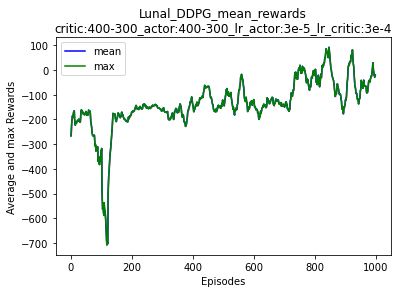

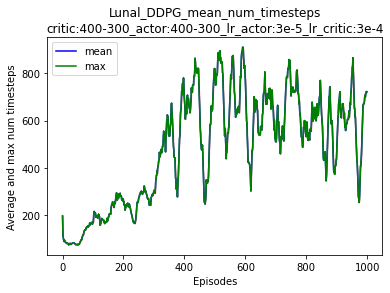

*********Start Running config: critic:600-300_actor:600-300_lr_actor:3e-5_lr_critic:3e-4*************
Episode 0/1000 Total Reward: -106.08 Num Timesteps: 75.00 Avg Reward: -106.08 Avg Timesteps: 75.00
Episode 1/1000 Total Reward: -281.50 Num Timesteps: 117.00 Avg Reward: -193.79 Avg Timesteps: 96.00
Episode 2/1000 Total Reward: -277.49 Num Timesteps: 71.00 Avg Reward: -221.69 Avg Timesteps: 87.67
Episode 3/1000 Total Reward: -150.32 Num Timesteps: 85.00 Avg Reward: -203.85 Avg Timesteps: 87.00
Episode 4/1000 Total Reward: -100.89 Num Timesteps: 57.00 Avg Reward: -183.26 Avg Timesteps: 81.00
Episode 5/1000 Total Reward: -260.66 Num Timesteps: 72.00 Avg Reward: -196.16 Avg Timesteps: 79.50
Episode 6/1000 Total Reward: -152.93 Num Timesteps: 54.00 Avg Reward: -189.98 Avg Timesteps: 75.86
Episode 7/1000 Total Reward: -143.56 Num Timesteps: 77.00 Avg Reward: -184.18 Avg Timesteps: 76.00
Episode 8/1000 Total Reward: -112.66 Num Timesteps: 78.00 Avg Reward: -176.23 Avg Timesteps: 76.22
Episod

Episode 81/1000 Total Reward: -347.06 Num Timesteps: 81.00 Avg Reward: -394.16 Avg Timesteps: 94.50
Episode 82/1000 Total Reward: -372.86 Num Timesteps: 82.00 Avg Reward: -389.97 Avg Timesteps: 94.70
Episode 83/1000 Total Reward: -551.56 Num Timesteps: 86.00 Avg Reward: -394.04 Avg Timesteps: 95.05
Episode 84/1000 Total Reward: -278.25 Num Timesteps: 78.00 Avg Reward: -391.96 Avg Timesteps: 93.05
Episode 85/1000 Total Reward: -373.61 Num Timesteps: 83.00 Avg Reward: -385.31 Avg Timesteps: 93.25
Episode 86/1000 Total Reward: -315.50 Num Timesteps: 125.00 Avg Reward: -374.53 Avg Timesteps: 95.25
Episode 87/1000 Total Reward: -392.00 Num Timesteps: 106.00 Avg Reward: -372.76 Avg Timesteps: 96.65
Episode 88/1000 Total Reward: -369.47 Num Timesteps: 96.00 Avg Reward: -361.57 Avg Timesteps: 96.90
Episode 89/1000 Total Reward: -392.43 Num Timesteps: 97.00 Avg Reward: -363.66 Avg Timesteps: 97.50
Episode 90/1000 Total Reward: -363.07 Num Timesteps: 96.00 Avg Reward: -379.86 Avg Timesteps: 96.6

Episode 162/1000 Total Reward: -52.83 Num Timesteps: 268.00 Avg Reward: -160.75 Avg Timesteps: 163.70
Episode 163/1000 Total Reward: -30.03 Num Timesteps: 191.00 Avg Reward: -151.11 Avg Timesteps: 166.10
Episode 164/1000 Total Reward: -131.62 Num Timesteps: 243.00 Avg Reward: -143.92 Avg Timesteps: 172.50
Episode 165/1000 Total Reward: -93.54 Num Timesteps: 209.00 Avg Reward: -137.46 Avg Timesteps: 176.00
Episode 166/1000 Total Reward: -99.80 Num Timesteps: 251.00 Avg Reward: -129.68 Avg Timesteps: 181.30
Episode 167/1000 Total Reward: -32.61 Num Timesteps: 244.00 Avg Reward: -125.99 Avg Timesteps: 186.10
Episode 168/1000 Total Reward: -135.12 Num Timesteps: 272.00 Avg Reward: -127.89 Avg Timesteps: 192.20
Episode 169/1000 Total Reward: -152.45 Num Timesteps: 278.00 Avg Reward: -124.23 Avg Timesteps: 196.20
Episode 170/1000 Total Reward: -44.14 Num Timesteps: 231.00 Avg Reward: -117.54 Avg Timesteps: 198.50
Episode 171/1000 Total Reward: -94.97 Num Timesteps: 249.00 Avg Reward: -117.66

Episode 242/1000 Total Reward: -260.02 Num Timesteps: 99.00 Avg Reward: -274.84 Avg Timesteps: 331.60
Episode 243/1000 Total Reward: -241.50 Num Timesteps: 160.00 Avg Reward: -270.81 Avg Timesteps: 324.35
Episode 244/1000 Total Reward: -240.49 Num Timesteps: 279.00 Avg Reward: -260.97 Avg Timesteps: 321.50
Episode 245/1000 Total Reward: -187.42 Num Timesteps: 564.00 Avg Reward: -258.90 Avg Timesteps: 311.60
Episode 246/1000 Total Reward: -229.21 Num Timesteps: 127.00 Avg Reward: -256.33 Avg Timesteps: 305.05
Episode 247/1000 Total Reward: -79.25 Num Timesteps: 291.00 Avg Reward: -241.08 Avg Timesteps: 292.55
Episode 248/1000 Total Reward: -165.77 Num Timesteps: 127.00 Avg Reward: -237.04 Avg Timesteps: 277.40
Episode 249/1000 Total Reward: -127.18 Num Timesteps: 394.00 Avg Reward: -223.68 Avg Timesteps: 260.10
Episode 250/1000 Total Reward: -120.53 Num Timesteps: 291.00 Avg Reward: -211.83 Avg Timesteps: 256.70
Episode 251/1000 Total Reward: -242.17 Num Timesteps: 192.00 Avg Reward: -2

Episode 322/1000 Total Reward: -318.07 Num Timesteps: 109.00 Avg Reward: -247.71 Avg Timesteps: 239.05
Episode 323/1000 Total Reward: -318.99 Num Timesteps: 95.00 Avg Reward: -220.35 Avg Timesteps: 225.95
Episode 324/1000 Total Reward: -286.87 Num Timesteps: 109.00 Avg Reward: -212.32 Avg Timesteps: 226.55
Episode 325/1000 Total Reward: -191.91 Num Timesteps: 106.00 Avg Reward: -209.74 Avg Timesteps: 216.90
Episode 326/1000 Total Reward: -280.56 Num Timesteps: 97.00 Avg Reward: -211.49 Avg Timesteps: 203.00
Episode 327/1000 Total Reward: -112.08 Num Timesteps: 413.00 Avg Reward: -211.35 Avg Timesteps: 217.45
Episode 328/1000 Total Reward: -224.80 Num Timesteps: 233.00 Avg Reward: -209.50 Avg Timesteps: 212.40
Episode 329/1000 Total Reward: -168.67 Num Timesteps: 279.00 Avg Reward: -213.75 Avg Timesteps: 219.40
Episode 330/1000 Total Reward: -375.34 Num Timesteps: 407.00 Avg Reward: -224.45 Avg Timesteps: 221.80
Episode 331/1000 Total Reward: -260.87 Num Timesteps: 389.00 Avg Reward: -2

Episode 402/1000 Total Reward: -333.17 Num Timesteps: 756.00 Avg Reward: -116.10 Avg Timesteps: 553.25
Episode 403/1000 Total Reward: -307.75 Num Timesteps: 311.00 Avg Reward: -124.13 Avg Timesteps: 557.80
Episode 404/1000 Total Reward: -188.33 Num Timesteps: 149.00 Avg Reward: -128.00 Avg Timesteps: 555.15
Episode 405/1000 Total Reward: -294.76 Num Timesteps: 146.00 Avg Reward: -134.05 Avg Timesteps: 547.20
Episode 406/1000 Total Reward: -20.74 Num Timesteps: 218.00 Avg Reward: -129.01 Avg Timesteps: 540.05
Episode 407/1000 Total Reward: -88.91 Num Timesteps: 95.00 Avg Reward: -127.68 Avg Timesteps: 524.90
Episode 408/1000 Total Reward: -195.24 Num Timesteps: 272.00 Avg Reward: -131.07 Avg Timesteps: 515.75
Episode 409/1000 Total Reward: -96.15 Num Timesteps: 1000.00 Avg Reward: -133.59 Avg Timesteps: 515.75
Episode 410/1000 Total Reward: -174.81 Num Timesteps: 526.00 Avg Reward: -136.95 Avg Timesteps: 532.85
Episode 411/1000 Total Reward: -152.76 Num Timesteps: 147.00 Avg Reward: -13

Episode 483/1000 Total Reward: -62.45 Num Timesteps: 84.00 Avg Reward: -64.68 Avg Timesteps: 633.00
Episode 484/1000 Total Reward: -11.58 Num Timesteps: 101.00 Avg Reward: -64.88 Avg Timesteps: 588.05
Episode 485/1000 Total Reward: -78.56 Num Timesteps: 64.00 Avg Reward: -79.33 Avg Timesteps: 562.95
Episode 486/1000 Total Reward: -138.32 Num Timesteps: 75.00 Avg Reward: -75.97 Avg Timesteps: 521.60
Episode 487/1000 Total Reward: -18.34 Num Timesteps: 130.00 Avg Reward: -74.92 Avg Timesteps: 478.10
Episode 488/1000 Total Reward: -27.78 Num Timesteps: 1000.00 Avg Reward: -76.35 Avg Timesteps: 478.10
Episode 489/1000 Total Reward: -6.23 Num Timesteps: 1000.00 Avg Reward: -73.85 Avg Timesteps: 478.10
Episode 490/1000 Total Reward: -20.91 Num Timesteps: 1000.00 Avg Reward: -71.25 Avg Timesteps: 478.10
Episode 491/1000 Total Reward: -94.68 Num Timesteps: 134.00 Avg Reward: -75.61 Avg Timesteps: 434.80
Episode 492/1000 Total Reward: -74.87 Num Timesteps: 424.00 Avg Reward: -78.00 Avg Timestep

Episode 564/1000 Total Reward: 39.26 Num Timesteps: 1000.00 Avg Reward: -76.73 Avg Timesteps: 552.20
Episode 565/1000 Total Reward: -37.76 Num Timesteps: 102.00 Avg Reward: -92.35 Avg Timesteps: 542.40
Episode 566/1000 Total Reward: -4.06 Num Timesteps: 78.00 Avg Reward: -90.88 Avg Timesteps: 496.30
Episode 567/1000 Total Reward: -148.16 Num Timesteps: 72.00 Avg Reward: -108.95 Avg Timesteps: 489.65
Episode 568/1000 Total Reward: -105.79 Num Timesteps: 62.00 Avg Reward: -99.53 Avg Timesteps: 464.65
Episode 569/1000 Total Reward: -114.45 Num Timesteps: 97.00 Avg Reward: -114.47 Avg Timesteps: 437.95
Episode 570/1000 Total Reward: 246.39 Num Timesteps: 549.00 Avg Reward: -98.44 Avg Timesteps: 415.40
Episode 571/1000 Total Reward: -221.58 Num Timesteps: 469.00 Avg Reward: -107.56 Avg Timesteps: 388.85
Episode 572/1000 Total Reward: -56.21 Num Timesteps: 257.00 Avg Reward: -95.06 Avg Timesteps: 356.90
Episode 573/1000 Total Reward: 225.33 Num Timesteps: 265.00 Avg Reward: -76.30 Avg Timest

Episode 646/1000 Total Reward: 172.21 Num Timesteps: 700.00 Avg Reward: -32.07 Avg Timesteps: 362.45
Episode 647/1000 Total Reward: 189.87 Num Timesteps: 694.00 Avg Reward: -11.75 Avg Timesteps: 388.75
Episode 648/1000 Total Reward: -230.02 Num Timesteps: 835.00 Avg Reward: -16.12 Avg Timesteps: 424.00
Episode 649/1000 Total Reward: -211.67 Num Timesteps: 760.00 Avg Reward: -15.58 Avg Timesteps: 455.75
Episode 650/1000 Total Reward: -120.11 Num Timesteps: 577.00 Avg Reward: -18.91 Avg Timesteps: 478.25
Episode 651/1000 Total Reward: 235.60 Num Timesteps: 337.00 Avg Reward: -7.23 Avg Timesteps: 483.10
Episode 652/1000 Total Reward: 255.28 Num Timesteps: 774.00 Avg Reward: 5.97 Avg Timesteps: 516.00
Episode 653/1000 Total Reward: 168.60 Num Timesteps: 727.00 Avg Reward: 8.13 Avg Timesteps: 524.25
Episode 654/1000 Total Reward: -38.91 Num Timesteps: 322.00 Avg Reward: -5.76 Avg Timesteps: 518.60
Episode 655/1000 Total Reward: 211.60 Num Timesteps: 594.00 Avg Reward: 7.78 Avg Timesteps: 53

Episode 727/1000 Total Reward: 7.17 Num Timesteps: 162.00 Avg Reward: -94.08 Avg Timesteps: 398.90
Episode 728/1000 Total Reward: -185.64 Num Timesteps: 826.00 Avg Reward: -113.02 Avg Timesteps: 416.20
Episode 729/1000 Total Reward: -267.39 Num Timesteps: 591.00 Avg Reward: -115.82 Avg Timesteps: 429.25
Episode 730/1000 Total Reward: -178.38 Num Timesteps: 128.00 Avg Reward: -115.53 Avg Timesteps: 431.50
Episode 731/1000 Total Reward: -180.96 Num Timesteps: 105.00 Avg Reward: -111.27 Avg Timesteps: 430.20
Episode 732/1000 Total Reward: -119.87 Num Timesteps: 118.00 Avg Reward: -111.70 Avg Timesteps: 422.45
Episode 733/1000 Total Reward: -244.84 Num Timesteps: 132.00 Avg Reward: -116.63 Avg Timesteps: 379.05
Episode 734/1000 Total Reward: -311.00 Num Timesteps: 125.00 Avg Reward: -125.72 Avg Timesteps: 346.90
Episode 735/1000 Total Reward: -238.62 Num Timesteps: 117.00 Avg Reward: -126.39 Avg Timesteps: 347.10
Episode 736/1000 Total Reward: -125.34 Num Timesteps: 332.00 Avg Reward: -123

Episode 808/1000 Total Reward: -140.15 Num Timesteps: 92.00 Avg Reward: -7.91 Avg Timesteps: 403.45
Episode 809/1000 Total Reward: -147.17 Num Timesteps: 120.00 Avg Reward: -28.67 Avg Timesteps: 389.30
Episode 810/1000 Total Reward: -186.19 Num Timesteps: 165.00 Avg Reward: -36.10 Avg Timesteps: 347.55
Episode 811/1000 Total Reward: -188.54 Num Timesteps: 370.00 Avg Reward: -46.33 Avg Timesteps: 362.30
Episode 812/1000 Total Reward: 260.15 Num Timesteps: 486.00 Avg Reward: -38.30 Avg Timesteps: 337.55
Episode 813/1000 Total Reward: -44.56 Num Timesteps: 1000.00 Avg Reward: -51.95 Avg Timesteps: 357.90
Episode 814/1000 Total Reward: 75.55 Num Timesteps: 1000.00 Avg Reward: -60.79 Avg Timesteps: 391.45
Episode 815/1000 Total Reward: 225.83 Num Timesteps: 351.00 Avg Reward: -55.55 Avg Timesteps: 362.25
Episode 816/1000 Total Reward: 178.49 Num Timesteps: 578.00 Avg Reward: -44.79 Avg Timesteps: 383.95
Episode 817/1000 Total Reward: -63.72 Num Timesteps: 220.00 Avg Reward: -47.48 Avg Times

Episode 890/1000 Total Reward: 125.86 Num Timesteps: 473.00 Avg Reward: 58.09 Avg Timesteps: 400.85
Episode 891/1000 Total Reward: 277.68 Num Timesteps: 365.00 Avg Reward: 61.79 Avg Timesteps: 392.00
Episode 892/1000 Total Reward: 216.56 Num Timesteps: 466.00 Avg Reward: 60.12 Avg Timesteps: 390.95
Episode 893/1000 Total Reward: 248.97 Num Timesteps: 309.00 Avg Reward: 76.98 Avg Timesteps: 402.75
Episode 894/1000 Total Reward: -171.88 Num Timesteps: 151.00 Avg Reward: 75.08 Avg Timesteps: 406.15
Episode 895/1000 Total Reward: 152.79 Num Timesteps: 632.00 Avg Reward: 88.91 Avg Timesteps: 434.35
Episode 896/1000 Total Reward: -12.51 Num Timesteps: 1000.00 Avg Reward: 93.24 Avg Timesteps: 481.15
Episode 897/1000 Total Reward: -70.35 Num Timesteps: 1000.00 Avg Reward: 90.92 Avg Timesteps: 524.95
Episode 898/1000 Total Reward: -69.87 Num Timesteps: 607.00 Avg Reward: 79.06 Avg Timesteps: 531.80
Episode 899/1000 Total Reward: -241.62 Num Timesteps: 538.00 Avg Reward: 54.89 Avg Timesteps: 534

Episode 972/1000 Total Reward: -84.64 Num Timesteps: 121.00 Avg Reward: 83.38 Avg Timesteps: 461.50
Episode 973/1000 Total Reward: -91.61 Num Timesteps: 340.00 Avg Reward: 66.68 Avg Timesteps: 468.30
Episode 974/1000 Total Reward: -265.64 Num Timesteps: 202.00 Avg Reward: 57.79 Avg Timesteps: 428.40
Episode 975/1000 Total Reward: -6.66 Num Timesteps: 297.00 Avg Reward: 49.35 Avg Timesteps: 394.40
Episode 976/1000 Total Reward: 250.58 Num Timesteps: 222.00 Avg Reward: 70.97 Avg Timesteps: 372.65
Episode 977/1000 Total Reward: 238.27 Num Timesteps: 339.00 Avg Reward: 91.22 Avg Timesteps: 372.20
Episode 978/1000 Total Reward: 176.73 Num Timesteps: 911.00 Avg Reward: 86.15 Avg Timesteps: 404.90
Episode 979/1000 Total Reward: 264.22 Num Timesteps: 462.00 Avg Reward: 102.64 Avg Timesteps: 378.00
Episode 980/1000 Total Reward: -162.69 Num Timesteps: 871.00 Avg Reward: 85.14 Avg Timesteps: 404.40
Episode 981/1000 Total Reward: -58.30 Num Timesteps: 233.00 Avg Reward: 89.71 Avg Timesteps: 404.4

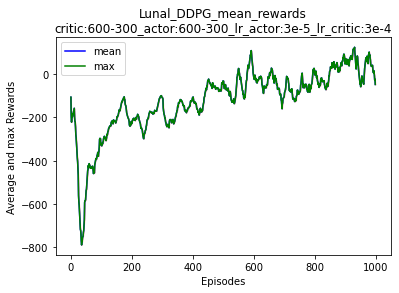

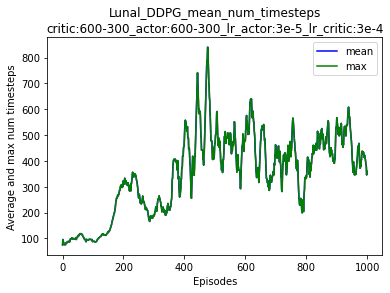

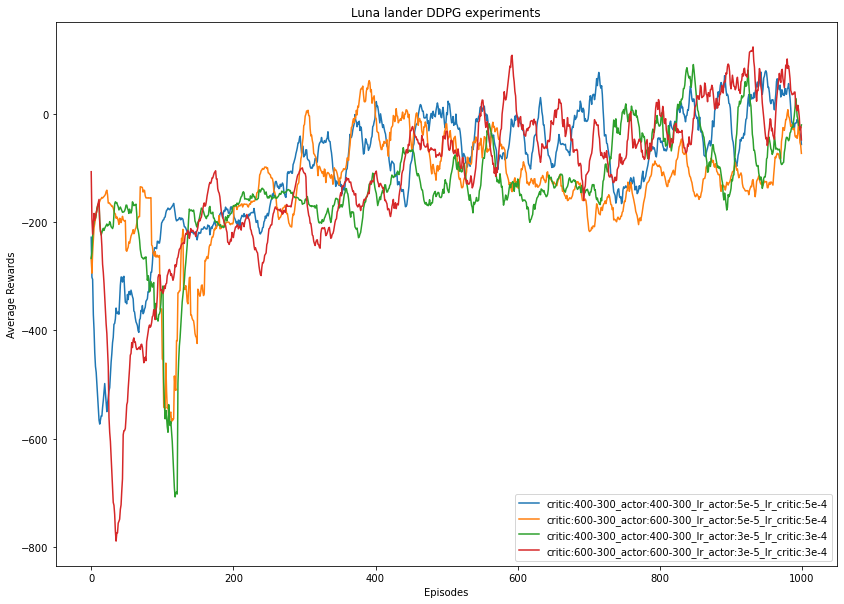

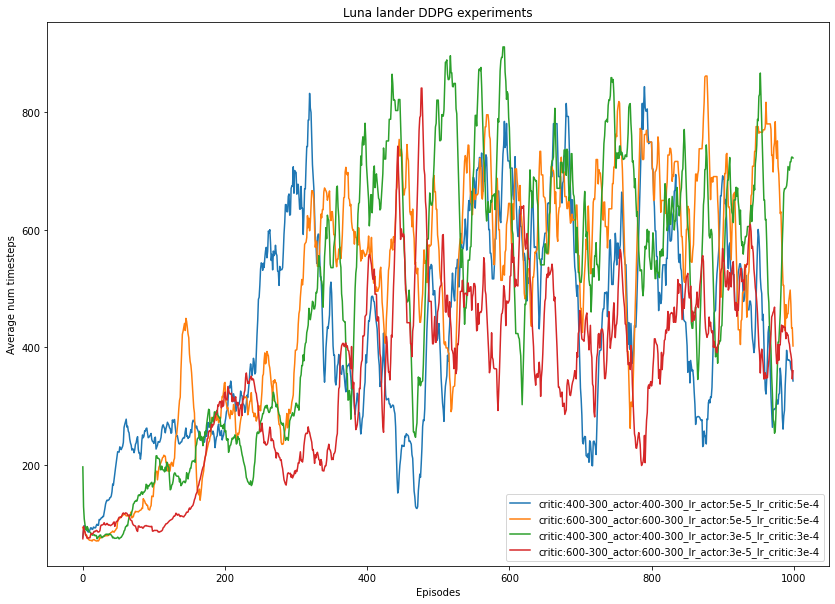

NameError: name 'utils' is not defined

In [7]:
dict_hyperparms_results=luna_lander.experiment_luna_lander(device, RUNS_DIR, SAVED_DIR, NUM_EPISODES, CONFIGS_LUNA_LANDER, NUM_EXPERIMENTS, num_episodes_avg=NUM_EPISODES_AVG, train=True)


#utils.save_to_pickle(dict_hyperparms_results, os.path.join(SAVED_DIR, 'all_results_dict.pkl'))

In [11]:
dict_hyperparms_results['rewards_mean']

{'rewards_mean': [array([-2.27461670e+02, -3.01496383e+02, -3.05508811e+02, -3.70474483e+02,
         -3.99234668e+02, -4.41160957e+02, -4.66530132e+02, -4.77331306e+02,
         -5.00322088e+02, -5.22603174e+02, -5.49050762e+02, -5.65858084e+02,
         -5.73345025e+02, -5.65995456e+02, -5.58189816e+02, -5.58620809e+02,
         -5.42257495e+02, -5.29714654e+02, -5.15081491e+02, -4.98234484e+02,
         -5.16354232e+02, -5.35688257e+02, -5.50281752e+02, -5.34663625e+02,
         -5.24147504e+02, -5.11752616e+02, -5.05852005e+02, -4.83287675e+02,
         -4.58863774e+02, -4.42852465e+02, -4.22729592e+02, -4.12683898e+02,
         -3.88465026e+02, -3.86983614e+02, -3.78467323e+02, -3.58493082e+02,
         -3.67943821e+02, -3.68816787e+02, -3.65437997e+02, -3.69915084e+02,
         -3.43861490e+02, -3.16402118e+02, -3.01146897e+02, -3.01084189e+02,
         -3.10339833e+02, -3.02964630e+02, -2.99729541e+02, -3.24541043e+02,
         -3.47645255e+02, -3.47995443e+02, -3.50616109e+02, 

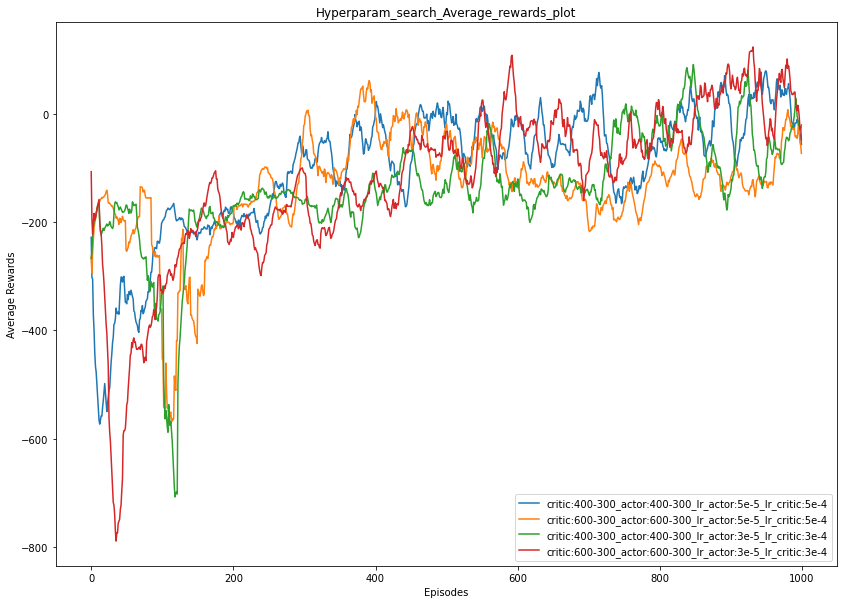

In [12]:
plot_all_experiments(dict_hyperparms_results['rewards_mean'], dict_hyperparms_results['labels'], 'Average Rewards', 'Hyperparam_search_Average_rewards_plot',SAVED_DIR, 'Hyperparam_search_Average_rewards_plot')

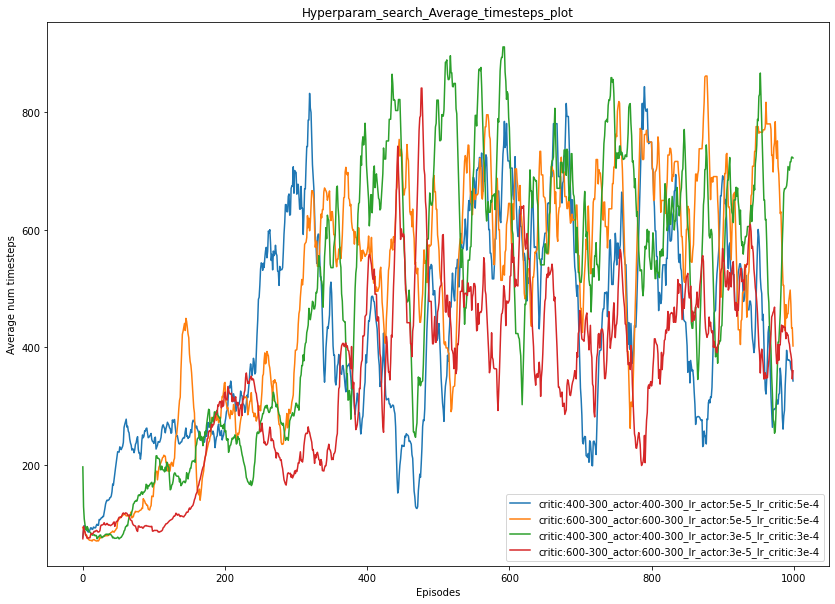

In [13]:
plot_all_experiments(dict_hyperparms_results['timesteps_mean'], dict_hyperparms_results['labels'], 'Average num timesteps', 'Hyperparam_search_Average_timesteps_plot',SAVED_DIR, 'Hyperparam_search_Average_timesteps_plot')



In [9]:

save_to_pickle(dict_hyperparms_results, os.path.join(SAVED_DIR, 'all_results_search_dict.pkl'))

#### We can see that the model with 400-300 units on both critic and actor and 5e-5 critic learning rate and acotor learning rate of 5e-4 achieved best results

## Run the best configuration in multiple experiments

We will run the best configuration fro 1350 epsiodes in 5 different experiments

In [16]:
NUM_EPISODES=1350

#This is the best configuration we have seen

BEST_CONFIG_LUNA_LANDER=[{'run_name':"Best_critic:600-300_actor:600-300_lr_actor:3e-5_lr_critic:3e-4", 'batch_size':64, "critic_linear_sizes":[600,300], "actor_linear_sizes":[600,300],  "config_optim_actor":{'lr':0.00003},\
                        "config_optim_critic":{"lr":0.0003}, "memory_capacity":1000000, "tau": 0.001, "gamma": 0.99, "checkpoint":None}]


NUM_EXPERIMENTS=5
BATCH_SIZE=64
NUM_EPISODES_AVG=20

*********Start Running config: Best_critic:600-300_actor:600-300_lr_actor:3e-5_lr_critic:3e-4*************
Episode 0/1350 Total Reward: -137.28 Num Timesteps: 109.00 Avg Reward: -137.28 Avg Timesteps: 109.00
Episode 1/1350 Total Reward: -587.91 Num Timesteps: 289.00 Avg Reward: -362.60 Avg Timesteps: 199.00
Episode 2/1350 Total Reward: -728.15 Num Timesteps: 61.00 Avg Reward: -484.45 Avg Timesteps: 153.00
Episode 3/1350 Total Reward: -755.45 Num Timesteps: 66.00 Avg Reward: -552.20 Avg Timesteps: 131.25
Episode 4/1350 Total Reward: -803.37 Num Timesteps: 75.00 Avg Reward: -602.43 Avg Timesteps: 120.00
Episode 5/1350 Total Reward: -1048.23 Num Timesteps: 159.00 Avg Reward: -676.73 Avg Timesteps: 126.50
Episode 6/1350 Total Reward: -794.03 Num Timesteps: 71.00 Avg Reward: -693.49 Avg Timesteps: 118.57
Episode 7/1350 Total Reward: -1163.77 Num Timesteps: 92.00 Avg Reward: -752.28 Avg Timesteps: 115.25
Episode 8/1350 Total Reward: -857.30 Num Timesteps: 71.00 Avg Reward: -763.94 Avg Timest

Episode 81/1350 Total Reward: -135.83 Num Timesteps: 80.00 Avg Reward: -344.92 Avg Timesteps: 116.40
Episode 82/1350 Total Reward: -278.85 Num Timesteps: 119.00 Avg Reward: -338.42 Avg Timesteps: 118.30
Episode 83/1350 Total Reward: -204.85 Num Timesteps: 79.00 Avg Reward: -326.06 Avg Timesteps: 117.55
Episode 84/1350 Total Reward: -258.75 Num Timesteps: 173.00 Avg Reward: -315.64 Avg Timesteps: 122.10
Episode 85/1350 Total Reward: -119.20 Num Timesteps: 106.00 Avg Reward: -297.28 Avg Timesteps: 122.75
Episode 86/1350 Total Reward: -366.09 Num Timesteps: 142.00 Avg Reward: -297.45 Avg Timesteps: 125.80
Episode 87/1350 Total Reward: -406.20 Num Timesteps: 106.00 Avg Reward: -298.45 Avg Timesteps: 126.60
Episode 88/1350 Total Reward: -306.76 Num Timesteps: 110.00 Avg Reward: -294.03 Avg Timesteps: 127.65
Episode 89/1350 Total Reward: -336.61 Num Timesteps: 109.00 Avg Reward: -290.53 Avg Timesteps: 127.30
Episode 90/1350 Total Reward: -367.09 Num Timesteps: 150.00 Avg Reward: -296.94 Avg 

Episode 161/1350 Total Reward: -349.86 Num Timesteps: 178.00 Avg Reward: -213.14 Avg Timesteps: 223.60
Episode 162/1350 Total Reward: -172.16 Num Timesteps: 259.00 Avg Reward: -212.00 Avg Timesteps: 223.65
Episode 163/1350 Total Reward: -187.30 Num Timesteps: 224.00 Avg Reward: -212.38 Avg Timesteps: 220.00
Episode 164/1350 Total Reward: -202.04 Num Timesteps: 285.00 Avg Reward: -210.90 Avg Timesteps: 223.80
Episode 165/1350 Total Reward: -206.21 Num Timesteps: 322.00 Avg Reward: -210.83 Avg Timesteps: 226.90
Episode 166/1350 Total Reward: -153.37 Num Timesteps: 218.00 Avg Reward: -208.13 Avg Timesteps: 224.50
Episode 167/1350 Total Reward: -324.86 Num Timesteps: 177.00 Avg Reward: -216.62 Avg Timesteps: 222.70
Episode 168/1350 Total Reward: -72.29 Num Timesteps: 310.00 Avg Reward: -204.50 Avg Timesteps: 231.95
Episode 169/1350 Total Reward: -152.06 Num Timesteps: 218.00 Avg Reward: -198.77 Avg Timesteps: 237.80
Episode 170/1350 Total Reward: -171.04 Num Timesteps: 196.00 Avg Reward: -

Episode 241/1350 Total Reward: -101.23 Num Timesteps: 139.00 Avg Reward: -218.21 Avg Timesteps: 167.85
Episode 242/1350 Total Reward: -191.68 Num Timesteps: 136.00 Avg Reward: -219.99 Avg Timesteps: 162.35
Episode 243/1350 Total Reward: -237.45 Num Timesteps: 187.00 Avg Reward: -216.10 Avg Timesteps: 161.55
Episode 244/1350 Total Reward: -249.84 Num Timesteps: 263.00 Avg Reward: -229.01 Avg Timesteps: 169.15
Episode 245/1350 Total Reward: -225.28 Num Timesteps: 295.00 Avg Reward: -226.63 Avg Timesteps: 179.25
Episode 246/1350 Total Reward: -230.08 Num Timesteps: 275.00 Avg Reward: -225.37 Avg Timesteps: 185.70
Episode 247/1350 Total Reward: -211.51 Num Timesteps: 296.00 Avg Reward: -223.25 Avg Timesteps: 193.95
Episode 248/1350 Total Reward: -154.74 Num Timesteps: 233.00 Avg Reward: -215.26 Avg Timesteps: 198.25
Episode 249/1350 Total Reward: -139.11 Num Timesteps: 117.00 Avg Reward: -200.19 Avg Timesteps: 197.20
Episode 250/1350 Total Reward: -185.42 Num Timesteps: 188.00 Avg Reward: 

Episode 321/1350 Total Reward: -257.43 Num Timesteps: 129.00 Avg Reward: -254.15 Avg Timesteps: 184.70
Episode 322/1350 Total Reward: -264.07 Num Timesteps: 98.00 Avg Reward: -263.78 Avg Timesteps: 162.00
Episode 323/1350 Total Reward: -317.79 Num Timesteps: 189.00 Avg Reward: -276.04 Avg Timesteps: 158.70
Episode 324/1350 Total Reward: -267.66 Num Timesteps: 134.00 Avg Reward: -274.49 Avg Timesteps: 160.80
Episode 325/1350 Total Reward: -63.21 Num Timesteps: 329.00 Avg Reward: -263.60 Avg Timesteps: 172.45
Episode 326/1350 Total Reward: -157.32 Num Timesteps: 441.00 Avg Reward: -256.80 Avg Timesteps: 188.05
Episode 327/1350 Total Reward: -114.31 Num Timesteps: 583.00 Avg Reward: -248.27 Avg Timesteps: 212.10
Episode 328/1350 Total Reward: -289.97 Num Timesteps: 256.00 Avg Reward: -250.56 Avg Timesteps: 218.05
Episode 329/1350 Total Reward: -280.39 Num Timesteps: 214.00 Avg Reward: -250.04 Avg Timesteps: 224.35
Episode 330/1350 Total Reward: -74.29 Num Timesteps: 284.00 Avg Reward: -24

Episode 401/1350 Total Reward: -125.66 Num Timesteps: 175.00 Avg Reward: -158.17 Avg Timesteps: 482.65
Episode 402/1350 Total Reward: -313.71 Num Timesteps: 360.00 Avg Reward: -177.93 Avg Timesteps: 451.20
Episode 403/1350 Total Reward: -427.46 Num Timesteps: 104.00 Avg Reward: -186.74 Avg Timesteps: 428.90
Episode 404/1350 Total Reward: -190.17 Num Timesteps: 529.00 Avg Reward: -190.91 Avg Timesteps: 428.30
Episode 405/1350 Total Reward: -167.13 Num Timesteps: 437.00 Avg Reward: -190.33 Avg Timesteps: 429.30
Episode 406/1350 Total Reward: -154.82 Num Timesteps: 482.00 Avg Reward: -184.95 Avg Timesteps: 448.35
Episode 407/1350 Total Reward: -206.99 Num Timesteps: 849.00 Avg Reward: -192.39 Avg Timesteps: 476.40
Episode 408/1350 Total Reward: -120.44 Num Timesteps: 509.00 Avg Reward: -186.64 Avg Timesteps: 456.25
Episode 409/1350 Total Reward: -197.25 Num Timesteps: 619.00 Avg Reward: -192.72 Avg Timesteps: 437.20
Episode 410/1350 Total Reward: -224.62 Num Timesteps: 690.00 Avg Reward: 

Episode 482/1350 Total Reward: 198.45 Num Timesteps: 638.00 Avg Reward: -17.14 Avg Timesteps: 816.60
Episode 483/1350 Total Reward: -101.53 Num Timesteps: 191.00 Avg Reward: -13.82 Avg Timesteps: 802.60
Episode 484/1350 Total Reward: -13.01 Num Timesteps: 1000.00 Avg Reward: -12.09 Avg Timesteps: 802.60
Episode 485/1350 Total Reward: 41.74 Num Timesteps: 1000.00 Avg Reward: -8.72 Avg Timesteps: 802.60
Episode 486/1350 Total Reward: 211.34 Num Timesteps: 296.00 Avg Reward: -7.71 Avg Timesteps: 781.15
Episode 487/1350 Total Reward: 193.74 Num Timesteps: 682.00 Avg Reward: 10.54 Avg Timesteps: 795.00
Episode 488/1350 Total Reward: -162.11 Num Timesteps: 116.00 Avg Reward: 4.79 Avg Timesteps: 750.80
Episode 489/1350 Total Reward: 6.04 Num Timesteps: 1000.00 Avg Reward: 15.14 Avg Timesteps: 757.65
Episode 490/1350 Total Reward: 233.23 Num Timesteps: 480.00 Avg Reward: 28.13 Avg Timesteps: 731.65
Episode 491/1350 Total Reward: 0.58 Num Timesteps: 1000.00 Avg Reward: 37.26 Avg Timesteps: 759.

Episode 563/1350 Total Reward: -327.79 Num Timesteps: 118.00 Avg Reward: -83.55 Avg Timesteps: 590.25
Episode 564/1350 Total Reward: -155.77 Num Timesteps: 95.00 Avg Reward: -91.84 Avg Timesteps: 589.35
Episode 565/1350 Total Reward: 208.15 Num Timesteps: 266.00 Avg Reward: -86.26 Avg Timesteps: 554.80
Episode 566/1350 Total Reward: -22.40 Num Timesteps: 1000.00 Avg Reward: -76.49 Avg Timesteps: 561.95
Episode 567/1350 Total Reward: 26.90 Num Timesteps: 1000.00 Avg Reward: -67.28 Avg Timesteps: 605.00
Episode 568/1350 Total Reward: -26.38 Num Timesteps: 1000.00 Avg Reward: -59.06 Avg Timesteps: 647.50
Episode 569/1350 Total Reward: 37.93 Num Timesteps: 1000.00 Avg Reward: -56.30 Avg Timesteps: 647.50
Episode 570/1350 Total Reward: -222.71 Num Timesteps: 303.00 Avg Reward: -62.93 Avg Timesteps: 632.90
Episode 571/1350 Total Reward: -175.94 Num Timesteps: 123.00 Avg Reward: -69.21 Avg Timesteps: 630.85
Episode 572/1350 Total Reward: -219.64 Num Timesteps: 141.00 Avg Reward: -70.25 Avg Ti

Episode 645/1350 Total Reward: -235.79 Num Timesteps: 489.00 Avg Reward: -1.48 Avg Timesteps: 546.15
Episode 646/1350 Total Reward: -54.06 Num Timesteps: 165.00 Avg Reward: -12.50 Avg Timesteps: 517.10
Episode 647/1350 Total Reward: -139.06 Num Timesteps: 351.00 Avg Reward: -24.80 Avg Timesteps: 496.80
Episode 648/1350 Total Reward: 105.91 Num Timesteps: 816.00 Avg Reward: -27.78 Avg Timesteps: 522.90
Episode 649/1350 Total Reward: -61.00 Num Timesteps: 1000.00 Avg Reward: -37.55 Avg Timesteps: 543.95
Episode 650/1350 Total Reward: 253.30 Num Timesteps: 243.00 Avg Reward: -22.12 Avg Timesteps: 537.20
Episode 651/1350 Total Reward: -101.95 Num Timesteps: 1000.00 Avg Reward: -36.29 Avg Timesteps: 552.55
Episode 652/1350 Total Reward: -174.35 Num Timesteps: 447.00 Avg Reward: -36.07 Avg Timesteps: 566.90
Episode 653/1350 Total Reward: 134.65 Num Timesteps: 987.00 Avg Reward: -14.14 Avg Timesteps: 609.00
Episode 654/1350 Total Reward: -143.04 Num Timesteps: 251.00 Avg Reward: -10.07 Avg Ti

Episode 726/1350 Total Reward: -52.79 Num Timesteps: 1000.00 Avg Reward: 26.56 Avg Timesteps: 496.60
Episode 727/1350 Total Reward: -90.95 Num Timesteps: 262.00 Avg Reward: 31.88 Avg Timesteps: 505.60
Episode 728/1350 Total Reward: 37.31 Num Timesteps: 139.00 Avg Reward: 39.00 Avg Timesteps: 505.65
Episode 729/1350 Total Reward: 9.00 Num Timesteps: 139.00 Avg Reward: 53.78 Avg Timesteps: 505.75
Episode 730/1350 Total Reward: -28.99 Num Timesteps: 107.00 Avg Reward: 57.96 Avg Timesteps: 504.30
Episode 731/1350 Total Reward: 183.03 Num Timesteps: 359.00 Avg Reward: 66.62 Avg Timesteps: 472.25
Episode 732/1350 Total Reward: -225.67 Num Timesteps: 776.00 Avg Reward: 56.34 Avg Timesteps: 461.05
Episode 733/1350 Total Reward: -203.07 Num Timesteps: 155.00 Avg Reward: 33.47 Avg Timesteps: 451.75
Episode 734/1350 Total Reward: -199.08 Num Timesteps: 91.00 Avg Reward: 14.06 Avg Timesteps: 438.65
Episode 735/1350 Total Reward: -36.75 Num Timesteps: 109.00 Avg Reward: 7.42 Avg Timesteps: 394.10
E

Episode 808/1350 Total Reward: 243.56 Num Timesteps: 375.00 Avg Reward: -37.83 Avg Timesteps: 452.00
Episode 809/1350 Total Reward: -292.43 Num Timesteps: 177.00 Avg Reward: -49.70 Avg Timesteps: 410.85
Episode 810/1350 Total Reward: -193.49 Num Timesteps: 91.00 Avg Reward: -45.66 Avg Timesteps: 390.45
Episode 811/1350 Total Reward: -314.09 Num Timesteps: 236.00 Avg Reward: -57.24 Avg Timesteps: 383.80
Episode 812/1350 Total Reward: -213.66 Num Timesteps: 98.00 Avg Reward: -68.98 Avg Timesteps: 380.20
Episode 813/1350 Total Reward: -196.97 Num Timesteps: 248.00 Avg Reward: -72.72 Avg Timesteps: 349.15
Episode 814/1350 Total Reward: -152.49 Num Timesteps: 137.00 Avg Reward: -79.24 Avg Timesteps: 350.20
Episode 815/1350 Total Reward: -427.69 Num Timesteps: 285.00 Avg Reward: -111.26 Avg Timesteps: 345.00
Episode 816/1350 Total Reward: -178.44 Num Timesteps: 104.00 Avg Reward: -109.97 Avg Timesteps: 321.10
Episode 817/1350 Total Reward: 222.44 Num Timesteps: 659.00 Avg Reward: -82.26 Avg 

Episode 890/1350 Total Reward: 208.69 Num Timesteps: 180.00 Avg Reward: 35.79 Avg Timesteps: 393.35
Episode 891/1350 Total Reward: -50.54 Num Timesteps: 120.00 Avg Reward: 42.97 Avg Timesteps: 393.70
Episode 892/1350 Total Reward: 30.22 Num Timesteps: 100.00 Avg Reward: 53.49 Avg Timesteps: 392.65
Episode 893/1350 Total Reward: 245.76 Num Timesteps: 189.00 Avg Reward: 71.10 Avg Timesteps: 396.20
Episode 894/1350 Total Reward: -32.11 Num Timesteps: 1000.00 Avg Reward: 77.84 Avg Timesteps: 441.05
Episode 895/1350 Total Reward: 236.14 Num Timesteps: 327.00 Avg Reward: 104.98 Avg Timesteps: 450.65
Episode 896/1350 Total Reward: 263.29 Num Timesteps: 298.00 Avg Reward: 121.49 Avg Timesteps: 459.85
Episode 897/1350 Total Reward: 195.30 Num Timesteps: 996.00 Avg Reward: 135.08 Avg Timesteps: 459.65
Episode 898/1350 Total Reward: 208.18 Num Timesteps: 478.00 Avg Reward: 155.66 Avg Timesteps: 456.45
Episode 899/1350 Total Reward: -222.01 Num Timesteps: 867.00 Avg Reward: 137.16 Avg Timesteps: 4

Episode 972/1350 Total Reward: 233.02 Num Timesteps: 623.00 Avg Reward: 51.33 Avg Timesteps: 283.40
Episode 973/1350 Total Reward: -24.02 Num Timesteps: 123.00 Avg Reward: 40.09 Avg Timesteps: 277.50
Episode 974/1350 Total Reward: 9.42 Num Timesteps: 141.00 Avg Reward: 39.29 Avg Timesteps: 278.75
Episode 975/1350 Total Reward: -257.25 Num Timesteps: 112.00 Avg Reward: 14.20 Avg Timesteps: 261.05
Episode 976/1350 Total Reward: -75.84 Num Timesteps: 124.00 Avg Reward: 1.06 Avg Timesteps: 236.15
Episode 977/1350 Total Reward: -305.44 Num Timesteps: 129.00 Avg Reward: -21.73 Avg Timesteps: 215.95
Episode 978/1350 Total Reward: -101.36 Num Timesteps: 90.00 Avg Reward: -37.55 Avg Timesteps: 175.60
Episode 979/1350 Total Reward: 258.89 Num Timesteps: 672.00 Avg Reward: -32.77 Avg Timesteps: 194.80
Episode 980/1350 Total Reward: 251.20 Num Timesteps: 757.00 Avg Reward: -11.41 Avg Timesteps: 229.05
Episode 981/1350 Total Reward: 240.22 Num Timesteps: 441.00 Avg Reward: 6.04 Avg Timesteps: 246.5

Episode 1053/1350 Total Reward: -265.78 Num Timesteps: 114.00 Avg Reward: 14.89 Avg Timesteps: 247.05
Episode 1054/1350 Total Reward: -92.92 Num Timesteps: 139.00 Avg Reward: -3.05 Avg Timesteps: 233.60
Episode 1055/1350 Total Reward: -204.33 Num Timesteps: 96.00 Avg Reward: -14.03 Avg Timesteps: 232.60
Episode 1056/1350 Total Reward: 18.01 Num Timesteps: 126.00 Avg Reward: -12.20 Avg Timesteps: 233.00
Episode 1057/1350 Total Reward: -121.12 Num Timesteps: 82.00 Avg Reward: -17.65 Avg Timesteps: 230.55
Episode 1058/1350 Total Reward: -117.39 Num Timesteps: 192.00 Avg Reward: -17.16 Avg Timesteps: 235.90
Episode 1059/1350 Total Reward: 258.62 Num Timesteps: 496.00 Avg Reward: -0.71 Avg Timesteps: 256.30
Episode 1060/1350 Total Reward: -170.06 Num Timesteps: 87.00 Avg Reward: -10.45 Avg Timesteps: 254.55
Episode 1061/1350 Total Reward: -129.22 Num Timesteps: 137.00 Avg Reward: -27.52 Avg Timesteps: 252.25
Episode 1062/1350 Total Reward: 229.77 Num Timesteps: 236.00 Avg Reward: -28.70 Avg

Episode 1134/1350 Total Reward: -237.96 Num Timesteps: 148.00 Avg Reward: 34.10 Avg Timesteps: 478.20
Episode 1135/1350 Total Reward: -206.77 Num Timesteps: 115.00 Avg Reward: 38.83 Avg Timesteps: 475.10
Episode 1136/1350 Total Reward: 176.24 Num Timesteps: 470.00 Avg Reward: 58.56 Avg Timesteps: 488.75
Episode 1137/1350 Total Reward: 216.43 Num Timesteps: 254.00 Avg Reward: 79.13 Avg Timesteps: 494.95
Episode 1138/1350 Total Reward: 165.41 Num Timesteps: 504.00 Avg Reward: 98.44 Avg Timesteps: 510.25
Episode 1139/1350 Total Reward: 203.45 Num Timesteps: 669.00 Avg Reward: 94.83 Avg Timesteps: 528.65
Episode 1140/1350 Total Reward: 210.40 Num Timesteps: 345.00 Avg Reward: 106.76 Avg Timesteps: 495.90
Episode 1141/1350 Total Reward: 105.40 Num Timesteps: 767.00 Avg Reward: 102.06 Avg Timesteps: 503.60
Episode 1142/1350 Total Reward: 203.53 Num Timesteps: 774.00 Avg Reward: 104.18 Avg Timesteps: 519.30
Episode 1143/1350 Total Reward: 228.29 Num Timesteps: 210.00 Avg Reward: 106.09 Avg Ti

Episode 1215/1350 Total Reward: 206.21 Num Timesteps: 689.00 Avg Reward: 138.86 Avg Timesteps: 513.80
Episode 1216/1350 Total Reward: -149.51 Num Timesteps: 116.00 Avg Reward: 123.84 Avg Timesteps: 477.00
Episode 1217/1350 Total Reward: -188.44 Num Timesteps: 157.00 Avg Reward: 106.91 Avg Timesteps: 446.10
Episode 1218/1350 Total Reward: 263.83 Num Timesteps: 334.00 Avg Reward: 119.31 Avg Timesteps: 449.30
Episode 1219/1350 Total Reward: 241.57 Num Timesteps: 327.00 Avg Reward: 123.79 Avg Timesteps: 437.85
Episode 1220/1350 Total Reward: 181.60 Num Timesteps: 519.00 Avg Reward: 120.65 Avg Timesteps: 443.90
Episode 1221/1350 Total Reward: 130.89 Num Timesteps: 682.00 Avg Reward: 128.42 Avg Timesteps: 428.00
Episode 1222/1350 Total Reward: 227.13 Num Timesteps: 574.00 Avg Reward: 128.24 Avg Timesteps: 443.80
Episode 1223/1350 Total Reward: -99.14 Num Timesteps: 148.00 Avg Reward: 113.41 Avg Timesteps: 425.20
Episode 1224/1350 Total Reward: 208.44 Num Timesteps: 594.00 Avg Reward: 112.06 

Episode 1296/1350 Total Reward: 4.78 Num Timesteps: 1000.00 Avg Reward: 46.88 Avg Timesteps: 444.50
Episode 1297/1350 Total Reward: 140.49 Num Timesteps: 962.00 Avg Reward: 65.11 Avg Timesteps: 486.80
Episode 1298/1350 Total Reward: 195.67 Num Timesteps: 575.00 Avg Reward: 86.79 Avg Timesteps: 510.60
Episode 1299/1350 Total Reward: -99.62 Num Timesteps: 115.00 Avg Reward: 72.34 Avg Timesteps: 502.25
Episode 1300/1350 Total Reward: 13.38 Num Timesteps: 128.00 Avg Reward: 84.23 Avg Timesteps: 503.65
Episode 1301/1350 Total Reward: 224.84 Num Timesteps: 680.00 Avg Reward: 105.09 Avg Timesteps: 533.15
Episode 1302/1350 Total Reward: 130.09 Num Timesteps: 921.00 Avg Reward: 115.27 Avg Timesteps: 572.35
Episode 1303/1350 Total Reward: 21.66 Num Timesteps: 131.00 Avg Reward: 104.96 Avg Timesteps: 566.50
Episode 1304/1350 Total Reward: 225.66 Num Timesteps: 219.00 Avg Reward: 103.49 Avg Timesteps: 563.00
Episode 1305/1350 Total Reward: 200.66 Num Timesteps: 569.00 Avg Reward: 113.82 Avg Timest

Episode 28/1350 Total Reward: -101.82 Num Timesteps: 64.00 Avg Reward: -196.68 Avg Timesteps: 86.45
Episode 29/1350 Total Reward: -155.71 Num Timesteps: 108.00 Avg Reward: -183.41 Avg Timesteps: 88.90
Episode 30/1350 Total Reward: -103.21 Num Timesteps: 130.00 Avg Reward: -170.42 Avg Timesteps: 92.05
Episode 31/1350 Total Reward: -346.78 Num Timesteps: 158.00 Avg Reward: -187.19 Avg Timesteps: 95.35
Episode 32/1350 Total Reward: -257.09 Num Timesteps: 148.00 Avg Reward: -188.36 Avg Timesteps: 99.00
Episode 33/1350 Total Reward: -97.85 Num Timesteps: 214.00 Avg Reward: -187.70 Avg Timesteps: 106.00
Episode 34/1350 Total Reward: -254.27 Num Timesteps: 320.00 Avg Reward: -192.16 Avg Timesteps: 118.80
Episode 35/1350 Total Reward: -335.70 Num Timesteps: 143.00 Avg Reward: -201.54 Avg Timesteps: 122.85
Episode 36/1350 Total Reward: -457.37 Num Timesteps: 120.00 Avg Reward: -212.16 Avg Timesteps: 125.40
Episode 37/1350 Total Reward: -114.59 Num Timesteps: 127.00 Avg Reward: -202.50 Avg Times

Episode 109/1350 Total Reward: -96.32 Num Timesteps: 126.00 Avg Reward: -381.31 Avg Timesteps: 207.40
Episode 110/1350 Total Reward: -423.71 Num Timesteps: 292.00 Avg Reward: -399.21 Avg Timesteps: 215.80
Episode 111/1350 Total Reward: -745.89 Num Timesteps: 426.00 Avg Reward: -417.63 Avg Timesteps: 230.70
Episode 112/1350 Total Reward: -879.56 Num Timesteps: 555.00 Avg Reward: -445.13 Avg Timesteps: 246.55
Episode 113/1350 Total Reward: -630.51 Num Timesteps: 408.00 Avg Reward: -462.73 Avg Timesteps: 251.65
Episode 114/1350 Total Reward: -547.81 Num Timesteps: 398.00 Avg Reward: -475.78 Avg Timesteps: 259.50
Episode 115/1350 Total Reward: -470.02 Num Timesteps: 216.00 Avg Reward: -479.25 Avg Timesteps: 263.85
Episode 116/1350 Total Reward: -387.70 Num Timesteps: 133.00 Avg Reward: -476.05 Avg Timesteps: 265.95
Episode 117/1350 Total Reward: -262.51 Num Timesteps: 398.00 Avg Reward: -463.80 Avg Timesteps: 272.10
Episode 118/1350 Total Reward: -438.72 Num Timesteps: 164.00 Avg Reward: -

Episode 189/1350 Total Reward: -310.88 Num Timesteps: 217.00 Avg Reward: -193.98 Avg Timesteps: 294.35
Episode 190/1350 Total Reward: -181.48 Num Timesteps: 196.00 Avg Reward: -192.83 Avg Timesteps: 284.50
Episode 191/1350 Total Reward: -214.82 Num Timesteps: 256.00 Avg Reward: -194.20 Avg Timesteps: 282.25
Episode 192/1350 Total Reward: -369.93 Num Timesteps: 262.00 Avg Reward: -198.20 Avg Timesteps: 269.75
Episode 193/1350 Total Reward: -233.92 Num Timesteps: 256.00 Avg Reward: -203.97 Avg Timesteps: 263.70
Episode 194/1350 Total Reward: -277.17 Num Timesteps: 292.00 Avg Reward: -210.29 Avg Timesteps: 266.50
Episode 195/1350 Total Reward: -132.34 Num Timesteps: 405.00 Avg Reward: -207.64 Avg Timesteps: 273.70
Episode 196/1350 Total Reward: -139.84 Num Timesteps: 396.00 Avg Reward: -202.75 Avg Timesteps: 280.10
Episode 197/1350 Total Reward: -147.55 Num Timesteps: 342.00 Avg Reward: -203.58 Avg Timesteps: 285.45
Episode 198/1350 Total Reward: -132.06 Num Timesteps: 471.00 Avg Reward: 

Episode 269/1350 Total Reward: -100.50 Num Timesteps: 116.00 Avg Reward: -134.10 Avg Timesteps: 359.75
Episode 270/1350 Total Reward: -168.02 Num Timesteps: 153.00 Avg Reward: -150.27 Avg Timesteps: 338.85
Episode 271/1350 Total Reward: -158.79 Num Timesteps: 205.00 Avg Reward: -152.35 Avg Timesteps: 328.95
Episode 272/1350 Total Reward: -108.25 Num Timesteps: 166.00 Avg Reward: -158.88 Avg Timesteps: 328.65
Episode 273/1350 Total Reward: -100.43 Num Timesteps: 188.00 Avg Reward: -150.57 Avg Timesteps: 313.95
Episode 274/1350 Total Reward: -99.69 Num Timesteps: 454.00 Avg Reward: -151.87 Avg Timesteps: 322.35
Episode 275/1350 Total Reward: -118.76 Num Timesteps: 234.00 Avg Reward: -152.28 Avg Timesteps: 327.90
Episode 276/1350 Total Reward: -284.74 Num Timesteps: 155.00 Avg Reward: -152.23 Avg Timesteps: 330.75
Episode 277/1350 Total Reward: -181.27 Num Timesteps: 76.00 Avg Reward: -149.19 Avg Timesteps: 329.30
Episode 278/1350 Total Reward: -150.00 Num Timesteps: 388.00 Avg Reward: -1

Episode 350/1350 Total Reward: 199.72 Num Timesteps: 662.00 Avg Reward: 70.47 Avg Timesteps: 616.20
Episode 351/1350 Total Reward: 224.54 Num Timesteps: 551.00 Avg Reward: 85.20 Avg Timesteps: 621.70
Episode 352/1350 Total Reward: 168.72 Num Timesteps: 677.00 Avg Reward: 85.24 Avg Timesteps: 623.70
Episode 353/1350 Total Reward: 174.88 Num Timesteps: 460.00 Avg Reward: 95.10 Avg Timesteps: 639.85
Episode 354/1350 Total Reward: 139.37 Num Timesteps: 585.00 Avg Reward: 90.74 Avg Timesteps: 646.45
Episode 355/1350 Total Reward: 221.89 Num Timesteps: 501.00 Avg Reward: 95.28 Avg Timesteps: 628.70
Episode 356/1350 Total Reward: 198.90 Num Timesteps: 533.00 Avg Reward: 112.26 Avg Timesteps: 633.40
Episode 357/1350 Total Reward: 192.37 Num Timesteps: 767.00 Avg Reward: 131.98 Avg Timesteps: 661.65
Episode 358/1350 Total Reward: -43.11 Num Timesteps: 1000.00 Avg Reward: 120.84 Avg Timesteps: 672.80
Episode 359/1350 Total Reward: -82.14 Num Timesteps: 164.00 Avg Reward: 108.32 Avg Timesteps: 64

Episode 432/1350 Total Reward: 222.49 Num Timesteps: 638.00 Avg Reward: -35.96 Avg Timesteps: 595.85
Episode 433/1350 Total Reward: 47.37 Num Timesteps: 1000.00 Avg Reward: -17.45 Avg Timesteps: 627.80
Episode 434/1350 Total Reward: -113.79 Num Timesteps: 485.00 Avg Reward: -14.29 Avg Timesteps: 646.90
Episode 435/1350 Total Reward: 187.61 Num Timesteps: 390.00 Avg Reward: -1.63 Avg Timesteps: 657.60
Episode 436/1350 Total Reward: 217.77 Num Timesteps: 203.00 Avg Reward: 6.89 Avg Timesteps: 617.75
Episode 437/1350 Total Reward: -48.93 Num Timesteps: 148.00 Avg Reward: -3.05 Avg Timesteps: 610.45
Episode 438/1350 Total Reward: 142.96 Num Timesteps: 726.00 Avg Reward: -2.05 Avg Timesteps: 610.30
Episode 439/1350 Total Reward: -54.90 Num Timesteps: 253.00 Avg Reward: 7.50 Avg Timesteps: 597.40
Episode 440/1350 Total Reward: -409.95 Num Timesteps: 745.00 Avg Reward: -9.84 Avg Timesteps: 584.65
Episode 441/1350 Total Reward: -159.52 Num Timesteps: 672.00 Avg Reward: -13.90 Avg Timesteps: 56

Episode 514/1350 Total Reward: 152.69 Num Timesteps: 594.00 Avg Reward: 14.32 Avg Timesteps: 573.20
Episode 515/1350 Total Reward: -239.05 Num Timesteps: 984.00 Avg Reward: 20.84 Avg Timesteps: 599.35
Episode 516/1350 Total Reward: -122.48 Num Timesteps: 122.00 Avg Reward: 3.64 Avg Timesteps: 582.00
Episode 517/1350 Total Reward: 29.76 Num Timesteps: 93.00 Avg Reward: 2.33 Avg Timesteps: 536.65
Episode 518/1350 Total Reward: -181.18 Num Timesteps: 108.00 Avg Reward: -9.94 Avg Timesteps: 537.50
Episode 519/1350 Total Reward: -174.27 Num Timesteps: 156.00 Avg Reward: -28.41 Avg Timesteps: 516.20
Episode 520/1350 Total Reward: -30.87 Num Timesteps: 1000.00 Avg Reward: -24.83 Avg Timesteps: 516.20
Episode 521/1350 Total Reward: 159.07 Num Timesteps: 484.00 Avg Reward: -9.87 Avg Timesteps: 519.15
Episode 522/1350 Total Reward: -73.82 Num Timesteps: 1000.00 Avg Reward: -21.04 Avg Timesteps: 538.40
Episode 523/1350 Total Reward: -31.81 Num Timesteps: 1000.00 Avg Reward: -33.48 Avg Timesteps: 

Episode 596/1350 Total Reward: 109.41 Num Timesteps: 901.00 Avg Reward: -74.51 Avg Timesteps: 495.40
Episode 597/1350 Total Reward: 220.65 Num Timesteps: 346.00 Avg Reward: -47.35 Avg Timesteps: 491.30
Episode 598/1350 Total Reward: -90.05 Num Timesteps: 1000.00 Avg Reward: -44.77 Avg Timesteps: 534.15
Episode 599/1350 Total Reward: -788.19 Num Timesteps: 373.00 Avg Reward: -68.16 Avg Timesteps: 544.70
Episode 600/1350 Total Reward: 150.00 Num Timesteps: 773.00 Avg Reward: -45.50 Avg Timesteps: 578.25
Episode 601/1350 Total Reward: 234.55 Num Timesteps: 372.00 Avg Reward: -33.37 Avg Timesteps: 546.85
Episode 602/1350 Total Reward: 213.35 Num Timesteps: 319.00 Avg Reward: -19.39 Avg Timesteps: 512.80
Episode 603/1350 Total Reward: -33.30 Num Timesteps: 1000.00 Avg Reward: -19.89 Avg Timesteps: 512.80
Episode 604/1350 Total Reward: 1.08 Num Timesteps: 1000.00 Avg Reward: -29.98 Avg Timesteps: 540.15
Episode 605/1350 Total Reward: -48.22 Num Timesteps: 1000.00 Avg Reward: -32.21 Avg Times

Episode 678/1350 Total Reward: 72.68 Num Timesteps: 1000.00 Avg Reward: 55.12 Avg Timesteps: 850.55
Episode 679/1350 Total Reward: 46.10 Num Timesteps: 145.00 Avg Reward: 51.16 Avg Timesteps: 807.80
Episode 680/1350 Total Reward: -42.50 Num Timesteps: 1000.00 Avg Reward: 49.01 Avg Timesteps: 807.80
Episode 681/1350 Total Reward: -47.09 Num Timesteps: 1000.00 Avg Reward: 49.29 Avg Timesteps: 807.80
Episode 682/1350 Total Reward: 171.68 Num Timesteps: 695.00 Avg Reward: 60.80 Avg Timesteps: 792.55
Episode 683/1350 Total Reward: 259.14 Num Timesteps: 400.00 Avg Reward: 61.25 Avg Timesteps: 792.10
Episode 684/1350 Total Reward: 200.97 Num Timesteps: 999.00 Avg Reward: 69.43 Avg Timesteps: 792.05
Episode 685/1350 Total Reward: 185.35 Num Timesteps: 679.00 Avg Reward: 79.94 Avg Timesteps: 776.00
Episode 686/1350 Total Reward: 195.24 Num Timesteps: 889.00 Avg Reward: 91.81 Avg Timesteps: 770.45
Episode 687/1350 Total Reward: -231.67 Num Timesteps: 312.00 Avg Reward: 70.84 Avg Timesteps: 756.2

Episode 760/1350 Total Reward: 254.61 Num Timesteps: 599.00 Avg Reward: 88.50 Avg Timesteps: 492.55
Episode 761/1350 Total Reward: 160.67 Num Timesteps: 998.00 Avg Reward: 83.66 Avg Timesteps: 527.60
Episode 762/1350 Total Reward: 238.72 Num Timesteps: 763.00 Avg Reward: 82.38 Avg Timesteps: 551.40
Episode 763/1350 Total Reward: 254.41 Num Timesteps: 532.00 Avg Reward: 85.68 Avg Timesteps: 555.80
Episode 764/1350 Total Reward: -165.91 Num Timesteps: 437.00 Avg Reward: 67.02 Avg Timesteps: 562.85
Episode 765/1350 Total Reward: -103.15 Num Timesteps: 1000.00 Avg Reward: 76.69 Avg Timesteps: 574.50
Episode 766/1350 Total Reward: -18.97 Num Timesteps: 1000.00 Avg Reward: 87.60 Avg Timesteps: 619.90
Episode 767/1350 Total Reward: -53.96 Num Timesteps: 1000.00 Avg Reward: 85.39 Avg Timesteps: 658.20
Episode 768/1350 Total Reward: 5.45 Num Timesteps: 1000.00 Avg Reward: 77.11 Avg Timesteps: 668.30
Episode 769/1350 Total Reward: -194.93 Num Timesteps: 369.00 Avg Reward: 56.62 Avg Timesteps: 65

Episode 842/1350 Total Reward: 155.89 Num Timesteps: 823.00 Avg Reward: 73.99 Avg Timesteps: 505.90
Episode 843/1350 Total Reward: -51.21 Num Timesteps: 1000.00 Avg Reward: 64.89 Avg Timesteps: 524.65
Episode 844/1350 Total Reward: -323.35 Num Timesteps: 172.00 Avg Reward: 56.84 Avg Timesteps: 524.45
Episode 845/1350 Total Reward: -326.75 Num Timesteps: 161.00 Avg Reward: 51.12 Avg Timesteps: 512.30
Episode 846/1350 Total Reward: -354.88 Num Timesteps: 182.00 Avg Reward: 40.58 Avg Timesteps: 511.50
Episode 847/1350 Total Reward: -345.66 Num Timesteps: 136.00 Avg Reward: 15.28 Avg Timesteps: 495.65
Episode 848/1350 Total Reward: -478.08 Num Timesteps: 137.00 Avg Reward: -17.59 Avg Timesteps: 473.80
Episode 849/1350 Total Reward: -418.05 Num Timesteps: 139.00 Avg Reward: -49.16 Avg Timesteps: 450.80
Episode 850/1350 Total Reward: -282.98 Num Timesteps: 97.00 Avg Reward: -71.81 Avg Timesteps: 412.80
Episode 851/1350 Total Reward: -117.56 Num Timesteps: 1000.00 Avg Reward: -87.49 Avg Times

Episode 924/1350 Total Reward: 127.00 Num Timesteps: 886.00 Avg Reward: -1.17 Avg Timesteps: 605.05
Episode 925/1350 Total Reward: 258.23 Num Timesteps: 336.00 Avg Reward: 15.67 Avg Timesteps: 607.65
Episode 926/1350 Total Reward: 231.83 Num Timesteps: 473.00 Avg Reward: 31.63 Avg Timesteps: 625.50
Episode 927/1350 Total Reward: 78.74 Num Timesteps: 977.00 Avg Reward: 33.81 Avg Timesteps: 624.35
Episode 928/1350 Total Reward: 268.14 Num Timesteps: 582.00 Avg Reward: 59.33 Avg Timesteps: 630.20
Episode 929/1350 Total Reward: 119.38 Num Timesteps: 473.00 Avg Reward: 55.72 Avg Timesteps: 625.45
Episode 930/1350 Total Reward: 175.26 Num Timesteps: 690.00 Avg Reward: 73.02 Avg Timesteps: 620.25
Episode 931/1350 Total Reward: -196.53 Num Timesteps: 183.00 Avg Reward: 69.29 Avg Timesteps: 579.40
Episode 932/1350 Total Reward: -207.18 Num Timesteps: 92.00 Avg Reward: 67.76 Avg Timesteps: 579.85
Episode 933/1350 Total Reward: -238.19 Num Timesteps: 93.00 Avg Reward: 42.89 Avg Timesteps: 564.45


Episode 1006/1350 Total Reward: 235.12 Num Timesteps: 479.00 Avg Reward: 57.29 Avg Timesteps: 616.35
Episode 1007/1350 Total Reward: 187.21 Num Timesteps: 432.00 Avg Reward: 69.56 Avg Timesteps: 631.20
Episode 1008/1350 Total Reward: -91.78 Num Timesteps: 1000.00 Avg Reward: 56.74 Avg Timesteps: 662.95
Episode 1009/1350 Total Reward: 234.93 Num Timesteps: 667.00 Avg Reward: 70.43 Avg Timesteps: 646.30
Episode 1010/1350 Total Reward: 263.49 Num Timesteps: 407.00 Avg Reward: 86.52 Avg Timesteps: 616.65
Episode 1011/1350 Total Reward: -185.24 Num Timesteps: 115.00 Avg Reward: 68.17 Avg Timesteps: 582.65
Episode 1012/1350 Total Reward: -267.13 Num Timesteps: 119.00 Avg Reward: 58.79 Avg Timesteps: 538.60
Episode 1013/1350 Total Reward: -222.32 Num Timesteps: 112.00 Avg Reward: 50.10 Avg Timesteps: 494.20
Episode 1014/1350 Total Reward: -188.01 Num Timesteps: 96.00 Avg Reward: 34.55 Avg Timesteps: 474.80
Episode 1015/1350 Total Reward: -107.12 Num Timesteps: 110.00 Avg Reward: 41.92 Avg Tim

Episode 1087/1350 Total Reward: -9.19 Num Timesteps: 124.00 Avg Reward: 137.21 Avg Timesteps: 462.20
Episode 1088/1350 Total Reward: 48.91 Num Timesteps: 194.00 Avg Reward: 159.18 Avg Timesteps: 466.00
Episode 1089/1350 Total Reward: -129.54 Num Timesteps: 809.00 Avg Reward: 158.25 Avg Timesteps: 499.70
Episode 1090/1350 Total Reward: -65.86 Num Timesteps: 125.00 Avg Reward: 162.24 Avg Timesteps: 500.20
Episode 1091/1350 Total Reward: 271.89 Num Timesteps: 326.00 Avg Reward: 175.72 Avg Timesteps: 466.50
Episode 1092/1350 Total Reward: -12.70 Num Timesteps: 96.00 Avg Reward: 164.15 Avg Timesteps: 449.45
Episode 1093/1350 Total Reward: 249.89 Num Timesteps: 308.00 Avg Reward: 164.78 Avg Timesteps: 444.30
Episode 1094/1350 Total Reward: 254.55 Num Timesteps: 422.00 Avg Reward: 164.84 Avg Timesteps: 453.85
Episode 1095/1350 Total Reward: 246.71 Num Timesteps: 479.00 Avg Reward: 166.52 Avg Timesteps: 460.60
Episode 1096/1350 Total Reward: 205.84 Num Timesteps: 567.00 Avg Reward: 165.91 Avg 

Episode 1168/1350 Total Reward: -141.22 Num Timesteps: 438.00 Avg Reward: 19.01 Avg Timesteps: 321.80
Episode 1169/1350 Total Reward: -375.07 Num Timesteps: 158.00 Avg Reward: 5.62 Avg Timesteps: 308.40
Episode 1170/1350 Total Reward: 257.51 Num Timesteps: 289.00 Avg Reward: 7.99 Avg Timesteps: 307.15
Episode 1171/1350 Total Reward: 265.66 Num Timesteps: 287.00 Avg Reward: 14.32 Avg Timesteps: 271.50
Episode 1172/1350 Total Reward: 136.49 Num Timesteps: 1000.00 Avg Reward: 7.52 Avg Timesteps: 312.70
Episode 1173/1350 Total Reward: 248.63 Num Timesteps: 231.00 Avg Reward: 29.68 Avg Timesteps: 319.55
Episode 1174/1350 Total Reward: 298.07 Num Timesteps: 387.00 Avg Reward: 46.23 Avg Timesteps: 331.70
Episode 1175/1350 Total Reward: 199.92 Num Timesteps: 268.00 Avg Reward: 45.90 Avg Timesteps: 335.60
Episode 1176/1350 Total Reward: 220.65 Num Timesteps: 298.00 Avg Reward: 44.43 Avg Timesteps: 327.75
Episode 1177/1350 Total Reward: 208.41 Num Timesteps: 474.00 Avg Reward: 59.76 Avg Timestep

Episode 1249/1350 Total Reward: 232.17 Num Timesteps: 378.00 Avg Reward: 67.34 Avg Timesteps: 249.45
Episode 1250/1350 Total Reward: 242.78 Num Timesteps: 309.00 Avg Reward: 66.03 Avg Timesteps: 248.05
Episode 1251/1350 Total Reward: 200.95 Num Timesteps: 514.00 Avg Reward: 62.45 Avg Timesteps: 251.85
Episode 1252/1350 Total Reward: 263.36 Num Timesteps: 671.00 Avg Reward: 82.28 Avg Timesteps: 279.95
Episode 1253/1350 Total Reward: 174.45 Num Timesteps: 547.00 Avg Reward: 92.85 Avg Timesteps: 302.30
Episode 1254/1350 Total Reward: 141.19 Num Timesteps: 815.00 Avg Reward: 106.89 Avg Timesteps: 338.65
Episode 1255/1350 Total Reward: 227.60 Num Timesteps: 532.00 Avg Reward: 105.29 Avg Timesteps: 341.25
Episode 1256/1350 Total Reward: -25.90 Num Timesteps: 220.00 Avg Reward: 93.85 Avg Timesteps: 327.70
Episode 1257/1350 Total Reward: 247.14 Num Timesteps: 337.00 Avg Reward: 95.49 Avg Timesteps: 323.65
Episode 1258/1350 Total Reward: 118.22 Num Timesteps: 784.00 Avg Reward: 88.02 Avg Timest

Episode 1330/1350 Total Reward: 231.87 Num Timesteps: 259.00 Avg Reward: 138.95 Avg Timesteps: 342.05
Episode 1331/1350 Total Reward: 257.87 Num Timesteps: 272.00 Avg Reward: 157.30 Avg Timesteps: 347.50
Episode 1332/1350 Total Reward: 195.20 Num Timesteps: 281.00 Avg Reward: 156.35 Avg Timesteps: 341.15
Episode 1333/1350 Total Reward: 255.38 Num Timesteps: 346.00 Avg Reward: 168.12 Avg Timesteps: 343.05
Episode 1334/1350 Total Reward: -181.49 Num Timesteps: 252.00 Avg Reward: 147.68 Avg Timesteps: 332.40
Episode 1335/1350 Total Reward: 166.93 Num Timesteps: 342.00 Avg Reward: 143.71 Avg Timesteps: 335.25
Episode 1336/1350 Total Reward: 101.57 Num Timesteps: 901.00 Avg Reward: 135.97 Avg Timesteps: 359.50
Episode 1337/1350 Total Reward: 234.51 Num Timesteps: 316.00 Avg Reward: 133.15 Avg Timesteps: 362.15
Episode 1338/1350 Total Reward: 258.72 Num Timesteps: 256.00 Avg Reward: 147.42 Avg Timesteps: 367.95
Episode 1339/1350 Total Reward: 204.74 Num Timesteps: 781.00 Avg Reward: 147.09 A

Episode 61/1350 Total Reward: -184.80 Num Timesteps: 174.00 Avg Reward: -275.04 Avg Timesteps: 143.85
Episode 62/1350 Total Reward: -173.21 Num Timesteps: 222.00 Avg Reward: -252.53 Avg Timesteps: 151.30
Episode 63/1350 Total Reward: -39.09 Num Timesteps: 181.00 Avg Reward: -237.47 Avg Timesteps: 154.80
Episode 64/1350 Total Reward: -167.20 Num Timesteps: 150.00 Avg Reward: -226.04 Avg Timesteps: 156.65
Episode 65/1350 Total Reward: -179.84 Num Timesteps: 167.00 Avg Reward: -222.65 Avg Timesteps: 157.70
Episode 66/1350 Total Reward: -170.53 Num Timesteps: 233.00 Avg Reward: -203.03 Avg Timesteps: 164.60
Episode 67/1350 Total Reward: -183.37 Num Timesteps: 152.00 Avg Reward: -196.78 Avg Timesteps: 166.75
Episode 68/1350 Total Reward: -223.14 Num Timesteps: 111.00 Avg Reward: -194.82 Avg Timesteps: 166.95
Episode 69/1350 Total Reward: -199.49 Num Timesteps: 134.00 Avg Reward: -174.44 Avg Timesteps: 168.00
Episode 70/1350 Total Reward: -150.52 Num Timesteps: 127.00 Avg Reward: -165.16 Avg

Episode 141/1350 Total Reward: -303.73 Num Timesteps: 561.00 Avg Reward: -376.24 Avg Timesteps: 211.55
Episode 142/1350 Total Reward: -181.77 Num Timesteps: 258.00 Avg Reward: -370.25 Avg Timesteps: 214.55
Episode 143/1350 Total Reward: -183.34 Num Timesteps: 467.00 Avg Reward: -362.61 Avg Timesteps: 225.05
Episode 144/1350 Total Reward: -193.78 Num Timesteps: 217.00 Avg Reward: -362.02 Avg Timesteps: 223.55
Episode 145/1350 Total Reward: -186.89 Num Timesteps: 349.00 Avg Reward: -360.97 Avg Timesteps: 231.60
Episode 146/1350 Total Reward: -179.98 Num Timesteps: 324.00 Avg Reward: -349.19 Avg Timesteps: 240.90
Episode 147/1350 Total Reward: -207.00 Num Timesteps: 339.00 Avg Reward: -339.29 Avg Timesteps: 249.80
Episode 148/1350 Total Reward: -203.67 Num Timesteps: 206.00 Avg Reward: -321.23 Avg Timesteps: 253.20
Episode 149/1350 Total Reward: -229.53 Num Timesteps: 142.00 Avg Reward: -303.32 Avg Timesteps: 253.95
Episode 150/1350 Total Reward: -228.47 Num Timesteps: 204.00 Avg Reward: 

Episode 221/1350 Total Reward: -188.50 Num Timesteps: 132.00 Avg Reward: -101.25 Avg Timesteps: 392.65
Episode 222/1350 Total Reward: -105.87 Num Timesteps: 1000.00 Avg Reward: -98.96 Avg Timesteps: 414.80
Episode 223/1350 Total Reward: -51.62 Num Timesteps: 1000.00 Avg Reward: -99.37 Avg Timesteps: 458.05
Episode 224/1350 Total Reward: 167.26 Num Timesteps: 758.00 Avg Reward: -86.77 Avg Timesteps: 490.05
Episode 225/1350 Total Reward: -72.41 Num Timesteps: 1000.00 Avg Reward: -89.07 Avg Timesteps: 536.40
Episode 226/1350 Total Reward: -169.65 Num Timesteps: 502.00 Avg Reward: -94.99 Avg Timesteps: 556.95
Episode 227/1350 Total Reward: 32.31 Num Timesteps: 1000.00 Avg Reward: -86.38 Avg Timesteps: 556.95
Episode 228/1350 Total Reward: -10.36 Num Timesteps: 99.00 Avg Reward: -94.02 Avg Timesteps: 534.40
Episode 229/1350 Total Reward: -42.33 Num Timesteps: 115.00 Avg Reward: -90.06 Avg Timesteps: 518.95
Episode 230/1350 Total Reward: -265.93 Num Timesteps: 104.00 Avg Reward: -97.57 Avg T

Episode 302/1350 Total Reward: -263.05 Num Timesteps: 97.00 Avg Reward: -20.85 Avg Timesteps: 468.65
Episode 303/1350 Total Reward: -79.61 Num Timesteps: 85.00 Avg Reward: -19.73 Avg Timesteps: 469.25
Episode 304/1350 Total Reward: 28.26 Num Timesteps: 280.00 Avg Reward: -8.63 Avg Timesteps: 473.95
Episode 305/1350 Total Reward: -48.55 Num Timesteps: 92.00 Avg Reward: -21.85 Avg Timesteps: 452.60
Episode 306/1350 Total Reward: 33.67 Num Timesteps: 103.00 Avg Reward: -29.13 Avg Timesteps: 424.00
Episode 307/1350 Total Reward: 221.61 Num Timesteps: 472.00 Avg Reward: -16.70 Avg Timesteps: 397.60
Episode 308/1350 Total Reward: 214.37 Num Timesteps: 497.00 Avg Reward: -3.43 Avg Timesteps: 408.70
Episode 309/1350 Total Reward: 202.62 Num Timesteps: 412.00 Avg Reward: 1.35 Avg Timesteps: 391.90
Episode 310/1350 Total Reward: 209.11 Num Timesteps: 425.00 Avg Reward: 16.09 Avg Timesteps: 403.50
Episode 311/1350 Total Reward: -77.52 Num Timesteps: 1000.00 Avg Reward: 3.02 Avg Timesteps: 413.65


Episode 384/1350 Total Reward: -248.27 Num Timesteps: 354.00 Avg Reward: -107.98 Avg Timesteps: 683.00
Episode 385/1350 Total Reward: -208.03 Num Timesteps: 106.00 Avg Reward: -106.05 Avg Timesteps: 683.80
Episode 386/1350 Total Reward: -247.77 Num Timesteps: 341.00 Avg Reward: -109.61 Avg Timesteps: 650.85
Episode 387/1350 Total Reward: -305.89 Num Timesteps: 198.00 Avg Reward: -109.84 Avg Timesteps: 655.55
Episode 388/1350 Total Reward: -282.13 Num Timesteps: 105.00 Avg Reward: -111.18 Avg Timesteps: 656.15
Episode 389/1350 Total Reward: -354.27 Num Timesteps: 108.00 Avg Reward: -114.36 Avg Timesteps: 656.85
Episode 390/1350 Total Reward: -285.25 Num Timesteps: 98.00 Avg Reward: -126.45 Avg Timesteps: 611.75
Episode 391/1350 Total Reward: -143.68 Num Timesteps: 119.00 Avg Reward: -133.85 Avg Timesteps: 567.70
Episode 392/1350 Total Reward: -214.44 Num Timesteps: 88.00 Avg Reward: -139.79 Avg Timesteps: 565.85
Episode 393/1350 Total Reward: -147.98 Num Timesteps: 115.00 Avg Reward: -1

Episode 465/1350 Total Reward: -468.74 Num Timesteps: 107.00 Avg Reward: -39.55 Avg Timesteps: 362.95
Episode 466/1350 Total Reward: -194.05 Num Timesteps: 109.00 Avg Reward: -32.88 Avg Timesteps: 362.30
Episode 467/1350 Total Reward: 112.41 Num Timesteps: 944.00 Avg Reward: -12.87 Avg Timesteps: 403.85
Episode 468/1350 Total Reward: -210.21 Num Timesteps: 195.00 Avg Reward: -9.87 Avg Timesteps: 408.60
Episode 469/1350 Total Reward: -73.67 Num Timesteps: 307.00 Avg Reward: 8.87 Avg Timesteps: 418.55
Episode 470/1350 Total Reward: -89.33 Num Timesteps: 1000.00 Avg Reward: 9.75 Avg Timesteps: 462.95
Episode 471/1350 Total Reward: 54.75 Num Timesteps: 981.00 Avg Reward: 3.53 Avg Timesteps: 492.70
Episode 472/1350 Total Reward: -144.10 Num Timesteps: 72.00 Avg Reward: -12.67 Avg Timesteps: 464.90
Episode 473/1350 Total Reward: -107.48 Num Timesteps: 198.00 Avg Reward: -28.53 Avg Timesteps: 460.75
Episode 474/1350 Total Reward: 160.72 Num Timesteps: 523.00 Avg Reward: -19.48 Avg Timesteps: 

Episode 547/1350 Total Reward: 79.33 Num Timesteps: 1000.00 Avg Reward: 88.96 Avg Timesteps: 542.45
Episode 548/1350 Total Reward: 100.62 Num Timesteps: 973.00 Avg Reward: 79.20 Avg Timesteps: 564.30
Episode 549/1350 Total Reward: -65.57 Num Timesteps: 1000.00 Avg Reward: 80.11 Avg Timesteps: 607.15
Episode 550/1350 Total Reward: 236.85 Num Timesteps: 385.00 Avg Reward: 83.54 Avg Timesteps: 588.60
Episode 551/1350 Total Reward: 235.65 Num Timesteps: 173.00 Avg Reward: 103.40 Avg Timesteps: 566.90
Episode 552/1350 Total Reward: -49.53 Num Timesteps: 124.00 Avg Reward: 86.95 Avg Timesteps: 537.90
Episode 553/1350 Total Reward: 276.40 Num Timesteps: 339.00 Avg Reward: 105.19 Avg Timesteps: 504.85
Episode 554/1350 Total Reward: 45.74 Num Timesteps: 142.00 Avg Reward: 111.37 Avg Timesteps: 501.50
Episode 555/1350 Total Reward: -210.31 Num Timesteps: 104.00 Avg Reward: 106.95 Avg Timesteps: 456.70
Episode 556/1350 Total Reward: -22.32 Num Timesteps: 99.00 Avg Reward: 110.19 Avg Timesteps: 45

Episode 629/1350 Total Reward: -65.81 Num Timesteps: 1000.00 Avg Reward: -27.77 Avg Timesteps: 478.85
Episode 630/1350 Total Reward: -57.97 Num Timesteps: 1000.00 Avg Reward: -27.57 Avg Timesteps: 478.85
Episode 631/1350 Total Reward: -295.92 Num Timesteps: 893.00 Avg Reward: -51.92 Avg Timesteps: 507.70
Episode 632/1350 Total Reward: -32.11 Num Timesteps: 107.00 Avg Reward: -51.03 Avg Timesteps: 507.45
Episode 633/1350 Total Reward: -107.39 Num Timesteps: 97.00 Avg Reward: -64.95 Avg Timesteps: 485.35
Episode 634/1350 Total Reward: -93.75 Num Timesteps: 87.00 Avg Reward: -68.00 Avg Timesteps: 484.25
Episode 635/1350 Total Reward: -120.18 Num Timesteps: 86.00 Avg Reward: -66.12 Avg Timesteps: 484.70
Episode 636/1350 Total Reward: -74.44 Num Timesteps: 94.00 Avg Reward: -67.90 Avg Timesteps: 483.10
Episode 637/1350 Total Reward: -93.29 Num Timesteps: 57.00 Avg Reward: -66.45 Avg Timesteps: 480.70
Episode 638/1350 Total Reward: -41.05 Num Timesteps: 1000.00 Avg Reward: -68.61 Avg Timeste

Episode 711/1350 Total Reward: -50.54 Num Timesteps: 145.00 Avg Reward: -34.76 Avg Timesteps: 791.15
Episode 712/1350 Total Reward: -348.48 Num Timesteps: 154.00 Avg Reward: -49.23 Avg Timesteps: 748.85
Episode 713/1350 Total Reward: -140.72 Num Timesteps: 104.00 Avg Reward: -53.13 Avg Timesteps: 704.05
Episode 714/1350 Total Reward: -188.23 Num Timesteps: 99.00 Avg Reward: -60.94 Avg Timesteps: 659.00
Episode 715/1350 Total Reward: -313.99 Num Timesteps: 945.00 Avg Reward: -72.48 Avg Timesteps: 656.25
Episode 716/1350 Total Reward: -108.60 Num Timesteps: 116.00 Avg Reward: -76.95 Avg Timesteps: 649.15
Episode 717/1350 Total Reward: -238.39 Num Timesteps: 174.00 Avg Reward: -83.10 Avg Timesteps: 646.65
Episode 718/1350 Total Reward: -106.29 Num Timesteps: 130.00 Avg Reward: -93.56 Avg Timesteps: 617.95
Episode 719/1350 Total Reward: -115.31 Num Timesteps: 342.00 Avg Reward: -97.06 Avg Timesteps: 585.05
Episode 720/1350 Total Reward: -71.86 Num Timesteps: 1000.00 Avg Reward: -88.14 Avg 

Episode 792/1350 Total Reward: -359.76 Num Timesteps: 933.00 Avg Reward: -63.34 Avg Timesteps: 708.55
Episode 793/1350 Total Reward: 109.05 Num Timesteps: 633.00 Avg Reward: -57.88 Avg Timesteps: 735.65
Episode 794/1350 Total Reward: 180.90 Num Timesteps: 915.00 Avg Reward: -57.61 Avg Timesteps: 760.80
Episode 795/1350 Total Reward: 62.68 Num Timesteps: 1000.00 Avg Reward: -59.11 Avg Timesteps: 760.80
Episode 796/1350 Total Reward: 188.93 Num Timesteps: 758.00 Avg Reward: -45.96 Avg Timesteps: 748.70
Episode 797/1350 Total Reward: 181.41 Num Timesteps: 831.00 Avg Reward: -27.12 Avg Timesteps: 758.80
Episode 798/1350 Total Reward: -87.28 Num Timesteps: 127.00 Avg Reward: -17.82 Avg Timesteps: 759.05
Episode 799/1350 Total Reward: 142.30 Num Timesteps: 508.00 Avg Reward: -1.58 Avg Timesteps: 780.80
Episode 800/1350 Total Reward: -291.19 Num Timesteps: 808.00 Avg Reward: -14.86 Avg Timesteps: 771.20
Episode 801/1350 Total Reward: -35.03 Num Timesteps: 209.00 Avg Reward: -26.93 Avg Timeste

Episode 874/1350 Total Reward: -165.67 Num Timesteps: 80.00 Avg Reward: 78.79 Avg Timesteps: 562.75
Episode 875/1350 Total Reward: -167.26 Num Timesteps: 103.00 Avg Reward: 58.25 Avg Timesteps: 519.95
Episode 876/1350 Total Reward: -135.87 Num Timesteps: 178.00 Avg Reward: 39.86 Avg Timesteps: 507.50
Episode 877/1350 Total Reward: -185.41 Num Timesteps: 122.00 Avg Reward: 19.02 Avg Timesteps: 466.05
Episode 878/1350 Total Reward: -221.04 Num Timesteps: 105.00 Avg Reward: 0.18 Avg Timesteps: 426.70
Episode 879/1350 Total Reward: 199.68 Num Timesteps: 443.00 Avg Reward: 12.10 Avg Timesteps: 398.85
Episode 880/1350 Total Reward: 249.75 Num Timesteps: 339.00 Avg Reward: 12.84 Avg Timesteps: 389.25
Episode 881/1350 Total Reward: 254.42 Num Timesteps: 171.00 Avg Reward: 35.33 Avg Timesteps: 372.05
Episode 882/1350 Total Reward: 194.76 Num Timesteps: 721.00 Avg Reward: 54.50 Avg Timesteps: 400.60
Episode 883/1350 Total Reward: 158.33 Num Timesteps: 962.00 Avg Reward: 54.43 Avg Timesteps: 404.

Episode 956/1350 Total Reward: 257.41 Num Timesteps: 910.00 Avg Reward: 112.94 Avg Timesteps: 444.65
Episode 957/1350 Total Reward: 150.93 Num Timesteps: 1000.00 Avg Reward: 115.09 Avg Timesteps: 444.65
Episode 958/1350 Total Reward: 15.04 Num Timesteps: 129.00 Avg Reward: 102.89 Avg Timesteps: 434.85
Episode 959/1350 Total Reward: 265.56 Num Timesteps: 279.00 Avg Reward: 105.12 Avg Timesteps: 431.25
Episode 960/1350 Total Reward: 287.30 Num Timesteps: 332.00 Avg Reward: 111.72 Avg Timesteps: 427.85
Episode 961/1350 Total Reward: 191.14 Num Timesteps: 330.00 Avg Reward: 107.44 Avg Timesteps: 424.90
Episode 962/1350 Total Reward: -126.04 Num Timesteps: 115.00 Avg Reward: 96.24 Avg Timesteps: 380.65
Episode 963/1350 Total Reward: 238.28 Num Timesteps: 324.00 Avg Reward: 97.59 Avg Timesteps: 372.15
Episode 964/1350 Total Reward: 173.23 Num Timesteps: 966.00 Avg Reward: 113.32 Avg Timesteps: 415.25
Episode 965/1350 Total Reward: 208.68 Num Timesteps: 429.00 Avg Reward: 113.62 Avg Timesteps

Episode 1037/1350 Total Reward: 206.15 Num Timesteps: 636.00 Avg Reward: 14.07 Avg Timesteps: 291.20
Episode 1038/1350 Total Reward: 121.20 Num Timesteps: 661.00 Avg Reward: 28.52 Avg Timesteps: 319.95
Episode 1039/1350 Total Reward: 134.84 Num Timesteps: 1000.00 Avg Reward: 28.30 Avg Timesteps: 358.90
Episode 1040/1350 Total Reward: 213.06 Num Timesteps: 232.00 Avg Reward: 47.90 Avg Timesteps: 366.45
Episode 1041/1350 Total Reward: 235.14 Num Timesteps: 198.00 Avg Reward: 62.81 Avg Timesteps: 371.25
Episode 1042/1350 Total Reward: 266.29 Num Timesteps: 379.00 Avg Reward: 77.83 Avg Timesteps: 385.45
Episode 1043/1350 Total Reward: 250.43 Num Timesteps: 345.00 Avg Reward: 78.54 Avg Timesteps: 394.05
Episode 1044/1350 Total Reward: 225.00 Num Timesteps: 169.00 Avg Reward: 76.47 Avg Timesteps: 394.45
Episode 1045/1350 Total Reward: -180.77 Num Timesteps: 153.00 Avg Reward: 60.89 Avg Timesteps: 352.10
Episode 1046/1350 Total Reward: -185.73 Num Timesteps: 133.00 Avg Reward: 39.99 Avg Times

Episode 1118/1350 Total Reward: 204.69 Num Timesteps: 633.00 Avg Reward: -31.28 Avg Timesteps: 322.15
Episode 1119/1350 Total Reward: 172.64 Num Timesteps: 458.00 Avg Reward: -32.53 Avg Timesteps: 319.35
Episode 1120/1350 Total Reward: -64.53 Num Timesteps: 143.00 Avg Reward: -24.52 Avg Timesteps: 280.50
Episode 1121/1350 Total Reward: 234.67 Num Timesteps: 297.00 Avg Reward: -7.71 Avg Timesteps: 292.05
Episode 1122/1350 Total Reward: 235.79 Num Timesteps: 216.00 Avg Reward: 4.94 Avg Timesteps: 299.55
Episode 1123/1350 Total Reward: 254.49 Num Timesteps: 434.00 Avg Reward: 18.48 Avg Timesteps: 315.65
Episode 1124/1350 Total Reward: -25.18 Num Timesteps: 99.00 Avg Reward: 17.49 Avg Timesteps: 313.30
Episode 1125/1350 Total Reward: 205.26 Num Timesteps: 386.00 Avg Reward: 27.16 Avg Timesteps: 319.80
Episode 1126/1350 Total Reward: 246.46 Num Timesteps: 173.00 Avg Reward: 44.14 Avg Timesteps: 322.55
Episode 1127/1350 Total Reward: 235.17 Num Timesteps: 450.00 Avg Reward: 61.66 Avg Timeste

Episode 1199/1350 Total Reward: -17.25 Num Timesteps: 94.00 Avg Reward: 158.15 Avg Timesteps: 440.10
Episode 1200/1350 Total Reward: -188.82 Num Timesteps: 98.00 Avg Reward: 137.52 Avg Timesteps: 404.10
Episode 1201/1350 Total Reward: 37.97 Num Timesteps: 138.00 Avg Reward: 126.71 Avg Timesteps: 367.75
Episode 1202/1350 Total Reward: 202.97 Num Timesteps: 309.00 Avg Reward: 136.19 Avg Timesteps: 372.75
Episode 1203/1350 Total Reward: 216.57 Num Timesteps: 165.00 Avg Reward: 145.58 Avg Timesteps: 373.95
Episode 1204/1350 Total Reward: 220.84 Num Timesteps: 228.00 Avg Reward: 146.65 Avg Timesteps: 374.45
Episode 1205/1350 Total Reward: -25.54 Num Timesteps: 118.00 Avg Reward: 131.23 Avg Timesteps: 359.25
Episode 1206/1350 Total Reward: -16.41 Num Timesteps: 87.00 Avg Reward: 125.56 Avg Timesteps: 325.85
Episode 1207/1350 Total Reward: 250.89 Num Timesteps: 539.00 Avg Reward: 128.07 Avg Timesteps: 343.75
Episode 1208/1350 Total Reward: 185.63 Num Timesteps: 317.00 Avg Reward: 123.87 Avg T

Episode 1280/1350 Total Reward: 205.68 Num Timesteps: 291.00 Avg Reward: 45.22 Avg Timesteps: 304.50
Episode 1281/1350 Total Reward: 224.40 Num Timesteps: 385.00 Avg Reward: 45.53 Avg Timesteps: 278.05
Episode 1282/1350 Total Reward: 239.99 Num Timesteps: 323.00 Avg Reward: 44.91 Avg Timesteps: 263.50
Episode 1283/1350 Total Reward: -255.94 Num Timesteps: 92.00 Avg Reward: 21.56 Avg Timesteps: 257.80
Episode 1284/1350 Total Reward: -291.12 Num Timesteps: 617.00 Avg Reward: 15.93 Avg Timesteps: 243.75
Episode 1285/1350 Total Reward: -150.51 Num Timesteps: 436.00 Avg Reward: 18.94 Avg Timesteps: 255.20
Episode 1286/1350 Total Reward: -162.90 Num Timesteps: 160.00 Avg Reward: 17.05 Avg Timesteps: 259.00
Episode 1287/1350 Total Reward: -175.67 Num Timesteps: 205.00 Avg Reward: 0.48 Avg Timesteps: 248.40
Episode 1288/1350 Total Reward: 240.73 Num Timesteps: 727.00 Avg Reward: 23.02 Avg Timesteps: 271.35
Episode 1289/1350 Total Reward: 229.95 Num Timesteps: 216.00 Avg Reward: 43.34 Avg Times

Episode 11/1350 Total Reward: -283.95 Num Timesteps: 108.00 Avg Reward: -242.39 Avg Timesteps: 77.75
Episode 12/1350 Total Reward: -396.05 Num Timesteps: 97.00 Avg Reward: -254.21 Avg Timesteps: 79.23
Episode 13/1350 Total Reward: -124.95 Num Timesteps: 110.00 Avg Reward: -244.98 Avg Timesteps: 81.43
Episode 14/1350 Total Reward: -122.70 Num Timesteps: 75.00 Avg Reward: -236.83 Avg Timesteps: 81.00
Episode 15/1350 Total Reward: -143.19 Num Timesteps: 63.00 Avg Reward: -230.97 Avg Timesteps: 79.88
Episode 16/1350 Total Reward: -514.25 Num Timesteps: 131.00 Avg Reward: -247.64 Avg Timesteps: 82.88
Episode 17/1350 Total Reward: -137.89 Num Timesteps: 90.00 Avg Reward: -241.54 Avg Timesteps: 83.28
Episode 18/1350 Total Reward: -668.40 Num Timesteps: 117.00 Avg Reward: -264.01 Avg Timesteps: 85.05
Episode 19/1350 Total Reward: -563.45 Num Timesteps: 126.00 Avg Reward: -278.98 Avg Timesteps: 87.10
Episode 20/1350 Total Reward: -551.68 Num Timesteps: 108.00 Avg Reward: -288.85 Avg Timesteps: 

Episode 92/1350 Total Reward: -131.29 Num Timesteps: 108.00 Avg Reward: -237.13 Avg Timesteps: 150.25
Episode 93/1350 Total Reward: -138.40 Num Timesteps: 80.00 Avg Reward: -221.36 Avg Timesteps: 147.10
Episode 94/1350 Total Reward: -141.03 Num Timesteps: 147.00 Avg Reward: -221.30 Avg Timesteps: 147.15
Episode 95/1350 Total Reward: -83.10 Num Timesteps: 146.00 Avg Reward: -220.79 Avg Timesteps: 149.10
Episode 96/1350 Total Reward: -110.88 Num Timesteps: 81.00 Avg Reward: -221.98 Avg Timesteps: 146.55
Episode 97/1350 Total Reward: -113.02 Num Timesteps: 83.00 Avg Reward: -220.60 Avg Timesteps: 142.65
Episode 98/1350 Total Reward: -128.92 Num Timesteps: 107.00 Avg Reward: -216.86 Avg Timesteps: 141.65
Episode 99/1350 Total Reward: -192.25 Num Timesteps: 122.00 Avg Reward: -214.46 Avg Timesteps: 143.55
Episode 100/1350 Total Reward: -128.78 Num Timesteps: 107.00 Avg Reward: -213.63 Avg Timesteps: 142.95
Episode 101/1350 Total Reward: -224.89 Num Timesteps: 136.00 Avg Reward: -206.95 Avg 

Episode 172/1350 Total Reward: -237.16 Num Timesteps: 289.00 Avg Reward: -174.93 Avg Timesteps: 235.05
Episode 173/1350 Total Reward: -175.43 Num Timesteps: 165.00 Avg Reward: -174.81 Avg Timesteps: 236.20
Episode 174/1350 Total Reward: -258.17 Num Timesteps: 788.00 Avg Reward: -175.23 Avg Timesteps: 262.95
Episode 175/1350 Total Reward: -149.59 Num Timesteps: 185.00 Avg Reward: -173.31 Avg Timesteps: 260.45
Episode 176/1350 Total Reward: -158.91 Num Timesteps: 247.00 Avg Reward: -172.97 Avg Timesteps: 262.00
Episode 177/1350 Total Reward: -226.34 Num Timesteps: 391.00 Avg Reward: -173.95 Avg Timesteps: 270.60
Episode 178/1350 Total Reward: -68.30 Num Timesteps: 220.00 Avg Reward: -167.18 Avg Timesteps: 271.45
Episode 179/1350 Total Reward: -149.61 Num Timesteps: 279.00 Avg Reward: -170.04 Avg Timesteps: 273.50
Episode 180/1350 Total Reward: -212.29 Num Timesteps: 180.00 Avg Reward: -172.22 Avg Timesteps: 269.65
Episode 181/1350 Total Reward: -193.03 Num Timesteps: 165.00 Avg Reward: -

Episode 252/1350 Total Reward: -130.65 Num Timesteps: 144.00 Avg Reward: -167.92 Avg Timesteps: 378.95
Episode 253/1350 Total Reward: -411.93 Num Timesteps: 379.00 Avg Reward: -179.65 Avg Timesteps: 367.15
Episode 254/1350 Total Reward: -270.15 Num Timesteps: 133.00 Avg Reward: -185.24 Avg Timesteps: 347.05
Episode 255/1350 Total Reward: -394.84 Num Timesteps: 111.00 Avg Reward: -195.35 Avg Timesteps: 325.95
Episode 256/1350 Total Reward: -469.37 Num Timesteps: 978.00 Avg Reward: -213.23 Avg Timesteps: 356.10
Episode 257/1350 Total Reward: -166.24 Num Timesteps: 603.00 Avg Reward: -215.56 Avg Timesteps: 368.20
Episode 258/1350 Total Reward: -64.68 Num Timesteps: 1000.00 Avg Reward: -215.86 Avg Timesteps: 407.05
Episode 259/1350 Total Reward: -95.58 Num Timesteps: 1000.00 Avg Reward: -213.59 Avg Timesteps: 443.05
Episode 260/1350 Total Reward: -320.62 Num Timesteps: 705.00 Avg Reward: -220.91 Avg Timesteps: 469.75
Episode 261/1350 Total Reward: -351.68 Num Timesteps: 254.00 Avg Reward: 

Episode 332/1350 Total Reward: 258.93 Num Timesteps: 334.00 Avg Reward: -130.33 Avg Timesteps: 599.15
Episode 333/1350 Total Reward: -147.40 Num Timesteps: 154.00 Avg Reward: -124.07 Avg Timesteps: 602.00
Episode 334/1350 Total Reward: -39.22 Num Timesteps: 67.00 Avg Reward: -115.24 Avg Timesteps: 600.85
Episode 335/1350 Total Reward: -49.47 Num Timesteps: 120.00 Avg Reward: -104.79 Avg Timesteps: 601.90
Episode 336/1350 Total Reward: -64.64 Num Timesteps: 1000.00 Avg Reward: -94.00 Avg Timesteps: 645.90
Episode 337/1350 Total Reward: -132.52 Num Timesteps: 546.00 Avg Reward: -90.45 Avg Timesteps: 666.95
Episode 338/1350 Total Reward: -29.61 Num Timesteps: 1000.00 Avg Reward: -82.76 Avg Timesteps: 676.65
Episode 339/1350 Total Reward: -264.01 Num Timesteps: 285.00 Avg Reward: -89.09 Avg Timesteps: 662.35
Episode 340/1350 Total Reward: -149.26 Num Timesteps: 176.00 Avg Reward: -88.49 Avg Timesteps: 621.15
Episode 341/1350 Total Reward: -330.24 Num Timesteps: 125.00 Avg Reward: -95.19 Av

Episode 413/1350 Total Reward: 48.25 Num Timesteps: 1000.00 Avg Reward: -67.70 Avg Timesteps: 439.45
Episode 414/1350 Total Reward: -46.36 Num Timesteps: 1000.00 Avg Reward: -72.95 Avg Timesteps: 443.10
Episode 415/1350 Total Reward: 133.29 Num Timesteps: 924.00 Avg Reward: -58.65 Avg Timesteps: 486.00
Episode 416/1350 Total Reward: 71.87 Num Timesteps: 1000.00 Avg Reward: -53.38 Avg Timesteps: 532.35
Episode 417/1350 Total Reward: 18.86 Num Timesteps: 1000.00 Avg Reward: -59.04 Avg Timesteps: 557.60
Episode 418/1350 Total Reward: -58.64 Num Timesteps: 1000.00 Avg Reward: -68.70 Avg Timesteps: 569.80
Episode 419/1350 Total Reward: -24.71 Num Timesteps: 1000.00 Avg Reward: -65.29 Avg Timesteps: 569.80
Episode 420/1350 Total Reward: -123.75 Num Timesteps: 1000.00 Avg Reward: -83.59 Avg Timesteps: 590.70
Episode 421/1350 Total Reward: -157.16 Num Timesteps: 143.00 Avg Reward: -82.12 Avg Timesteps: 572.55
Episode 422/1350 Total Reward: -108.06 Num Timesteps: 103.00 Avg Reward: -96.71 Avg T

Episode 495/1350 Total Reward: -241.96 Num Timesteps: 886.00 Avg Reward: -81.81 Avg Timesteps: 629.40
Episode 496/1350 Total Reward: -97.89 Num Timesteps: 1000.00 Avg Reward: -81.43 Avg Timesteps: 629.40
Episode 497/1350 Total Reward: -72.20 Num Timesteps: 181.00 Avg Reward: -81.73 Avg Timesteps: 588.45
Episode 498/1350 Total Reward: 275.37 Num Timesteps: 579.00 Avg Reward: -63.33 Avg Timesteps: 567.40
Episode 499/1350 Total Reward: 176.12 Num Timesteps: 675.00 Avg Reward: -67.17 Avg Timesteps: 578.50
Episode 500/1350 Total Reward: -115.39 Num Timesteps: 348.00 Avg Reward: -64.04 Avg Timesteps: 571.05
Episode 501/1350 Total Reward: -335.18 Num Timesteps: 227.00 Avg Reward: -89.72 Avg Timesteps: 570.90
Episode 502/1350 Total Reward: -139.35 Num Timesteps: 1000.00 Avg Reward: -82.05 Avg Timesteps: 574.15
Episode 503/1350 Total Reward: -217.10 Num Timesteps: 139.00 Avg Reward: -74.50 Avg Timesteps: 575.50
Episode 504/1350 Total Reward: -218.63 Num Timesteps: 133.00 Avg Reward: -70.92 Avg 

Episode 576/1350 Total Reward: -297.49 Num Timesteps: 863.00 Avg Reward: -138.57 Avg Timesteps: 616.10
Episode 577/1350 Total Reward: -164.44 Num Timesteps: 80.00 Avg Reward: -145.11 Avg Timesteps: 603.45
Episode 578/1350 Total Reward: -51.93 Num Timesteps: 1000.00 Avg Reward: -139.02 Avg Timesteps: 603.45
Episode 579/1350 Total Reward: 180.75 Num Timesteps: 384.00 Avg Reward: -117.55 Avg Timesteps: 594.90
Episode 580/1350 Total Reward: -54.50 Num Timesteps: 1000.00 Avg Reward: -112.14 Avg Timesteps: 594.90
Episode 581/1350 Total Reward: -116.57 Num Timesteps: 1000.00 Avg Reward: -115.42 Avg Timesteps: 594.90
Episode 582/1350 Total Reward: -65.63 Num Timesteps: 1000.00 Avg Reward: -110.01 Avg Timesteps: 623.30
Episode 583/1350 Total Reward: -164.55 Num Timesteps: 501.00 Avg Reward: -114.04 Avg Timesteps: 598.35
Episode 584/1350 Total Reward: -366.56 Num Timesteps: 97.00 Avg Reward: -129.61 Avg Timesteps: 553.20
Episode 585/1350 Total Reward: -193.15 Num Timesteps: 87.00 Avg Reward: -13

Episode 657/1350 Total Reward: 105.13 Num Timesteps: 599.00 Avg Reward: -100.94 Avg Timesteps: 535.25
Episode 658/1350 Total Reward: 157.91 Num Timesteps: 812.00 Avg Reward: -100.46 Avg Timesteps: 527.35
Episode 659/1350 Total Reward: 117.52 Num Timesteps: 693.00 Avg Reward: -102.19 Avg Timesteps: 525.15
Episode 660/1350 Total Reward: -35.02 Num Timesteps: 1000.00 Avg Reward: -115.64 Avg Timesteps: 549.55
Episode 661/1350 Total Reward: -23.18 Num Timesteps: 1000.00 Avg Reward: -115.25 Avg Timesteps: 549.55
Episode 662/1350 Total Reward: -93.30 Num Timesteps: 1000.00 Avg Reward: -109.31 Avg Timesteps: 582.25
Episode 663/1350 Total Reward: -82.66 Num Timesteps: 552.00 Avg Reward: -91.73 Avg Timesteps: 591.65
Episode 664/1350 Total Reward: -136.02 Num Timesteps: 84.00 Avg Reward: -87.73 Avg Timesteps: 587.85
Episode 665/1350 Total Reward: -92.25 Num Timesteps: 92.00 Avg Reward: -81.16 Avg Timesteps: 586.10
Episode 666/1350 Total Reward: -8.06 Num Timesteps: 227.00 Avg Reward: -69.09 Avg T

Episode 738/1350 Total Reward: 65.96 Num Timesteps: 1000.00 Avg Reward: -17.23 Avg Timesteps: 802.10
Episode 739/1350 Total Reward: -43.09 Num Timesteps: 1000.00 Avg Reward: -15.58 Avg Timesteps: 802.10
Episode 740/1350 Total Reward: 156.10 Num Timesteps: 785.00 Avg Reward: -7.46 Avg Timesteps: 791.35
Episode 741/1350 Total Reward: 252.49 Num Timesteps: 713.00 Avg Reward: 6.82 Avg Timesteps: 777.00
Episode 742/1350 Total Reward: 205.78 Num Timesteps: 441.00 Avg Reward: 19.73 Avg Timesteps: 749.05
Episode 743/1350 Total Reward: -203.32 Num Timesteps: 407.00 Avg Reward: 11.42 Avg Timesteps: 719.40
Episode 744/1350 Total Reward: -89.06 Num Timesteps: 119.00 Avg Reward: 9.66 Avg Timesteps: 675.35
Episode 745/1350 Total Reward: 302.72 Num Timesteps: 339.00 Avg Reward: 26.48 Avg Timesteps: 642.30
Episode 746/1350 Total Reward: 115.23 Num Timesteps: 773.00 Avg Reward: 48.02 Avg Timesteps: 631.65
Episode 747/1350 Total Reward: 153.88 Num Timesteps: 997.00 Avg Reward: 67.88 Avg Timesteps: 675.7

Episode 820/1350 Total Reward: 18.54 Num Timesteps: 156.00 Avg Reward: 68.35 Avg Timesteps: 521.80
Episode 821/1350 Total Reward: 202.20 Num Timesteps: 323.00 Avg Reward: 88.53 Avg Timesteps: 520.05
Episode 822/1350 Total Reward: 225.67 Num Timesteps: 602.00 Avg Reward: 105.58 Avg Timesteps: 500.15
Episode 823/1350 Total Reward: 230.58 Num Timesteps: 289.00 Avg Reward: 106.56 Avg Timesteps: 491.70
Episode 824/1350 Total Reward: -201.78 Num Timesteps: 411.00 Avg Reward: 88.72 Avg Timesteps: 464.30
Episode 825/1350 Total Reward: -147.38 Num Timesteps: 75.00 Avg Reward: 81.77 Avg Timesteps: 418.05
Episode 826/1350 Total Reward: -222.95 Num Timesteps: 97.00 Avg Reward: 62.35 Avg Timesteps: 389.20
Episode 827/1350 Total Reward: -324.59 Num Timesteps: 142.00 Avg Reward: 35.94 Avg Timesteps: 375.20
Episode 828/1350 Total Reward: -177.34 Num Timesteps: 434.00 Avg Reward: 27.14 Avg Timesteps: 346.90
Episode 829/1350 Total Reward: 136.73 Num Timesteps: 405.00 Avg Reward: 25.67 Avg Timesteps: 344

Episode 902/1350 Total Reward: -126.02 Num Timesteps: 152.00 Avg Reward: -39.87 Avg Timesteps: 460.30
Episode 903/1350 Total Reward: -165.31 Num Timesteps: 117.00 Avg Reward: -61.29 Avg Timesteps: 447.05
Episode 904/1350 Total Reward: 192.08 Num Timesteps: 514.00 Avg Reward: -35.27 Avg Timesteps: 431.70
Episode 905/1350 Total Reward: -8.62 Num Timesteps: 122.00 Avg Reward: -44.28 Avg Timesteps: 409.35
Episode 906/1350 Total Reward: -77.92 Num Timesteps: 75.00 Avg Reward: -62.02 Avg Timesteps: 397.55
Episode 907/1350 Total Reward: 5.42 Num Timesteps: 132.00 Avg Reward: -69.34 Avg Timesteps: 374.30
Episode 908/1350 Total Reward: 205.18 Num Timesteps: 705.00 Avg Reward: -56.64 Avg Timesteps: 359.55
Episode 909/1350 Total Reward: 16.91 Num Timesteps: 149.00 Avg Reward: -43.25 Avg Timesteps: 357.50
Episode 910/1350 Total Reward: -57.60 Num Timesteps: 113.00 Avg Reward: -29.96 Avg Timesteps: 353.15
Episode 911/1350 Total Reward: -14.67 Num Timesteps: 153.00 Avg Reward: -17.40 Avg Timesteps: 

Episode 984/1350 Total Reward: 162.98 Num Timesteps: 476.00 Avg Reward: 130.84 Avg Timesteps: 476.30
Episode 985/1350 Total Reward: 216.39 Num Timesteps: 380.00 Avg Reward: 127.95 Avg Timesteps: 481.00
Episode 986/1350 Total Reward: 182.13 Num Timesteps: 546.00 Avg Reward: 130.93 Avg Timesteps: 473.05
Episode 987/1350 Total Reward: 242.68 Num Timesteps: 346.00 Avg Reward: 131.05 Avg Timesteps: 469.95
Episode 988/1350 Total Reward: 181.51 Num Timesteps: 614.00 Avg Reward: 129.84 Avg Timesteps: 482.00
Episode 989/1350 Total Reward: 287.48 Num Timesteps: 296.00 Avg Reward: 133.55 Avg Timesteps: 470.05
Episode 990/1350 Total Reward: 238.53 Num Timesteps: 367.00 Avg Reward: 151.18 Avg Timesteps: 470.15
Episode 991/1350 Total Reward: -4.50 Num Timesteps: 337.00 Avg Reward: 166.05 Avg Timesteps: 481.20
Episode 992/1350 Total Reward: 201.88 Num Timesteps: 627.00 Avg Reward: 185.66 Avg Timesteps: 485.25
Episode 993/1350 Total Reward: 231.28 Num Timesteps: 332.00 Avg Reward: 182.84 Avg Timesteps

Episode 1065/1350 Total Reward: 186.36 Num Timesteps: 844.00 Avg Reward: 134.37 Avg Timesteps: 411.55
Episode 1066/1350 Total Reward: -6.16 Num Timesteps: 216.00 Avg Reward: 124.39 Avg Timesteps: 395.35
Episode 1067/1350 Total Reward: 140.95 Num Timesteps: 477.00 Avg Reward: 120.17 Avg Timesteps: 397.15
Episode 1068/1350 Total Reward: 158.86 Num Timesteps: 641.00 Avg Reward: 114.09 Avg Timesteps: 409.05
Episode 1069/1350 Total Reward: 246.89 Num Timesteps: 427.00 Avg Reward: 117.70 Avg Timesteps: 407.95
Episode 1070/1350 Total Reward: 155.10 Num Timesteps: 579.00 Avg Reward: 126.45 Avg Timesteps: 417.45
Episode 1071/1350 Total Reward: 220.61 Num Timesteps: 832.00 Avg Reward: 125.49 Avg Timesteps: 442.30
Episode 1072/1350 Total Reward: 129.01 Num Timesteps: 950.00 Avg Reward: 121.71 Avg Timesteps: 467.25
Episode 1073/1350 Total Reward: 163.48 Num Timesteps: 870.00 Avg Reward: 122.01 Avg Timesteps: 477.90
Episode 1074/1350 Total Reward: 179.86 Num Timesteps: 707.00 Avg Reward: 117.46 Avg

Episode 1146/1350 Total Reward: 247.36 Num Timesteps: 335.00 Avg Reward: 137.25 Avg Timesteps: 343.85
Episode 1147/1350 Total Reward: 246.43 Num Timesteps: 337.00 Avg Reward: 139.51 Avg Timesteps: 341.15
Episode 1148/1350 Total Reward: 262.59 Num Timesteps: 358.00 Avg Reward: 140.49 Avg Timesteps: 338.10
Episode 1149/1350 Total Reward: -96.17 Num Timesteps: 90.00 Avg Reward: 121.83 Avg Timesteps: 329.45
Episode 1150/1350 Total Reward: -225.10 Num Timesteps: 102.00 Avg Reward: 98.46 Avg Timesteps: 318.75
Episode 1151/1350 Total Reward: -79.80 Num Timesteps: 104.00 Avg Reward: 82.61 Avg Timesteps: 310.10
Episode 1152/1350 Total Reward: -0.33 Num Timesteps: 157.00 Avg Reward: 85.78 Avg Timesteps: 312.95
Episode 1153/1350 Total Reward: 241.83 Num Timesteps: 487.00 Avg Reward: 86.19 Avg Timesteps: 317.60
Episode 1154/1350 Total Reward: 220.11 Num Timesteps: 422.00 Avg Reward: 90.89 Avg Timesteps: 288.70
Episode 1155/1350 Total Reward: 180.48 Num Timesteps: 438.00 Avg Reward: 88.68 Avg Times

Episode 1227/1350 Total Reward: 221.22 Num Timesteps: 358.00 Avg Reward: 23.67 Avg Timesteps: 314.20
Episode 1228/1350 Total Reward: 0.37 Num Timesteps: 101.00 Avg Reward: 37.77 Avg Timesteps: 313.55
Episode 1229/1350 Total Reward: 7.36 Num Timesteps: 132.00 Avg Reward: 29.84 Avg Timesteps: 299.90
Episode 1230/1350 Total Reward: 280.05 Num Timesteps: 310.00 Avg Reward: 50.32 Avg Timesteps: 289.25
Episode 1231/1350 Total Reward: 236.16 Num Timesteps: 345.00 Avg Reward: 64.90 Avg Timesteps: 298.85
Episode 1232/1350 Total Reward: 129.96 Num Timesteps: 365.00 Avg Reward: 75.95 Avg Timesteps: 313.15
Episode 1233/1350 Total Reward: 2.44 Num Timesteps: 162.00 Avg Reward: 83.81 Avg Timesteps: 315.35
Episode 1234/1350 Total Reward: -131.63 Num Timesteps: 814.00 Avg Reward: 84.72 Avg Timesteps: 351.65
Episode 1235/1350 Total Reward: 67.30 Num Timesteps: 982.00 Avg Reward: 93.48 Avg Timesteps: 395.15
Episode 1236/1350 Total Reward: 228.26 Num Timesteps: 419.00 Avg Reward: 113.31 Avg Timesteps: 41

Episode 1308/1350 Total Reward: 19.25 Num Timesteps: 125.00 Avg Reward: -12.44 Avg Timesteps: 224.50
Episode 1309/1350 Total Reward: 218.03 Num Timesteps: 635.00 Avg Reward: -0.10 Avg Timesteps: 250.10
Episode 1310/1350 Total Reward: 251.65 Num Timesteps: 297.00 Avg Reward: 12.96 Avg Timesteps: 259.75
Episode 1311/1350 Total Reward: 239.56 Num Timesteps: 382.00 Avg Reward: 42.10 Avg Timesteps: 272.40
Episode 1312/1350 Total Reward: 166.02 Num Timesteps: 871.00 Avg Reward: 60.65 Avg Timesteps: 310.40
Episode 1313/1350 Total Reward: 219.39 Num Timesteps: 678.00 Avg Reward: 77.83 Avg Timesteps: 341.60
Episode 1314/1350 Total Reward: 132.36 Num Timesteps: 622.00 Avg Reward: 93.09 Avg Timesteps: 367.95
Episode 1315/1350 Total Reward: 58.19 Num Timesteps: 163.00 Avg Reward: 96.84 Avg Timesteps: 371.20
Episode 1316/1350 Total Reward: 268.12 Num Timesteps: 228.00 Avg Reward: 114.14 Avg Timesteps: 378.15
Episode 1317/1350 Total Reward: 249.64 Num Timesteps: 300.00 Avg Reward: 132.08 Avg Timeste

Episode 40/1350 Total Reward: -511.82 Num Timesteps: 81.00 Avg Reward: -227.06 Avg Timesteps: 74.75
Episode 41/1350 Total Reward: -111.14 Num Timesteps: 98.00 Avg Reward: -226.29 Avg Timesteps: 76.80
Episode 42/1350 Total Reward: -148.14 Num Timesteps: 106.00 Avg Reward: -226.51 Avg Timesteps: 79.35
Episode 43/1350 Total Reward: -136.57 Num Timesteps: 126.00 Avg Reward: -227.09 Avg Timesteps: 82.45
Episode 44/1350 Total Reward: -350.69 Num Timesteps: 103.00 Avg Reward: -238.20 Avg Timesteps: 84.45
Episode 45/1350 Total Reward: -1350.43 Num Timesteps: 242.00 Avg Reward: -290.76 Avg Timesteps: 92.10
Episode 46/1350 Total Reward: -187.30 Num Timesteps: 142.00 Avg Reward: -289.02 Avg Timesteps: 95.15
Episode 47/1350 Total Reward: -115.30 Num Timesteps: 78.00 Avg Reward: -283.01 Avg Timesteps: 95.20
Episode 48/1350 Total Reward: -220.33 Num Timesteps: 89.00 Avg Reward: -285.64 Avg Timesteps: 95.25
Episode 49/1350 Total Reward: -145.58 Num Timesteps: 57.00 Avg Reward: -287.66 Avg Timesteps: 

Episode 122/1350 Total Reward: -85.53 Num Timesteps: 88.00 Avg Reward: -251.15 Avg Timesteps: 98.35
Episode 123/1350 Total Reward: -217.98 Num Timesteps: 133.00 Avg Reward: -250.86 Avg Timesteps: 99.85
Episode 124/1350 Total Reward: -227.64 Num Timesteps: 108.00 Avg Reward: -252.53 Avg Timesteps: 101.10
Episode 125/1350 Total Reward: -183.21 Num Timesteps: 89.00 Avg Reward: -243.16 Avg Timesteps: 100.20
Episode 126/1350 Total Reward: -116.32 Num Timesteps: 122.00 Avg Reward: -231.18 Avg Timesteps: 100.95
Episode 127/1350 Total Reward: -169.02 Num Timesteps: 105.00 Avg Reward: -224.85 Avg Timesteps: 101.65
Episode 128/1350 Total Reward: -208.82 Num Timesteps: 293.00 Avg Reward: -217.10 Avg Timesteps: 111.65
Episode 129/1350 Total Reward: -223.43 Num Timesteps: 95.00 Avg Reward: -217.12 Avg Timesteps: 111.95
Episode 130/1350 Total Reward: -265.19 Num Timesteps: 136.00 Avg Reward: -214.52 Avg Timesteps: 114.80
Episode 131/1350 Total Reward: -670.13 Num Timesteps: 234.00 Avg Reward: -235.4

Episode 202/1350 Total Reward: -108.80 Num Timesteps: 92.00 Avg Reward: -224.73 Avg Timesteps: 137.80
Episode 203/1350 Total Reward: -129.70 Num Timesteps: 124.00 Avg Reward: -217.35 Avg Timesteps: 138.10
Episode 204/1350 Total Reward: -132.05 Num Timesteps: 112.00 Avg Reward: -219.56 Avg Timesteps: 137.60
Episode 205/1350 Total Reward: -125.32 Num Timesteps: 295.00 Avg Reward: -172.76 Avg Timesteps: 137.65
Episode 206/1350 Total Reward: -88.36 Num Timesteps: 127.00 Avg Reward: -173.38 Avg Timesteps: 134.15
Episode 207/1350 Total Reward: -104.13 Num Timesteps: 101.00 Avg Reward: -172.85 Avg Timesteps: 133.65
Episode 208/1350 Total Reward: -106.02 Num Timesteps: 147.00 Avg Reward: -172.34 Avg Timesteps: 132.30
Episode 209/1350 Total Reward: -99.26 Num Timesteps: 136.00 Avg Reward: -170.18 Avg Timesteps: 134.45
Episode 210/1350 Total Reward: -89.55 Num Timesteps: 108.00 Avg Reward: -169.58 Avg Timesteps: 133.35
Episode 211/1350 Total Reward: -86.55 Num Timesteps: 115.00 Avg Reward: -150.

Episode 282/1350 Total Reward: -202.04 Num Timesteps: 691.00 Avg Reward: -190.65 Avg Timesteps: 431.55
Episode 283/1350 Total Reward: -106.99 Num Timesteps: 1000.00 Avg Reward: -179.75 Avg Timesteps: 462.25
Episode 284/1350 Total Reward: -174.33 Num Timesteps: 1000.00 Avg Reward: -176.81 Avg Timesteps: 495.85
Episode 285/1350 Total Reward: -194.08 Num Timesteps: 568.00 Avg Reward: -180.86 Avg Timesteps: 474.25
Episode 286/1350 Total Reward: -293.28 Num Timesteps: 585.00 Avg Reward: -187.76 Avg Timesteps: 498.60
Episode 287/1350 Total Reward: -190.30 Num Timesteps: 190.00 Avg Reward: -181.80 Avg Timesteps: 502.50
Episode 288/1350 Total Reward: -79.20 Num Timesteps: 263.00 Avg Reward: -173.16 Avg Timesteps: 506.60
Episode 289/1350 Total Reward: -207.40 Num Timesteps: 435.00 Avg Reward: -174.87 Avg Timesteps: 515.90
Episode 290/1350 Total Reward: -229.45 Num Timesteps: 464.00 Avg Reward: -178.49 Avg Timesteps: 532.55
Episode 291/1350 Total Reward: 156.80 Num Timesteps: 686.00 Avg Reward: 

Episode 362/1350 Total Reward: -77.06 Num Timesteps: 1000.00 Avg Reward: -155.35 Avg Timesteps: 523.95
Episode 363/1350 Total Reward: -182.81 Num Timesteps: 399.00 Avg Reward: -157.85 Avg Timesteps: 532.70
Episode 364/1350 Total Reward: -175.26 Num Timesteps: 358.00 Avg Reward: -157.66 Avg Timesteps: 529.60
Episode 365/1350 Total Reward: -230.58 Num Timesteps: 727.00 Avg Reward: -157.04 Avg Timesteps: 522.60
Episode 366/1350 Total Reward: -63.76 Num Timesteps: 1000.00 Avg Reward: -151.58 Avg Timesteps: 555.55
Episode 367/1350 Total Reward: -56.05 Num Timesteps: 1000.00 Avg Reward: -147.88 Avg Timesteps: 596.30
Episode 368/1350 Total Reward: -149.96 Num Timesteps: 266.00 Avg Reward: -151.47 Avg Timesteps: 559.60
Episode 369/1350 Total Reward: -113.39 Num Timesteps: 199.00 Avg Reward: -146.23 Avg Timesteps: 540.15
Episode 370/1350 Total Reward: -60.85 Num Timesteps: 1000.00 Avg Reward: -146.34 Avg Timesteps: 540.15
Episode 371/1350 Total Reward: -244.17 Num Timesteps: 462.00 Avg Reward: 

Episode 442/1350 Total Reward: -148.59 Num Timesteps: 435.00 Avg Reward: -90.92 Avg Timesteps: 631.25
Episode 443/1350 Total Reward: -122.59 Num Timesteps: 163.00 Avg Reward: -95.02 Avg Timesteps: 589.40
Episode 444/1350 Total Reward: -226.84 Num Timesteps: 116.00 Avg Reward: -100.79 Avg Timesteps: 582.90
Episode 445/1350 Total Reward: -215.07 Num Timesteps: 883.00 Avg Reward: -103.95 Avg Timesteps: 610.50
Episode 446/1350 Total Reward: -143.93 Num Timesteps: 449.00 Avg Reward: -96.30 Avg Timesteps: 626.25
Episode 447/1350 Total Reward: -298.19 Num Timesteps: 317.00 Avg Reward: -99.32 Avg Timesteps: 634.10
Episode 448/1350 Total Reward: -224.48 Num Timesteps: 106.00 Avg Reward: -103.74 Avg Timesteps: 623.35
Episode 449/1350 Total Reward: -224.28 Num Timesteps: 111.00 Avg Reward: -114.37 Avg Timesteps: 578.90
Episode 450/1350 Total Reward: 2.45 Num Timesteps: 1000.00 Avg Reward: -107.74 Avg Timesteps: 613.70
Episode 451/1350 Total Reward: -89.70 Num Timesteps: 1000.00 Avg Reward: -107.8

Episode 523/1350 Total Reward: -112.32 Num Timesteps: 283.00 Avg Reward: -107.61 Avg Timesteps: 492.55
Episode 524/1350 Total Reward: -281.55 Num Timesteps: 901.00 Avg Reward: -123.72 Avg Timesteps: 487.60
Episode 525/1350 Total Reward: -171.57 Num Timesteps: 118.00 Avg Reward: -120.96 Avg Timesteps: 488.45
Episode 526/1350 Total Reward: -193.20 Num Timesteps: 77.00 Avg Reward: -117.36 Avg Timesteps: 485.20
Episode 527/1350 Total Reward: -202.62 Num Timesteps: 119.00 Avg Reward: -115.38 Avg Timesteps: 483.95
Episode 528/1350 Total Reward: -294.66 Num Timesteps: 779.00 Avg Reward: -116.92 Avg Timesteps: 516.00
Episode 529/1350 Total Reward: -182.90 Num Timesteps: 126.00 Avg Reward: -116.23 Avg Timesteps: 517.70
Episode 530/1350 Total Reward: -146.16 Num Timesteps: 278.00 Avg Reward: -111.80 Avg Timesteps: 526.55
Episode 531/1350 Total Reward: -143.04 Num Timesteps: 269.00 Avg Reward: -118.48 Avg Timesteps: 490.00
Episode 532/1350 Total Reward: -216.08 Num Timesteps: 944.00 Avg Reward: -

Episode 603/1350 Total Reward: -67.08 Num Timesteps: 189.00 Avg Reward: -150.10 Avg Timesteps: 386.70
Episode 604/1350 Total Reward: -75.74 Num Timesteps: 1000.00 Avg Reward: -145.37 Avg Timesteps: 410.45
Episode 605/1350 Total Reward: -50.64 Num Timesteps: 1000.00 Avg Reward: -137.80 Avg Timesteps: 455.95
Episode 606/1350 Total Reward: -98.92 Num Timesteps: 1000.00 Avg Reward: -134.17 Avg Timesteps: 499.85
Episode 607/1350 Total Reward: -89.82 Num Timesteps: 1000.00 Avg Reward: -125.59 Avg Timesteps: 543.90
Episode 608/1350 Total Reward: -121.20 Num Timesteps: 1000.00 Avg Reward: -122.59 Avg Timesteps: 587.65
Episode 609/1350 Total Reward: -80.13 Num Timesteps: 1000.00 Avg Reward: -113.10 Avg Timesteps: 631.60
Episode 610/1350 Total Reward: -26.01 Num Timesteps: 1000.00 Avg Reward: -101.29 Avg Timesteps: 676.10
Episode 611/1350 Total Reward: -261.85 Num Timesteps: 898.00 Avg Reward: -115.98 Avg Timesteps: 714.35
Episode 612/1350 Total Reward: -101.11 Num Timesteps: 1000.00 Avg Reward:

Episode 683/1350 Total Reward: -165.04 Num Timesteps: 107.00 Avg Reward: -162.71 Avg Timesteps: 451.10
Episode 684/1350 Total Reward: -19.46 Num Timesteps: 1000.00 Avg Reward: -166.14 Avg Timesteps: 451.10
Episode 685/1350 Total Reward: -168.32 Num Timesteps: 711.00 Avg Reward: -173.52 Avg Timesteps: 436.65
Episode 686/1350 Total Reward: -91.16 Num Timesteps: 171.00 Avg Reward: -168.76 Avg Timesteps: 438.15
Episode 687/1350 Total Reward: -153.88 Num Timesteps: 183.00 Avg Reward: -171.64 Avg Timesteps: 431.85
Episode 688/1350 Total Reward: -269.52 Num Timesteps: 123.00 Avg Reward: -180.93 Avg Timesteps: 388.00
Episode 689/1350 Total Reward: -265.69 Num Timesteps: 154.00 Avg Reward: -190.84 Avg Timesteps: 345.70
Episode 690/1350 Total Reward: -238.77 Num Timesteps: 135.00 Avg Reward: -198.23 Avg Timesteps: 325.55
Episode 691/1350 Total Reward: -222.37 Num Timesteps: 120.00 Avg Reward: -199.77 Avg Timesteps: 322.85
Episode 692/1350 Total Reward: -221.24 Num Timesteps: 158.00 Avg Reward: -

Episode 763/1350 Total Reward: -236.26 Num Timesteps: 83.00 Avg Reward: -202.25 Avg Timesteps: 419.35
Episode 764/1350 Total Reward: -102.13 Num Timesteps: 1000.00 Avg Reward: -202.91 Avg Timesteps: 419.35
Episode 765/1350 Total Reward: -185.40 Num Timesteps: 684.00 Avg Reward: -206.22 Avg Timesteps: 445.85
Episode 766/1350 Total Reward: -110.19 Num Timesteps: 1000.00 Avg Reward: -200.45 Avg Timesteps: 446.90
Episode 767/1350 Total Reward: -152.40 Num Timesteps: 342.00 Avg Reward: -205.80 Avg Timesteps: 414.00
Episode 768/1350 Total Reward: -217.47 Num Timesteps: 999.00 Avg Reward: -206.46 Avg Timesteps: 414.90
Episode 769/1350 Total Reward: -47.23 Num Timesteps: 511.00 Avg Reward: -199.92 Avg Timesteps: 396.00
Episode 770/1350 Total Reward: -91.99 Num Timesteps: 1000.00 Avg Reward: -200.09 Avg Timesteps: 396.00
Episode 771/1350 Total Reward: -371.48 Num Timesteps: 905.00 Avg Reward: -206.90 Avg Timesteps: 434.30
Episode 772/1350 Total Reward: -409.29 Num Timesteps: 111.00 Avg Reward: 

Episode 844/1350 Total Reward: -219.05 Num Timesteps: 116.00 Avg Reward: -87.25 Avg Timesteps: 576.25
Episode 845/1350 Total Reward: -124.01 Num Timesteps: 123.00 Avg Reward: -92.37 Avg Timesteps: 532.40
Episode 846/1350 Total Reward: -28.32 Num Timesteps: 1000.00 Avg Reward: -93.68 Avg Timesteps: 532.40
Episode 847/1350 Total Reward: -73.56 Num Timesteps: 1000.00 Avg Reward: -99.15 Avg Timesteps: 532.40
Episode 848/1350 Total Reward: -44.43 Num Timesteps: 1000.00 Avg Reward: -111.97 Avg Timesteps: 557.10
Episode 849/1350 Total Reward: -259.04 Num Timesteps: 120.00 Avg Reward: -119.52 Avg Timesteps: 558.70
Episode 850/1350 Total Reward: -187.73 Num Timesteps: 342.00 Avg Reward: -124.96 Avg Timesteps: 525.80
Episode 851/1350 Total Reward: -217.30 Num Timesteps: 142.00 Avg Reward: -132.54 Avg Timesteps: 482.90
Episode 852/1350 Total Reward: -131.08 Num Timesteps: 293.00 Avg Reward: -145.61 Avg Timesteps: 451.75
Episode 853/1350 Total Reward: 180.84 Num Timesteps: 733.00 Avg Reward: -125.

Episode 925/1350 Total Reward: -188.65 Num Timesteps: 99.00 Avg Reward: -143.29 Avg Timesteps: 451.25
Episode 926/1350 Total Reward: -7.24 Num Timesteps: 1000.00 Avg Reward: -141.83 Avg Timesteps: 451.25
Episode 927/1350 Total Reward: -65.85 Num Timesteps: 1000.00 Avg Reward: -140.36 Avg Timesteps: 473.45
Episode 928/1350 Total Reward: -83.46 Num Timesteps: 1000.00 Avg Reward: -141.51 Avg Timesteps: 473.45
Episode 929/1350 Total Reward: -162.80 Num Timesteps: 1000.00 Avg Reward: -147.64 Avg Timesteps: 473.45
Episode 930/1350 Total Reward: -242.95 Num Timesteps: 94.00 Avg Reward: -168.51 Avg Timesteps: 455.35
Episode 931/1350 Total Reward: -311.72 Num Timesteps: 128.00 Avg Reward: -175.61 Avg Timesteps: 454.15
Episode 932/1350 Total Reward: -234.95 Num Timesteps: 268.00 Avg Reward: -173.24 Avg Timesteps: 462.75
Episode 933/1350 Total Reward: -173.86 Num Timesteps: 332.00 Avg Reward: -177.60 Avg Timesteps: 464.10
Episode 934/1350 Total Reward: -187.13 Num Timesteps: 151.00 Avg Reward: -1

Episode 1005/1350 Total Reward: 153.77 Num Timesteps: 443.00 Avg Reward: -103.88 Avg Timesteps: 564.55
Episode 1006/1350 Total Reward: -181.56 Num Timesteps: 470.00 Avg Reward: -104.68 Avg Timesteps: 583.75
Episode 1007/1350 Total Reward: -167.71 Num Timesteps: 618.00 Avg Reward: -100.81 Avg Timesteps: 608.90
Episode 1008/1350 Total Reward: 89.48 Num Timesteps: 674.00 Avg Reward: -81.06 Avg Timesteps: 635.15
Episode 1009/1350 Total Reward: -139.47 Num Timesteps: 320.00 Avg Reward: -79.38 Avg Timesteps: 622.35
Episode 1010/1350 Total Reward: 179.40 Num Timesteps: 644.00 Avg Reward: -58.24 Avg Timesteps: 605.15
Episode 1011/1350 Total Reward: -88.12 Num Timesteps: 549.00 Avg Reward: -52.87 Avg Timesteps: 626.20
Episode 1012/1350 Total Reward: -84.84 Num Timesteps: 568.00 Avg Reward: -50.50 Avg Timesteps: 604.60
Episode 1013/1350 Total Reward: -111.79 Num Timesteps: 1000.00 Avg Reward: -67.30 Avg Timesteps: 630.10
Episode 1014/1350 Total Reward: -299.71 Num Timesteps: 706.00 Avg Reward: -

Episode 1085/1350 Total Reward: 220.58 Num Timesteps: 353.00 Avg Reward: -49.13 Avg Timesteps: 619.85
Episode 1086/1350 Total Reward: 215.94 Num Timesteps: 348.00 Avg Reward: -32.78 Avg Timesteps: 629.30
Episode 1087/1350 Total Reward: -120.66 Num Timesteps: 1000.00 Avg Reward: -31.78 Avg Timesteps: 674.10
Episode 1088/1350 Total Reward: -31.66 Num Timesteps: 1000.00 Avg Reward: -45.21 Avg Timesteps: 698.75
Episode 1089/1350 Total Reward: 117.48 Num Timesteps: 1000.00 Avg Reward: -39.12 Avg Timesteps: 698.75
Episode 1090/1350 Total Reward: 204.64 Num Timesteps: 759.00 Avg Reward: -27.06 Avg Timesteps: 686.70
Episode 1091/1350 Total Reward: -81.37 Num Timesteps: 1000.00 Avg Reward: -27.02 Avg Timesteps: 686.70
Episode 1092/1350 Total Reward: -6.39 Num Timesteps: 1000.00 Avg Reward: -18.40 Avg Timesteps: 724.25
Episode 1093/1350 Total Reward: -384.49 Num Timesteps: 787.00 Avg Reward: -49.62 Avg Timesteps: 736.35
Episode 1094/1350 Total Reward: 134.22 Num Timesteps: 633.00 Avg Reward: -48

Episode 1166/1350 Total Reward: -376.69 Num Timesteps: 143.00 Avg Reward: -1.82 Avg Timesteps: 486.95
Episode 1167/1350 Total Reward: 19.29 Num Timesteps: 322.00 Avg Reward: 6.48 Avg Timesteps: 465.60
Episode 1168/1350 Total Reward: -290.28 Num Timesteps: 920.00 Avg Reward: -2.61 Avg Timesteps: 494.25
Episode 1169/1350 Total Reward: -17.04 Num Timesteps: 245.00 Avg Reward: 3.44 Avg Timesteps: 501.05
Episode 1170/1350 Total Reward: -87.19 Num Timesteps: 91.00 Avg Reward: -10.62 Avg Timesteps: 466.80
Episode 1171/1350 Total Reward: 230.53 Num Timesteps: 354.00 Avg Reward: -7.53 Avg Timesteps: 447.35
Episode 1172/1350 Total Reward: 212.57 Num Timesteps: 404.00 Avg Reward: -3.99 Avg Timesteps: 439.50
Episode 1173/1350 Total Reward: 203.44 Num Timesteps: 349.00 Avg Reward: -1.77 Avg Timesteps: 423.15
Episode 1174/1350 Total Reward: 214.00 Num Timesteps: 652.00 Avg Reward: 23.54 Avg Timesteps: 427.05
Episode 1175/1350 Total Reward: -249.79 Num Timesteps: 190.00 Avg Reward: 21.18 Avg Timestep

Episode 1247/1350 Total Reward: 159.35 Num Timesteps: 698.00 Avg Reward: 20.76 Avg Timesteps: 436.55
Episode 1248/1350 Total Reward: 206.96 Num Timesteps: 339.00 Avg Reward: 18.36 Avg Timesteps: 416.15
Episode 1249/1350 Total Reward: -54.00 Num Timesteps: 189.00 Avg Reward: 4.75 Avg Timesteps: 391.55
Episode 1250/1350 Total Reward: -26.17 Num Timesteps: 161.00 Avg Reward: 5.09 Avg Timesteps: 349.60
Episode 1251/1350 Total Reward: 273.11 Num Timesteps: 610.00 Avg Reward: 7.67 Avg Timesteps: 347.75
Episode 1252/1350 Total Reward: -214.11 Num Timesteps: 93.00 Avg Reward: -1.00 Avg Timesteps: 302.40
Episode 1253/1350 Total Reward: -231.67 Num Timesteps: 108.00 Avg Reward: -9.45 Avg Timesteps: 257.80
Episode 1254/1350 Total Reward: 32.26 Num Timesteps: 110.00 Avg Reward: -16.61 Avg Timesteps: 234.95
Episode 1255/1350 Total Reward: 22.48 Num Timesteps: 153.00 Avg Reward: -19.79 Avg Timesteps: 195.90
Episode 1256/1350 Total Reward: -78.85 Num Timesteps: 65.00 Avg Reward: -23.00 Avg Timesteps:

Episode 1328/1350 Total Reward: -168.32 Num Timesteps: 155.00 Avg Reward: -166.65 Avg Timesteps: 229.05
Episode 1329/1350 Total Reward: -108.64 Num Timesteps: 798.00 Avg Reward: -162.06 Avg Timesteps: 261.60
Episode 1330/1350 Total Reward: 221.03 Num Timesteps: 494.00 Avg Reward: -125.08 Avg Timesteps: 277.40
Episode 1331/1350 Total Reward: -33.01 Num Timesteps: 1000.00 Avg Reward: -125.71 Avg Timesteps: 277.40
Episode 1332/1350 Total Reward: -36.68 Num Timesteps: 1000.00 Avg Reward: -121.00 Avg Timesteps: 293.20
Episode 1333/1350 Total Reward: 115.57 Num Timesteps: 997.00 Avg Reward: -104.67 Avg Timesteps: 338.55
Episode 1334/1350 Total Reward: -204.72 Num Timesteps: 926.00 Avg Reward: -109.45 Avg Timesteps: 376.10
Episode 1335/1350 Total Reward: -161.89 Num Timesteps: 142.00 Avg Reward: -110.67 Avg Timesteps: 376.20
Episode 1336/1350 Total Reward: -130.39 Num Timesteps: 170.00 Avg Reward: -108.74 Avg Timesteps: 378.55
Episode 1337/1350 Total Reward: -201.84 Num Timesteps: 119.00 Avg 

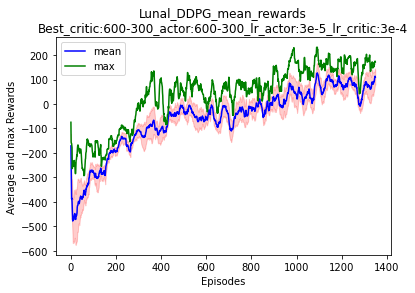

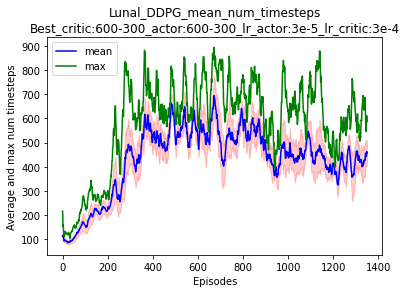

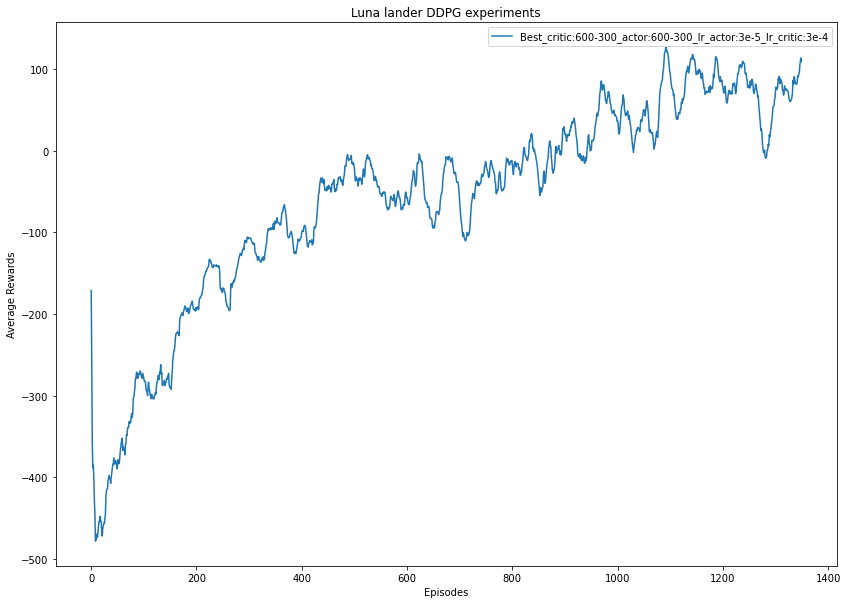

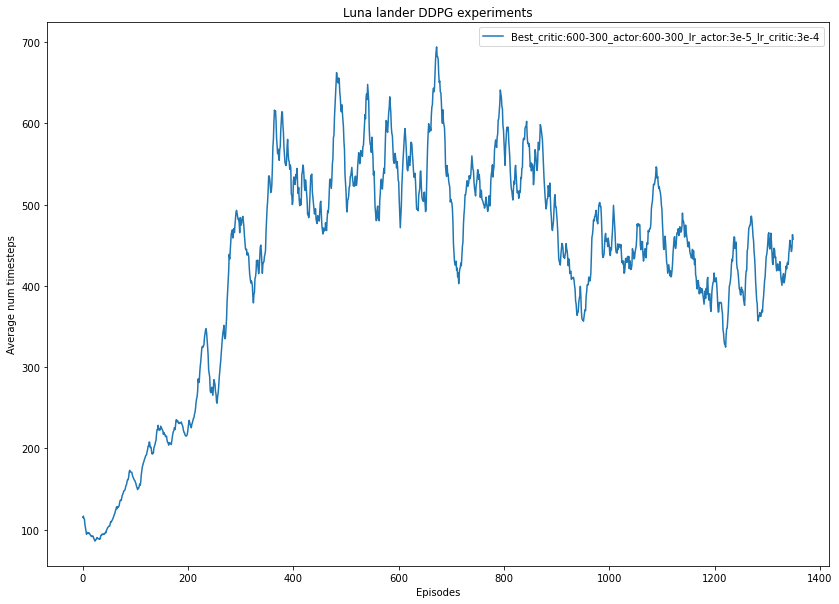

In [17]:
best_config_results=luna_lander.experiment_luna_lander(device, RUNS_DIR, SAVED_DIR, NUM_EPISODES, BEST_CONFIG_LUNA_LANDER, NUM_EXPERIMENTS, num_episodes_avg=NUM_EPISODES_AVG, train=True)

In [18]:
save_to_pickle(best_config_results, os.path.join(SAVED_DIR, 'best_config_results_dict.pkl'))

We will plot the results more clearly

In [20]:
from luna_lander import plot_all_experiments,plot_episodes,save_to_pickle, load_from_pickle



#Saved results from previous run
best_results_ddpg_luna_lander=load_from_pickle(os.path.join(SAVED_DIR, 'best_results_dict.pkl'))



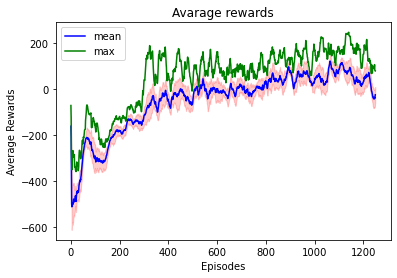

In [21]:
plot_episodes(best_results_ddpg_luna_lander['rewards_mean'][0],best_results_ddpg_luna_lander['rewards_std'][0], best_results_ddpg_luna_lander['rewards_max'][0], 'Average Rewards', 'Avarage rewards', SAVED_DIR, 'best_ddpg_rewards_results')

### run more episodes and render on the best model-loaded from checkpoint

In [ ]:
NUM_EPISODES=20

#configuration according to ddpg paper
CONFIGS_LUNA_LANDER=[{'run_name':"Best_critic:400-300_actor:400-300_lr_actor:5e-5_lr_critic:5e-4", 'batch_size':64, "critic_linear_sizes":[400,300], "actor_linear_sizes":[400,300],  "config_optim_actor":{'lr':0.00005},\
                        "config_optim_critic":{"lr":0.0005}, "memory_capacity":1000000, "tau": 0.001, "gamma": 0.99, 
                      "checkpoint": 
                      {"critic":'ddpg_lunal_CRITICBest_critic:400-300_actor:400-300_lr_actor:5e-5_lr_critic:5e-4expr:_4_Final04022021 0442.pth', 
                       "actor":'ddpg_lunal_ACTORBest_critic:400-300_actor:400-300_lr_actor:5e-5_lr_critic:5e-4expr:_4_Final04022021 0442.pth'}}]


NUM_EXPERIMENTS=1
BATCH_SIZE=64
NUM_EPISODES_AVG=20

In [ ]:

eval_results=luna_lander.experiment_luna_lander(device, RUNS_DIR, SAVED_DIR, NUM_EPISODES, CONFIGS_LUNA_LANDER, NUM_EXPERIMENTS, num_episodes_avg=NUM_EPISODES_AVG, train=True, save_freq=None, render=True)